In [2]:
# Default imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Pre processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from scipy.stats import shapiro, boxcox
from scipy.special import inv_boxcox
from scipy.stats import shapiro, boxcox

# Sampling
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline, make_pipeline as imb_make_pipeline

# Model evaluation
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, RocCurveDisplay
from sklearn.metrics.cluster import contingency_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict
from hyperopt import hp, fmin, tpe, space_eval
from sklearn.decomposition import PCA
import shap


# Models
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, MeanShift, OPTICS, Birch, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

# PyTorch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
import torch
import torch.nn.functional as F
from hyperopt import Trials

import warnings
warnings.filterwarnings('ignore')

import joblib
import os
import xgboost as xgboost
import lightgbm as lgboost
import catboost as catboost

c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Methodology

Now that we have preprocessed our dataset and extracted interesting features,  we are going to test several algorithms. We will proceed from the algorithm which we expect to have the worse results - for the sake of testing - to the algorithm which we expect to be the most effective.

# Preparation

## Preprocessing

### Load the data and variables

In [4]:
path = 'data/'
data = pd.read_csv(path + "processed_data.csv",header=0,index_col='ID')
print(data.shape)
data.head(10)

(249, 138)


bug_type         species  nb_pixels_ratio  image_symmetry_index   
ID                                                                   
1       Bee  Apis mellifera         0.007199             65.842518  \
2       Bee  Apis mellifera         0.008306             68.896841   
3       Bee  Apis mellifera         0.021768             69.742772   
4       Bee  Apis mellifera         0.012867             54.315953   
5       Bee  Apis mellifera         0.008957             75.907980   
6       Bee  Apis mellifera         0.005773             63.085727   
7       Bee  Apis mellifera         0.005499             49.956948   
8       Bee  Apis mellifera         0.007270             63.134435   
9       Bee  Apis mellifera         0.007018             17.359507   
10      Bee  Apis mellifera         0.015550             17.545814   

    mask_bb_symmetry_index  roundness  mean_centroid_distance   
ID                                                              
1                70.059270   0.046706              245.172338  \
2                40.143673   0.048440              279.998031   
3                45.869792   0.046958              432.496928   
4                35.557123   0.043529              328.675429   
5                62.907427   0.037005              267.675617   
6                43.130128   0.044037              211.581232   
7                56.415653   0.074186              230.782950   
8                49.307215   0.064155              273.800951   
9                51.374885   0.057295              219.473831   
10               51.263134   0.063378              330.818602   

    std_centroid_distance  max_centroid_distance  min_centroid_distance  ...   
ID                                                                       ...   
1               55.348483             362.548639             127.671981  ...  \
2               85.163883             478.802953             108.009513  ...   
3              109.688767             676.046287             177.987830  ...   
4               95.409134             557.031816             103.175281  ...   
5               94.401531             505.953034              86.412379  ...   
6               70.099682             376.800370              74.124330  ...   
7               72.090803             376.501782             110.907480  ...   
8               94.931425             447.646287              88.222821  ...   
9               87.781720             390.454913              30.519559  ...   
10             108.590272             521.005477              76.041498  ...   

    fourier_descriptor_imag_5  fourier_descriptor_real_6   
ID                                                         
1                    0.008064                  -0.001693  \
2                   -0.005841                  -0.003950   
3                   -0.006018                  -0.004180   
4                    0.005554                  -0.005088   
5                   -0.003086                  -0.011826   
6                   -0.002963                  -0.002410   
7                   -0.000434                  -0.005076   
8                   -0.001321                  -0.005797   
9                   -0.003716                  -0.003961   
10                   0.000680                  -0.001627   

    fourier_descriptor_imag_6  fourier_descriptor_real_7   
ID                                                         
1                    0.002286                  -0.003509  \
2                    0.001051                   0.000611   
3                    0.005942                  -0.007836   
4                   -0.001124                  -0.004936   
5                   -0.000144                  -0.005107   
6                    0.002479                  -0.005576   
7                    0.000524                  -0.003880   
8                    0.010358                  -0.004560   
9                   -0.005846                  -0.007110   
10                   0.002569          

In [5]:
RANDOM_STATE = 10

## Prepare variables used for training

In [6]:
data.bug_type.value_counts()

bug_type
Bee          115
Bumblebee    100
Butterfly     15
Hover fly      9
Wasp           9
Dragonfly      1
Name: count, dtype: int64

In [7]:
# extract the row with dragonfly because only 1 sample is not enough to train the model
dragonfly_data = data[data['bug_type'] == 'Dragonfly']
data = data[data['bug_type'] != 'Dragonfly']

In [8]:
for col in data.columns:
    col_sum = data[col].sum()
    if col_sum == 0:
        print('Dropped column because completely null:', col)
        data.drop(col, axis=1, inplace=True)

Dropped column because completely null: hue_mask_min
Dropped column because completely null: hue_rest_min


In [9]:
X = data.drop(columns=['bug_type','species'])
scaled_X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
proj_X = pca.fit_transform(scaled_X)
y = data['bug_type']
labelencoder = LabelEncoder()
y_encoded = labelencoder.fit_transform(y)
classes = np.unique(y)
n_classes = len(classes)

In [10]:
# K Fold for training
cv = StratifiedKFold(n_splits=4, random_state=2, shuffle=True)

def check_splits(X, y, cv, min_samples_per_class_in_train=3, min_samples_per_class_in_test=2):
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Ensure we have at least 2 instances of each class in each set
        for class_name in np.unique(y):
            if class_name == 'Dragonfly':
                continue
            if len(y_train[y_train == class_name]) < min_samples_per_class_in_train:
                print(f"Train set has less than {min_samples_per_class_in_train} instances of class", class_name)
            if len(y_test[y_test == class_name]) < min_samples_per_class_in_test:
                print(f"Test set has less than {min_samples_per_class_in_test} instances of class", class_name)
check_splits(X, y, cv)

## Utility functions for model evaluation and visualisation

In [11]:
### MODEL PERFORMANCE VISUALIZATION TOOLKIT ###
def plot_predictions(predicted_class, actual_class):
    global proj_X
    fig, ax = plt.subplots(figsize=(6, 6))
    predicted_class = "predicted_" + predicted_class
    actual_class = "actual_" + actual_class
    print(type(proj_X),  type(predicted_class), type(actual_class))
    sns.scatterplot(x=proj_X[:, 0], y=proj_X[:, 1], hue=predicted_class, style=actual_class, ax=ax)

    # Add labels and legend
    plt.xlabel('PC1 (explained variance: {0})'.format(pca.explained_variance_ratio_[0]))
    plt.ylabel('PC2 (explained variance: {0})'.format(pca.explained_variance_ratio_[1]))
    plt.title('Predicted vs Actual Class')
    plt.legend()

    # Show the plot
    plt.show()

from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_multiclass_roc(y, y_proba, classes, n_classes):
    # Binarize the output
    y_bin = label_binarize(y, classes=classes)
    n_classes = y_bin.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(classes[i], roc_auc[i]))

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC')
    plt.legend(loc="lower right")
    plt.show()

from sklearn.metrics import average_precision_score
def plot_multiclass_precision_recall(y, y_proba, classes, n_classes):
    # Binarize the output
    y_bin = label_binarize(y, classes=classes)
    n_classes = y_bin.shape[1]

    # Create a color cycle to differentiate classes
    colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue'])

    # Set up plot
    plt.figure(figsize=(10, 8))
    lines = []
    labels = []

    # Compute Precision-Recall and plot curve for each class
    for i, color in zip(range(n_classes), colors):
        precision, recall, _ = precision_recall_curve(y_bin[:, i], y_proba[:, i])
        average_precision = average_precision_score(y_bin[:, i], y_proba[:, i])
        l, = plt.plot(recall, precision, color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.2f})'.format(classes[i], average_precision))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Multi-class Precision-Recall curve')
    plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14), fontsize=10)
    # adjust legend label size
    
    plt.show()

from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def plot_shap_values(model, X, n_features=10):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X, plot_type="bar", max_display=X.shape[1]-2)


In [12]:
### FINAL MODEL EVLUATION FUNCTION ###
def evaluate_predictions(model,y,y_pred, plot, y_proba=None):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    classes = model.classes_ if hasattr(model, 'classes_') else np.unique(y)
    print(classification_report(y, y_pred, target_names=classes))

    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    if plot :
        if (y_proba is not None):
            plot_multiclass_roc(y, y_proba, classes, n_classes)
            plot_multiclass_precision_recall(y, y_proba, classes, n_classes)
            plot_learning_curve(model, "Learning Curve", X, y, cv=cv, n_jobs=-1)
        actual_model = model.named_steps['model']
        if hasattr(actual_model, 'feature_importances_'):
            plot_shap_values(actual_model, X, n_features=10)
    plt.show()
    return accuracy

search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),  # Regularization strength
    'penalty': hp.choice('penalty', [ 'l2']),
    'solver': hp.choice('solver', ['lbfgs', 'liblinear'])
}
log = imbPipeline([ 
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space,{}, max_evals=150, scoring='accuracy')
#{'C': 0.02544670436123156, 'penalty': 'l2', 'solver': 'liblinear'}

rf = RandomForestClassifier(random_state=RANDOM_STATE)
pipe = imbPipeline({
    ('scaler', StandardScaler()),
    ('model', rf)
})
evaluate_classifier(pipe, X, y)

In [13]:
### CLASSIFICATION TOOLKIT ###

def evaluate_classifier(pipeline, X, y, plot=False, debug=False, n_jobs=-1, return_score=False, cv=cv):
    # Perform cross-validated prediction
    is_pytorch = pipeline.named_steps['model'].__class__.__name__ == 'PyTorchClassifier'
    if is_pytorch and len(pipeline.named_steps) == 1:
        X2 = X.values
    else:
        X2 = X
    y_pred_cv = cross_val_predict(pipeline, X2, y_encoded, cv=cv, n_jobs=n_jobs)

    # Decode the predictions
    y_pred_cv_decoded = labelencoder.inverse_transform(y_pred_cv)

    if plot and (hasattr(pipeline.named_steps['model'], 'predict_proba')):
        y_proba_cv = cross_val_predict(pipeline, X2, y_encoded, cv=cv, n_jobs=n_jobs, method='predict_proba')
    else:
        y_proba_cv = None
    if debug:
        print("Actual target values:", y)
        print("Predicted target values:", y_pred_cv_decoded)
        if y_proba_cv is not None:
            print("Predicted probabilities:", y_proba_cv)
    if return_score:
        return evaluate_predictions(pipeline, y, y_pred_cv_decoded, plot, y_proba=y_proba_cv)
    evaluate_predictions(pipeline, y, y_pred_cv_decoded, plot, y_proba=y_proba_cv)

def search_parameters(obj_func, search_space, max_evals=100):
    best = fmin(obj_func, search_space, algo=tpe.suggest, max_evals=max_evals)
    space_evaluation = space_eval(search_space, best)
    print("Best hyperparameters:", space_evaluation)
    return space_evaluation

def adapt_sampling_strategy(pipeline, params, define_sampling_strategy_for):
    sampling_strat = {}
    params_to_drop = []
    for param, value in params.items():
        model_strategy_param_str = define_sampling_strategy_for + '__strategy'
        model_strategy_param_str_len = len(model_strategy_param_str)
        if param[:model_strategy_param_str_len] == model_strategy_param_str:
            sampling_strat[int(param[model_strategy_param_str_len+2:])] = value
            params_to_drop.append(param)
    #print(params_to_drop)
    for param in params_to_drop:
        params.pop(param)
    pipeline.named_steps[define_sampling_strategy_for].sampling_strategy = sampling_strat
    #print(pipeline.named_steps[define_sampling_strategy_for].sampling_strategy)
    return params

def get_layers_sizes(input_size, num_layers, compression_ratio, min_layer_size):
    sizes = [input_size]  # Start with the input size
    for i in range(num_layers - 1):
        next_size = int(sizes[-1] * compression_ratio)
        next_size = max(next_size, min_layer_size)  # Ensure the size doesn't drop below minimum
        sizes.append(next_size)
    print(sizes)
    return sizes[1:] 

def sample_layers_sizes(num_layers, units_per_layer):
    return [units_per_layer[i] for i in range(num_layers)]

def adapt_pytorch_layers_sizes(X,params):
    input_size = X.shape[1]
    num_layers = params.pop('num_layers', None)
    if 'model__units_per_layer' in params:
        units_per_layer = params.pop('units_per_layer', None)
        if num_layers is not None and units_per_layer is not None:
            params['model__layers_sizes'] = sample_layers_sizes(num_layers, units_per_layer)
    elif 'model__compression_ratio' in params:
        compression_ratio = params.pop('compression_ratio', None)
        min_layer_size = params.pop('min_layer_size', None)
        if num_layers is not None and compression_ratio is not None and min_layer_size is not None:
            params['model__layers_sizes'] = get_layers_sizes(input_size, num_layers, compression_ratio, min_layer_size)
    return params

def objective(pipeline, params, X, y, cv, scoring, random_state, define_sampling_strategy_for, is_pytorch=False, n_jobs=-1):
    # The params dictionary contains keys like 'model__max_depth' and 'smote__strategy'
    if is_pytorch:
        params = adapt_pytorch_layers_sizes(X, params)
    # Define the sampling strategy for SMOTE
    if define_sampling_strategy_for is not None:
        adapt_sampling_strategy(pipeline, params, define_sampling_strategy_for)

    # Set the parameters of the pipeline
    if hasattr(pipeline.named_steps['model'], 'random_state'):
        pipeline.named_steps['model'].random_state = random_state
    pipeline.set_params(**params)
    
    # Calculate score over the predefined folds
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    # Return the negative mean accuracy because the function is minimized
    return -scores.mean()

def optimize_classifier(X, pipeline, model_params_space, pipeline_params_space, max_evals=100, scoring='accuracy', random_state=RANDOM_STATE, n_jobs=-1):
    #print(y_encoded)
    # Merge the model parameters space with the pipeline parameters space
    search_space = {**{'model__' + k: v for k, v in model_params_space.items()}, **pipeline_params_space}
    print("Search space:", search_space)
    define_sampling_strategy_for = None
    for key in search_space.keys():
        for over_sampling_model in ['smote', 'adasyn', 'random']:
            model_str = over_sampling_model
            model_str_len = len(model_str)
            if key[:model_str_len] == over_sampling_model:
                define_sampling_strategy_for = over_sampling_model
                break
    is_pytorch = pipeline.named_steps['model'].__class__.__name__ == 'PyTorchClassifier'
    if is_pytorch and (len(pipeline.named_steps) == 1):
        X2 = X.values
    else:
        X2 = X
    obj_func = lambda params: objective(pipeline, params, X2, y_encoded, cv, scoring, random_state, define_sampling_strategy_for, is_pytorch=is_pytorch, n_jobs=n_jobs)
    best_params = search_parameters(obj_func, search_space, max_evals)
    if define_sampling_strategy_for is not None:
        best_params = adapt_sampling_strategy(pipeline, best_params, define_sampling_strategy_for)
    if is_pytorch:
        best_params = adapt_pytorch_layers_sizes(X, best_params)
    pipeline.set_params(**best_params)
    return best_params

In [14]:
### CLUSTERING TOOLKIT ###

from sklearn.preprocessing import LabelEncoder
def majority_vote(clusters, labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    y_pred = np.zeros_like(clusters)
    unique_clusters = np.unique(clusters)
    #print(np.unique(unique_clusters), np.unique(labels))
    for cluster in unique_clusters:
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_labels = labels[cluster_indices]
        majority_label = np.argmax(np.bincount(cluster_labels))
        y_pred[cluster_indices] = majority_label
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    return y_pred_decoded


def evaluate_clustering(model,X,labels, plot=False):
    # Fit the model and predict cluster labels
    model.fit(X)
    cluster_labels = model.labels_

    # Evaluate clustering performance
    silhouette_index = silhouette_score(X, cluster_labels,metric='euclidean')
    print("Silhouette score : ", silhouette_index)

    # Perform majority voting using encoded labels then decode
    y_pred = majority_vote(cluster_labels, labels)

    # Evaluate predictions as if it were a classification task
    evaluate_predictions(model, labels, y_pred, plot)

    if plot:
        # Create a scatter plot of the projected data with color-coded clusters
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=cluster_labels,style=labels, palette='viridis')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('{0} clustering results '.format(model.__name__))
        plt.show()

from sklearn.metrics import get_scorer
def cluster_objective(model, params, X, y, cv, scoring, random_state):
    model.set_params(**params)
    model.fit(X)
    cluster_labels = model.labels_
    y_pred = majority_vote(cluster_labels, y)
    #scorer = get_scorer(scoring)
    #score = scorer._score_func(y, y_pred)
    score = accuracy_score(y,y_pred)
    print(score)
    return -score
    
def optimize_clustering(model, search_space, max_evals=100, scoring='accuracy', random_state=RANDOM_STATE):
    if hasattr(model, 'random_state'):
        model.random_state = random_state 
    if hasattr(model, 'n_clusters'):
        model.n_clusters = n_classes
    print(model.random_state)
    obj_func = lambda params: cluster_objective(model, params, X, y, cv, scoring, random_state)
    best_params = search_parameters(obj_func, search_space, max_evals)
    if hasattr(model, 'random_state'):
        best_params['random_state'] = random_state
    if hasattr(model, 'n_clusters'):
        best_params['n_clusters'] = n_classes
    model.set_params(**best_params)
    print(model.random_state)
    return best_params

## Dimensionality Reduction Transformer

Accuracy: 0.8346774193548387
Precision: 0.8426986554330891
Recall: 0.8346774193548387
F1 Score: 0.8219630580947345
              precision    recall  f1-score   support

         Bee       0.81      0.91      0.86       115
   Bumblebee       0.87      0.87      0.87       100
   Butterfly       0.69      0.60      0.64        15
   Hover fly       1.00      0.11      0.20         9
        Wasp       1.00      0.56      0.71         9

    accuracy                           0.83       248
   macro avg       0.88      0.61      0.66       248
weighted avg       0.84      0.83      0.82       248



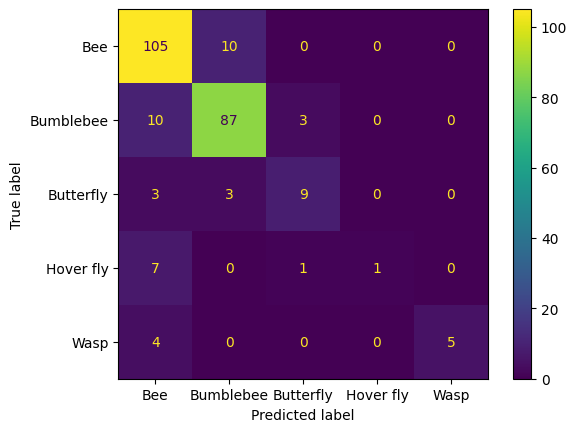

In [15]:
# Test without dimensionality reductor
classifier = LGBMClassifier(n_estimators=1000, learning_rate=0.05, num_leaves=32, verbose=-1, random_state=RANDOM_STATE)

classifier.fit(X, y)
pipeline1= Pipeline([
    ('model', classifier)
])
evaluate_classifier(pipeline1, X, y)

In [16]:
importances = classifier.feature_importances_

In [17]:
def create_dim_reductor(percent_treshold=65, n_components=0.8):
    # Identify less important features (e.g., bottom 25%)
    threshold = np.percentile(importances, percent_treshold)
    less_important_features = X.columns[importances < threshold]
    less_important_features_indices = [X.columns.get_loc(feature) for feature in less_important_features]
    # Apply PCA on less important features
    pca = PCA(n_components=n_components)
    return ColumnTransformer([('pca', pca, less_important_features_indices)], remainder='passthrough')
dim_reductor = create_dim_reductor()

Accuracy: 0.8709677419354839
Precision: 0.879460543628852
Recall: 0.8709677419354839
F1 Score: 0.8576916857965098
              precision    recall  f1-score   support

         Bee       0.83      0.95      0.89       115
   Bumblebee       0.92      0.91      0.91       100
   Butterfly       0.83      0.67      0.74        15
   Hover fly       1.00      0.11      0.20         9
        Wasp       1.00      0.56      0.71         9

    accuracy                           0.87       248
   macro avg       0.92      0.64      0.69       248
weighted avg       0.88      0.87      0.86       248



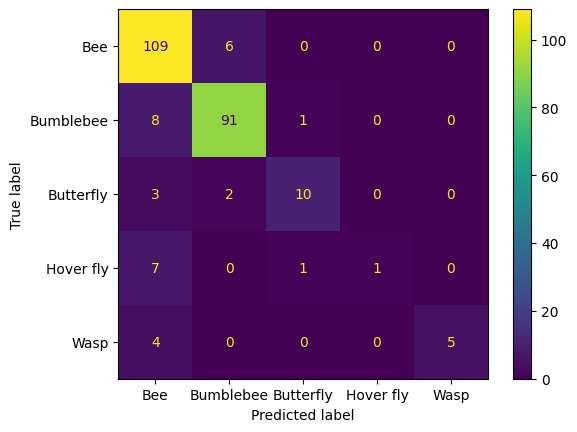

In [18]:
# Test with dimensionality reductor
pipeline2 = Pipeline([
    ('dim_reductor', dim_reductor),
    ('model', classifier)
])
evaluate_classifier(pipeline2, X, y)

## Data Augmentation Transformers

In [19]:
import math
# Creating SMOTE and sampling strategy search space
smote = SMOTE(random_state=RANDOM_STATE, n_jobs=-1)
def create_sampling_strategy(factor_range=(1.4, 3.0), model='smote'):
    """
    Create a dynamic sampling strategy search space based on class counts and a factor range.
    :param class_counts: A pandas Series with index as class labels and values as counts.
    :param factor_range: A tuple specifying the min and max factors to multiply with class counts.
    :param step: Step size for the hp.quniform function.
    :return: A dictionary suitable for hyperopt's search space.
    """
    strategy = {}
    if True:
        unique, counts = np.unique(y_encoded, return_counts=True)
        class_counts = dict(zip(unique, counts))
    else:
        class_counts = y.value_counts()
    for class_label, count in class_counts.items():
        if (count < 50) and (count != 1):
            min_samples = math.ceil(count * factor_range[0])
            max_samples = math.ceil(count * factor_range[1])
            # Ensure there is a range to search
            if min_samples != max_samples:
                strategy[f'{model}__strategy__{class_label}'] = hp.uniformint(
                    f'sampling_{class_label}', min_samples, max_samples)
    if model == 'smote':
        strategy[f'{model}__k_neighbors'] = hp.choice('k_neighbors', [3, 4, 5, 6])
    elif model == 'adasyn':
        strategy[f'{model}__n_neighbors'] = hp.choice('n_neighbors', [3, 4, 5, 6])
    return strategy
smote_sampling_strategy_space = create_sampling_strategy(model='smote')

In [20]:
# Creating ADASYN 
adasyn_sampling_strategy_space = create_sampling_strategy(model='adasyn')
adasyn = ADASYN(random_state=RANDOM_STATE, n_jobs=-1)

## Column Transformers for Gaussian Distribution

In [21]:


def best_transformation(X):
    """
    Applies the best transformation for each feature in the dataset to make it more Gaussian.
    """
    X_transformed = pd.DataFrame()
    lambdas = {}
    
    # Ensure all data is positive for certain transformations by shifting the dataset
    data_shift = np.min(X.values, axis=0)  # Find the minimum value in each column
    data_shift[data_shift > 0] = 0  # Only shift columns that have values less than or equal to zero
    shifted_X = X - data_shift + 1  # Shift data to be strictly positive

    for column in X.columns:
        original_data = X[column].values
        shifted_data = shifted_X[column].values

        transformations = {
            'original': original_data,
            'log': np.log(shifted_data),  # Safe log
            'sqrt': np.sqrt(shifted_data),  # Safe sqrt
            'square': np.square(original_data / np.max(np.abs(original_data))),  # Normalize before square
            'inverse': 1 / (shifted_data + np.finfo(float).eps)  # Safe inverse
        }

        # Attempt Box-Cox if all values are positive
        if np.all(original_data > 0) and False:
            try:
                transformed_data, lambda_ = boxcox(original_data)
                transformations['boxcox'] = transformed_data
                lambdas[column] = lambda_
            except Exception as e:
                print(f"Box-Cox transformation failed for {column}: {e}")

        best_score = float('-inf')
        best_trans_name = 'original'
        best_data = original_data
        
        for name, data in transformations.items():
            if np.any(np.isnan(data)) or np.any(np.isinf(data)) or np.any(np.isneginf(data)):
                print(f"Skipping transformation {name} for {column} due to invalid data.")
                continue
            
            stat, p_value = shapiro(data)
            if p_value > best_score:
                best_score = p_value
                best_trans_name = name
                best_data = data
        
        X_transformed[column] = best_data
        print(f"Selected {best_trans_name} transformation for {column} with p-value {best_score}")

    return X_transformed, lambdas

transformed_X, lambdas = best_transformation(X)
transformed_X.head()

Selected inverse transformation for nb_pixels_ratio with p-value 2.710345649646219e-20
Selected log transformation for image_symmetry_index with p-value 0.3348601758480072
Selected sqrt transformation for mask_bb_symmetry_index with p-value 0.46427270770072937
Selected inverse transformation for roundness with p-value 3.164262851740318e-09
Selected log transformation for mean_centroid_distance with p-value 0.01721286028623581
Selected log transformation for std_centroid_distance with p-value 7.200774416560307e-05
Selected log transformation for max_centroid_distance with p-value 0.0027985195629298687
Selected sqrt transformation for min_centroid_distance with p-value 0.11044468730688095
Selected original transformation for skewness_centroid_distance with p-value 0.6808554530143738
Selected log transformation for kurtosis_centroid_distance with p-value 0.1637461632490158
Selected square transformation for aspect_ratio with p-value 2.006772774620913e-05
Selected log transformation for ma

nb_pixels_ratio  image_symmetry_index  mask_bb_symmetry_index  roundness   
0         0.992853              4.202339                8.429666   0.955378  \
1         0.991763              4.247020                6.414333   0.953798   
2         0.978696              4.259050                6.846152   0.955148   
3         0.987296              4.013061                6.046249   0.958287   
4         0.991123              4.342610                7.994212   0.964316   

   mean_centroid_distance  std_centroid_distance  max_centroid_distance   
0                5.506032               4.031555               5.895913  \
1                5.638348               4.456251               6.173376   
2                6.071885               4.706722               6.517740   
3                5.798109               4.568601               6.324416   
4                5.593505               4.558095               6.228418   

   min_centroid_distance  skewness_centroid_distance   
0              11.343367                   -0.057930  \
1              10.440762                   -0.063210   
2              13.378633                   -0.096620   
3              10.206629                   -0.216183   
4               9.349459                    0.306476   

   kurtosis_centroid_distance  ...  fourier_descriptor_imag_5   
0                    0.413693  ...                   0.976584  \
1                    0.538622  ...                   0.990027   
2                    0.571153  ...                   0.990201   
3                    0.680949  ...                   0.978983   
4                    0.581228  ...                   0.987335   

   fourier_descriptor_real_6  fourier_descriptor_imag_6   
0                  -0.001693                   0.983123  \
1                  -0.003950                   0.984319   
2                  -0.004180                   0.979603   
3                  -0.005088                   0.986430   
4                  -0.011826                   0.985478   

   fourier_descriptor_real_7  fourier_descriptor_imag_7   
0                  -0.003509                   0.983573  \
1                   0.000611                   0.995500   
2                  -0.007836                   0.985283   
3                  -0.004936                   0.989428   
4                  -0.005107                   0.992562   

   fourier_descriptor_real_8  fourier_descriptor_imag_8   
0                  -0.000954                   0.001356  \
1                  -0.002777                  -0.003921   
2                  -0.008795                   0.002132   
3                  -0.000717                  -0.003153   
4                  -0.002891                  -0.001483   

   fourier_descriptor_real_9  fourier_descriptor_imag_9   
0                  -0.002313                   0.986262  \
1                   0.002142                   0.988364   
2                  -0.009261                   0.989779   
3                  -0.006001                   0.984719   
4                  -0.000449                   0.990091   

   orthogonal_lines_ratio  
0                1.295874  
1                1.317443  
2                1.394942  
3                1.268420  
4                1.281178  

[5 rows x 134 columns]

for col in ['red_rest_max', 'red_mask_max', 'green_rest_max']:
    print(X[col].describe())

In [22]:
def validate_float32(X_transformed):
    """
    Check if each column in the DataFrame can be safely converted to float32.

    Args:
    - X_transformed (DataFrame): The DataFrame containing transformed data.

    Returns:
    - dict: Information about each column's ability to be represented as float32.
    """
    validation_results = {}
    for column in X_transformed.columns:
        col_data = X_transformed[column]
        col_min = col_data.min()
        col_max = col_data.max()
        
        # Check for NaN and infinity values
        has_nan = np.isnan(col_data).any()
        has_inf = np.isinf(col_data).any()
        
        # Check if the range of data is within the float32 precision
        can_represent = np.all(np.isfinite(np.float32(col_data)))
        
        # Report the results
        validation_results[column] = {
            'min': col_min,
            'max': col_max,
            'has_nan': has_nan,
            'has_inf': has_inf,
            'can_represent_float32': can_represent
        }
        
        # Print summary for each column
        print(f"Column: {column}")
        print(f"  Min value: {col_min}")
        print(f"  Max value: {col_max}")
        print(f"  Contains NaN: {has_nan}")
        print(f"  Contains Inf: {has_inf}")
        print(f"  Can represent as float32: {can_represent}\n")

    return validation_results

# Assuming 'X_transformed' is your DataFrame with the transformed data
validation_results = validate_float32(transformed_X)
validation_results

Column: nb_pixels_ratio
  Min value: 0.8421351663434504
  Max value: 0.996395539137171
  Contains NaN: False
  Contains Inf: False
  Can represent as float32: True

Column: image_symmetry_index
  Min value: 2.9101475517291173
  Max value: 4.453874291597173
  Contains NaN: False
  Contains Inf: False
  Can represent as float32: True

Column: mask_bb_symmetry_index
  Min value: 4.370823394488411
  Max value: 9.366276844751392
  Contains NaN: False
  Contains Inf: False
  Can represent as float32: True

Column: roundness
  Min value: 0.8133484627602928
  Max value: 0.9776062506518429
  Contains NaN: False
  Contains Inf: False
  Can represent as float32: True

Column: mean_centroid_distance
  Min value: 5.026305020970772
  Max value: 7.1386344614455055
  Contains NaN: False
  Contains Inf: False
  Can represent as float32: True

Column: std_centroid_distance
  Min value: 3.3465247950598886
  Max value: 5.958624972845062
  Contains NaN: False
  Contains Inf: False
  Can represent as float3

{'nb_pixels_ratio': {'min': 0.8421351663434504,
  'max': 0.996395539137171,
  'has_nan': False,
  'has_inf': False,
  'can_represent_float32': True},
 'image_symmetry_index': {'min': 2.9101475517291173,
  'max': 4.453874291597173,
  'has_nan': False,
  'has_inf': False,
  'can_represent_float32': True},
 'mask_bb_symmetry_index': {'min': 4.370823394488411,
  'max': 9.366276844751392,
  'has_nan': False,
  'has_inf': False,
  'can_represent_float32': True},
 'roundness': {'min': 0.8133484627602928,
  'max': 0.9776062506518429,
  'has_nan': False,
  'has_inf': False,
  'can_represent_float32': True},
 'mean_centroid_distance': {'min': 5.026305020970772,
  'max': 7.1386344614455055,
  'has_nan': False,
  'has_inf': False,
  'can_represent_float32': True},
 'std_centroid_distance': {'min': 3.3465247950598886,
  'max': 5.958624972845062,
  'has_nan': False,
  'has_inf': False,
  'can_represent_float32': True},
 'max_centroid_distance': {'min': 5.563941304001049,
  'max': 7.613333422260237,


In [1]:
# [IMPORTANT] Must execute all above cells before testing algorithms below

# Application of machine learning or deep learning algorithms

**Exemple d'utilisation des fonctions pour un algorithme**

In [35]:
search_space = {
    'n_estimators': hp.choice('n_estimators', [10,50, 100, 150, 200, 250]),
    'max_depth': hp.choice('max_depth', range(1, 21)),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 11)),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
}
rf = imbPipeline([
    ('model', RandomForestClassifier(random_state=RANDOM_STATE))
])
best_params = optimize_classifier(X, rf, search_space, {}, max_evals=100, scoring='accuracy')

Search space: {'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x0000023B0FFC18D0>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x0000023B0FFC3B10>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x0000023B0FFC0710>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x0000023B0FFB87D0>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x0000023B0FFBB690>}
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [01:34<00:00,  1.06trial/s, best loss: -0.782258064516129]
Best hyperparameters: {'model__max_depth': 16, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 0.10013640298778677, 'model__n_estimators': 100}


Accuracy: 0.7782258064516129
Precision: 0.7250851933311611
Recall: 0.7782258064516129
F1 Score: 0.745603979876328
              precision    recall  f1-score   support

         Bee       0.77      0.88      0.82       115
   Bumblebee       0.79      0.85      0.82       100
   Butterfly       0.88      0.47      0.61        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.00      0.00      0.00         9

    accuracy                           0.78       248
   macro avg       0.49      0.44      0.45       248
weighted avg       0.73      0.78      0.75       248



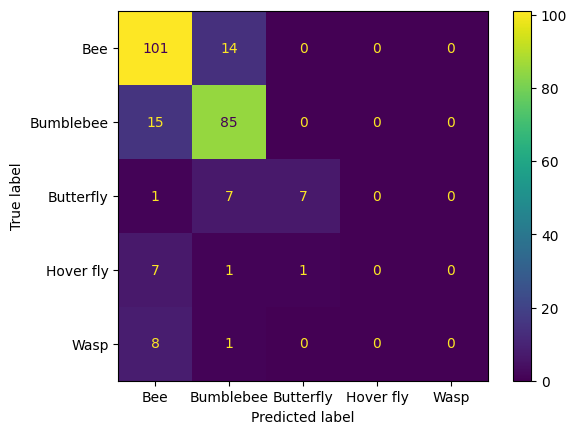

In [59]:
best_params = {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 0.10013640298778677, 'n_estimators': 100}
rf = imbPipeline([
    ('model', RandomForestClassifier(random_state=RANDOM_STATE, **best_params))
])
evaluate_classifier(rf, X, y)

### Feature Importance

In [64]:
rf = rf.named_steps['model']
rf.fit(X, y)

RandomForestClassifier(max_depth=16, min_samples_split=0.10013640298778677,
                       random_state=10)

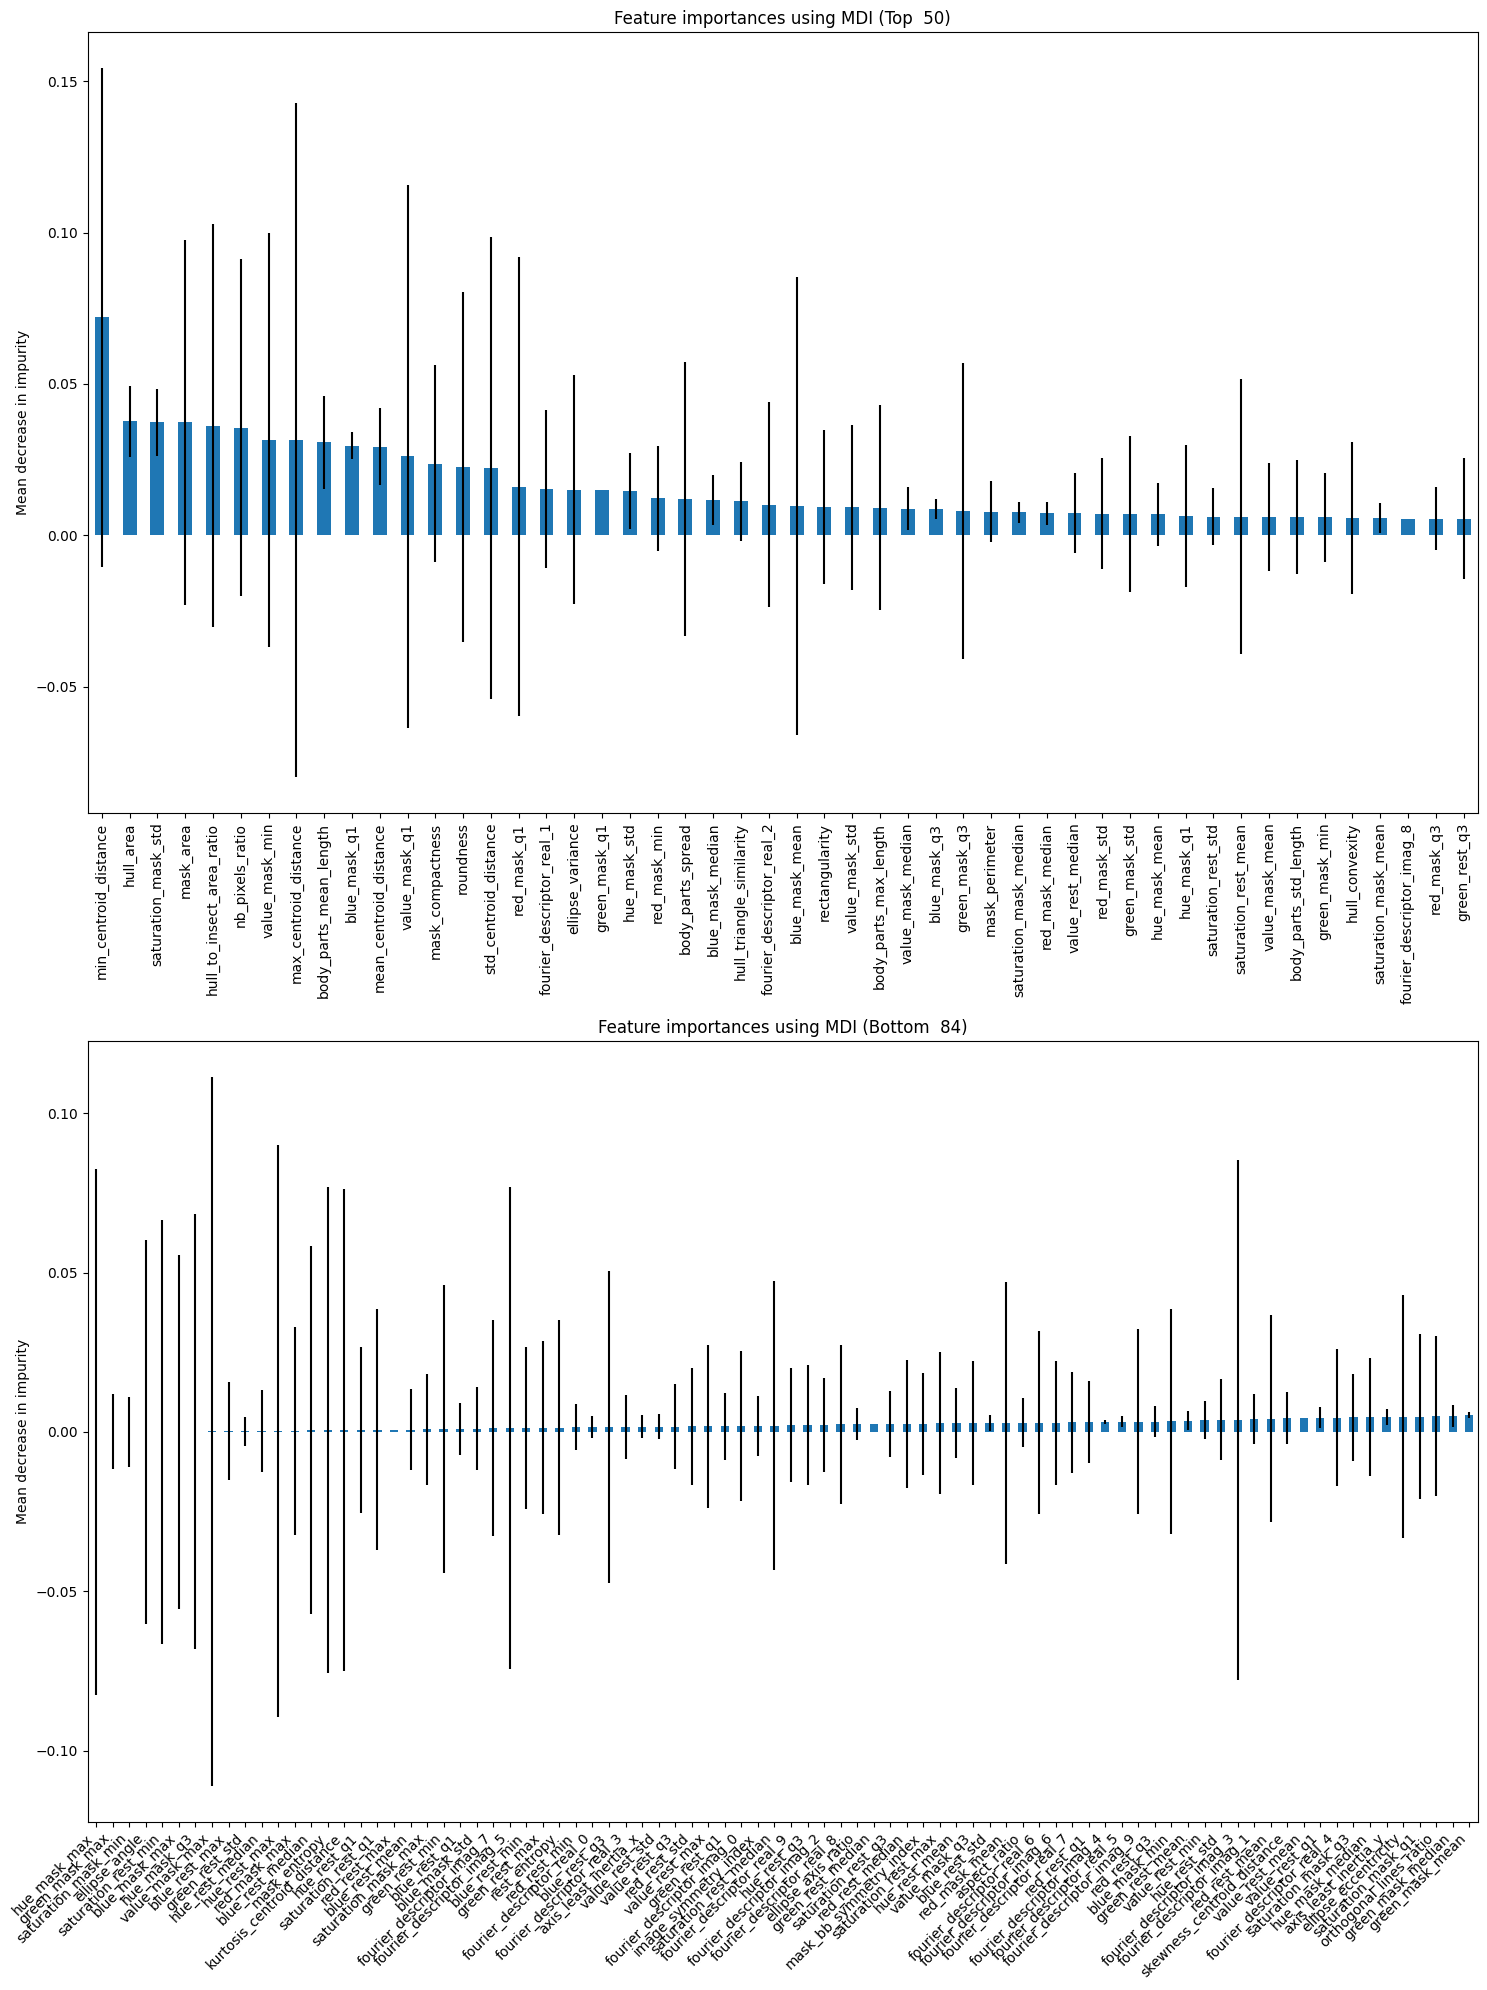

In [65]:
def make_graph(forest_importances,std,ax,n_features,asc=False):
    forest_importances2 = forest_importances.sort_values(ascending=asc)
    if n_features is not None:
        forest_importances2 = forest_importances2[:n_features]
        std2 = std[:n_features]

    forest_importances2.plot.bar(yerr=std2, ax=ax)
    way = "Bottom " if asc else "Top "
    ax.set_title("Feature importances using MDI ({0} {1})".format(way,n_features if n_features is not None else ""))
    ax.set_ylabel("Mean decrease in impurity")
    plt.xticks(rotation=45, ha='right')

def plot_feature_importances(n_features=50):
    total_n_features = len(X.columns)
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

    forest_importances = pd.Series(importances, index=X.columns)
    n = 1 if n_features is None else 2
    fig, axs = plt.subplots(figsize=(15,20),nrows=n,ncols=1)
    make_graph(forest_importances,std,axs[0],n_features,asc=False)
    if n == 2:
        make_graph(forest_importances,std,axs[1],total_n_features - n_features,asc=True)
    fig.tight_layout()
    plt.show()
plot_feature_importances(n_features=50)

## Clustering (unsupervised learning) methods

Here, because we have the ground truth (we know the labels), it may be better to use algorithms which have the number of clusters as the main parameter. Indeed, as parameterization is an important factor in performance, if we already know the optimal value for a parameter, it is a significant advantage. We will also try other algorithms but they will probably not work as well and will require more parameterization work.

### Algorithms with n_clusters as parameter

In [30]:
#forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = pd.Series(importances, index=X.columns)
forest_importances.sort_values(ascending=False, inplace=True)
k = 30
top_k_features = forest_importances.index[:k]
indices_of_top_k_features = [X.columns.get_loc(feature) for feature in top_k_features]
lim_X = scaled_X[:, indices_of_top_k_features]

Silhouette score :  0.1516903578589948
Accuracy: 0.7741935483870968
Precision: 0.7523089377928086
Recall: 0.7741935483870968
F1 Score: 0.7449414693574873
              precision    recall  f1-score   support

         Bee       0.69      0.97      0.80       115
   Bumblebee       0.95      0.70      0.80       100
   Butterfly       0.85      0.73      0.79        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.00      0.00      0.00         9

    accuracy                           0.77       248
   macro avg       0.50      0.48      0.48       248
weighted avg       0.75      0.77      0.74       248



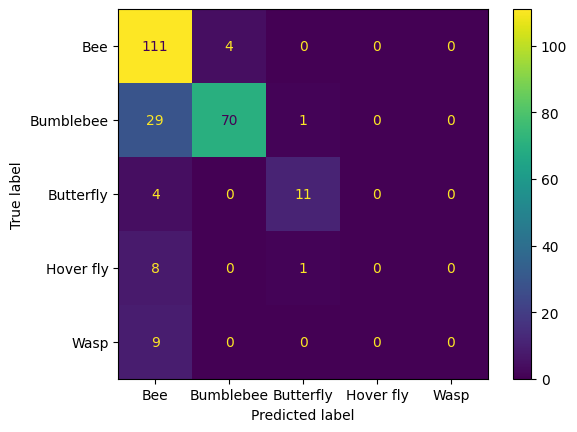

In [78]:
kmeans = KMeans(n_clusters=n_classes,random_state=12)
evaluate_clustering(kmeans, lim_X, y, plot=False)

Silhouette score :  0.1285823079067712
Accuracy: 0.7831325301204819
Precision: 0.7404185965490006
Recall: 0.7831325301204819
F1 Score: 0.7508022595237125
              precision    recall  f1-score   support

         Bee       0.72      0.96      0.82       115
   Bumblebee       0.89      0.76      0.82       100
   Butterfly       0.82      0.60      0.69        15
   Dragonfly       0.00      0.00      0.00         1
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.00      0.00      0.00         9

    accuracy                           0.78       249
   macro avg       0.41      0.39      0.39       249
weighted avg       0.74      0.78      0.75       249



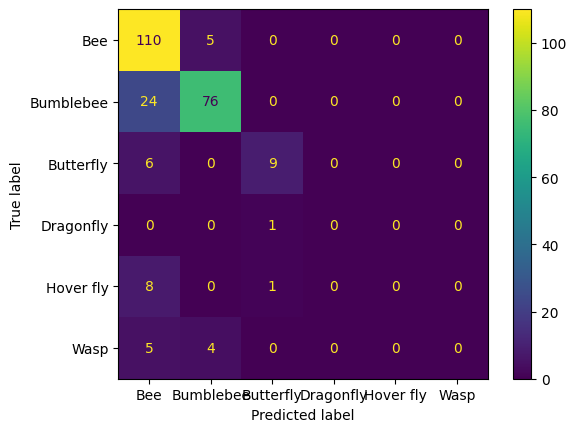

In [138]:
#search_space = {
#    'linkage': hp.choice('linkage', ['ward'])
#}
hac = AgglomerativeClustering(linkage='ward', n_clusters=n_classes)
#best_params = optimize_clustering(hac, search_space, max_evals=100, scoring='accuracy')
evaluate_clustering(hac, lim_X, y, plot=False)

In [139]:
gmm = GaussianMixture(n_components=n_classes)
evaluate_clustering(gmm, lim_X, y, plot=False)

AttributeError: 'GaussianMixture' object has no attribute 'labels_'

Silhouette score :  0.09322959332490635
Accuracy: 0.7429718875502008
Precision: 0.7280493017130842
Recall: 0.7429718875502008
F1 Score: 0.715067041785681
              precision    recall  f1-score   support

         Bee       0.72      0.94      0.82       115
   Bumblebee       0.91      0.64      0.75       100
   Butterfly       0.43      0.87      0.58        15
   Dragonfly       0.00      0.00      0.00         1
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.00      0.00      0.00         9

    accuracy                           0.74       249
   macro avg       0.35      0.41      0.36       249
weighted avg       0.73      0.74      0.72       249



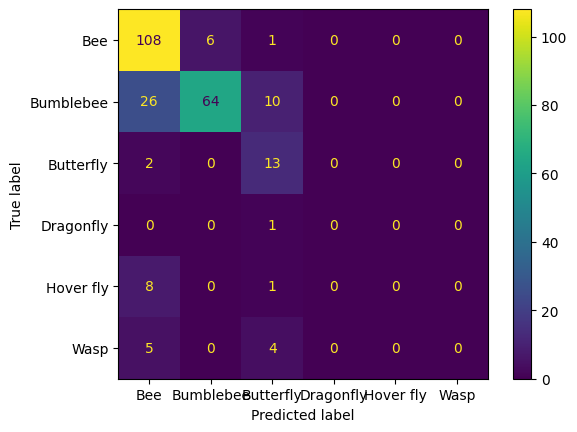

In [140]:
spectral = SpectralClustering(n_clusters=n_classes,affinity ='nearest_neighbors',n_neighbors=8)
evaluate_clustering(spectral, lim_X, y, plot=False)

In [26]:
birch = Birch(n_clusters=n_classes)
evaluate_clustering(birch, lim_X, y, plot=False)

NameError: name 'lim_X' is not defined

### Algorithms without n_clusters as parameter

We have tested the most common clustering algorithms that allow us to set the number of clusters. For the sake of testing we will try with DBSCAN, but it is harder to parametrize here and we will proably have to deal with outliers (points with no vcluster).

**TO DO**

## Classification (supervised learning) methods that are neither deep nor ensemble learning

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000024C85EC8410>, 'model__penalty': <hyperopt.pyll.base.Apply object at 0x0000024C85E60F90>, 'model__solver': <hyperopt.pyll.base.Apply object at 0x0000024C85E53790>}
100%|██████████| 100/100 [00:16<00:00,  5.89trial/s, best loss: -0.8306451612903225]
Best hyperparameters: {'model__C': 0.012671964811038612, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Accuracy: 0.8306451612903226
Precision: 0.8462806619623655
Recall: 0.8306451612903226
F1 Score: 0.8173513073090646
              precision    recall  f1-score   support

         Bee       0.82      0.91      0.86       115
   Bumblebee       0.89      0.85      0.87       100
   Butterfly       0.60      0.80      0.69        15
   Hover fly       1.00      0.11      0.20         9
        Wasp       1.00      0.33      0.50         9

    accuracy                           0.83       248
   macro avg       0.86      0.60      0.62       248
weighted avg       0.8

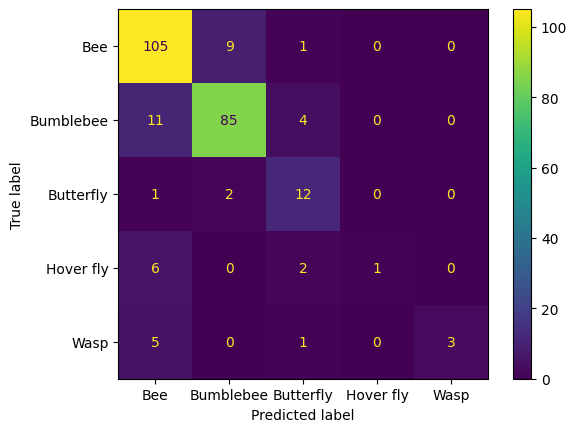

In [88]:
# Logistic regression on scaled data
search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(10)),  # Regularization strength
    'penalty': hp.choice('penalty', [ 'l2']),
    'solver': hp.choice('solver', ['lbfgs', 'liblinear'])
}
log = imbPipeline([('scaler', StandardScaler()), 
                   ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(log, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x000001EAE1681E10>, 'model__penalty': <hyperopt.pyll.base.Apply object at 0x000001EAE1680410>, 'model__solver': <hyperopt.pyll.base.Apply object at 0x000001EAE1677510>}
100%|██████████| 150/150 [00:25<00:00,  5.87trial/s, best loss: -0.8709677419354839]
Best hyperparameters: {'model__C': 1.1953417401914948, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Accuracy: 0.8709677419354839
Precision: 0.8668512206268806
Recall: 0.8709677419354839
F1 Score: 0.8647958010031946
              precision    recall  f1-score   support

         Bee       0.87      0.91      0.89       115
   Bumblebee       0.89      0.93      0.91       100
   Butterfly       0.90      0.60      0.72        15
   Hover fly       0.60      0.33      0.43         9
        Wasp       0.86      0.67      0.75         9

    accuracy                           0.87       248
   macro avg       0.82      0.69      0.74       248
weighted avg       0.87 

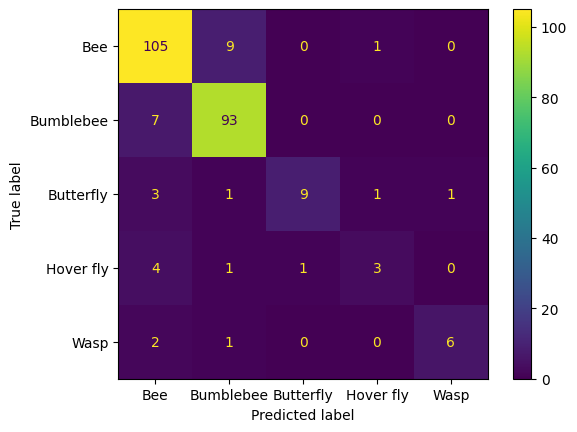

In [20]:
# Logistic regression on unscaled data (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),  # Regularization strength
    'penalty': hp.choice('penalty', [ 'l2']),
    'solver': hp.choice('solver', ['lbfgs', 'liblinear'])
}
log = imbPipeline([ 
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space,{}, max_evals=150, scoring='accuracy')
#{'C': 0.02544670436123156, 'penalty': 'l2', 'solver': 'liblinear'}
evaluate_classifier(log, X, y)

In [24]:
# Logistic regression on unscaled data (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),  # Regularization strength
    'penalty': hp.choice('penalty', [ 'l2']),
    'solver': hp.choice('solver', ['lbfgs', 'liblinear'])
}
log = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space, smote_sampling_strategy_space, max_evals=150, scoring='accuracy')
#{'C': 0.02544670436123156, 'penalty': 'l2', 'solver': 'liblinear'}
evaluate_classifier(log, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x000002720EE94C90>, 'model__penalty': <hyperopt.pyll.base.Apply object at 0x000002720EE94710>, 'model__solver': <hyperopt.pyll.base.Apply object at 0x000002720EED7AD0>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002720E1A0850>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002720E2939D0>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002720E2A3C10>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002720E2A22D0>}
 67%|██████▋   | 100/150 [00:05<00:02, 17.74trial/s, best loss: -0.8669354838709677]


KeyboardInterrupt: 

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x00000236EF97F250>, 'model__penalty': <hyperopt.pyll.base.Apply object at 0x00000236EF9AF5D0>, 'model__solver': <hyperopt.pyll.base.Apply object at 0x00000236EFA2C2D0>}
100%|██████████| 150/150 [02:18<00:00,  1.09trial/s, best loss: -0.8588709677419355]
Best hyperparameters: {'model__C': 0.031477889035183164, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Accuracy: 0.8588709677419355
Precision: 0.8566478254608295
Recall: 0.8588709677419355
F1 Score: 0.8503194278507898
              precision    recall  f1-score   support

         Bee       0.83      0.92      0.87       115
   Bumblebee       0.90      0.90      0.90       100
   Butterfly       0.90      0.60      0.72        15
   Hover fly       0.67      0.22      0.33         9
        Wasp       0.86      0.67      0.75         9

    accuracy                           0.86       248
   macro avg       0.83      0.66      0.72       248
weighted avg       0.8

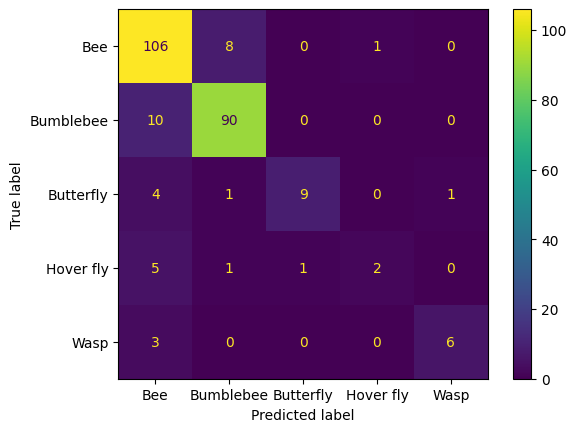

In [43]:
# Logistic regression on unscaled data with l1
search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),  # Regularization strength
    'penalty': hp.choice('penalty', [ 'l1']),
    'solver': hp.choice('solver', ['liblinear'])
}
log = imbPipeline([ 
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space,{}, max_evals=150, scoring='accuracy')
#{'C': 0.02544670436123156, 'penalty': 'l2', 'solver': 'liblinear'}
evaluate_classifier(log, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000028F59E56FD0>, 'model__penalty': <hyperopt.pyll.base.Apply object at 0x0000028F59A7F850>, 'model__solver': <hyperopt.pyll.base.Apply object at 0x0000028F599A02D0>, 'smote__strategy__Butterfly': <hyperopt.pyll.base.Apply object at 0x0000028F586607D0>, 'smote__strategy__Hover fly': <hyperopt.pyll.base.Apply object at 0x0000028F59C20AD0>, 'smote__strategy__Wasp': <hyperopt.pyll.base.Apply object at 0x0000028F57CA8050>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x0000028F58647D50>}
smote
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:17<00:00,  5.87trial/s, best loss: -0.8312852022529442]
Best hyperparameters: {'model__C': 67.96446146375857, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'smote__k_neighbors': 5, 'smote__strategy__Butterfly': 44, 'smote__strategy__Hover fly': 22, 'smote__strategy__Wasp': 24}
Accuracy: 0.8313253012048193
Precision: 0.8283171903299473
Recall: 0.8313253012048193
F1 Score: 0.8276457674383929
              precision    recall  f1-score   support

         Bee       0.85      0.88      0.86       115
   Bumblebee       0.86      0.88      0.87       100
   Butterfly       0.90      0.60      0.72        15
   Dragonfly       0.00      0.00      0.00         1
   Hover fly       0.29      0.22      0.25         9
        Wasp       0.70      0.78      0.74         9

    accuracy                           0.83       249
   macro avg       0.60      0.56      0.57       249
weighted avg       0.83      0.83      0.83       249



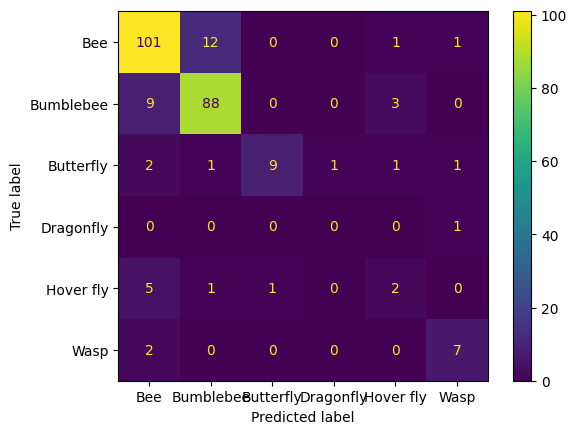

In [209]:
# Logistic regression on unscaled data with SMOTE
log = imbPipeline([ 
    ('smote', smote),
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(log, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000028F59E56FD0>, 'model__penalty': <hyperopt.pyll.base.Apply object at 0x0000028F59A7F850>, 'model__solver': <hyperopt.pyll.base.Apply object at 0x0000028F599A02D0>, 'smote__strategy__Butterfly': <hyperopt.pyll.base.Apply object at 0x0000028F586607D0>, 'smote__strategy__Hover fly': <hyperopt.pyll.base.Apply object at 0x0000028F59C20AD0>, 'smote__strategy__Wasp': <hyperopt.pyll.base.Apply object at 0x0000028F57CA8050>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x0000028F58647D50>}
smote
100%|██████████| 100/100 [00:06<00:00, 16.55trial/s, best loss: -0.8232846902201741]
Best hyperparameters: {'model__C': 0.01405993913622348, 'model__penalty': 'l2', 'model__solver': 'lbfgs', 'smote__k_neighbors': 4, 'smote__strategy__Butterfly': 29, 'smote__strategy__Hover fly': 10, 'smote__strategy__Wasp': 13}
Accuracy: 0.8232931726907631
Precision: 0.7994488777621308
Recall: 0.8232931726907631
F1 Score: 0.800489993173613

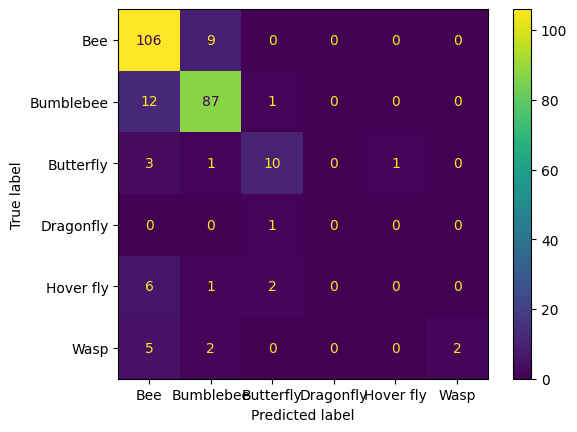

In [210]:
# Logistic regression on unscaled data with SMOTE
log = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(log, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000028F59E56FD0>, 'model__penalty': <hyperopt.pyll.base.Apply object at 0x0000028F59A7F850>, 'model__solver': <hyperopt.pyll.base.Apply object at 0x0000028F599A02D0>, 'adasyn__strategy__Butterfly': <hyperopt.pyll.base.Apply object at 0x0000028F57EA3850>, 'adasyn__strategy__Hover fly': <hyperopt.pyll.base.Apply object at 0x0000028F5982DD90>, 'adasyn__strategy__Wasp': <hyperopt.pyll.base.Apply object at 0x0000028F584E8A50>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x0000028F5A303E50>}
adasyn
{'Butterfly': 31, 'Hover fly': 18, 'Wasp': 17}         
{'Butterfly': 27, 'Hover fly': 16, 'Wasp': 26}                                    
{'Butterfly': 28, 'Hover fly': 23, 'Wasp': 22}                                    
{'Butterfly': 23, 'Hover fly': 25, 'Wasp': 24}                                    
{'Butterfly': 33, 'Hover fly': 18, 'Wasp': 21}                                    
{'Butterfly': 45, 'Hover fly': 14

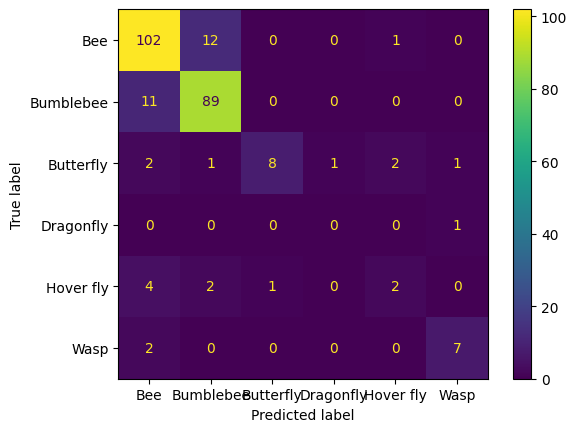

In [205]:
log = imbPipeline([ 
    ('adasyn', adasyn),
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(log, X, y)

Search space: {'model__n_neighbors': <hyperopt.pyll.base.Apply object at 0x00000236E8EB5D50>, 'model__weights': <hyperopt.pyll.base.Apply object at 0x00000236ED8C5E90>, 'model__p': <hyperopt.pyll.base.Apply object at 0x00000236EC63B710>}
  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 200/200 [00:13<00:00, 14.63trial/s, best loss: -0.7903225806451613]
Best hyperparameters: {'model__n_neighbors': 4, 'model__p': 1, 'model__weights': 'distance'}
Accuracy: 0.7903225806451613
Precision: 0.7886744451457276
Recall: 0.7903225806451613
F1 Score: 0.7833413424020635
              precision    recall  f1-score   support

         Bee       0.78      0.83      0.81       115
   Bumblebee       0.83      0.86      0.84       100
   Butterfly       0.86      0.40      0.55        15
   Hover fly       0.43      0.33      0.38         9
        Wasp       0.71      0.56      0.63         9

    accuracy                           0.79       248
   macro avg       0.72      0.60      0.64       248
weighted avg       0.79      0.79      0.78       248



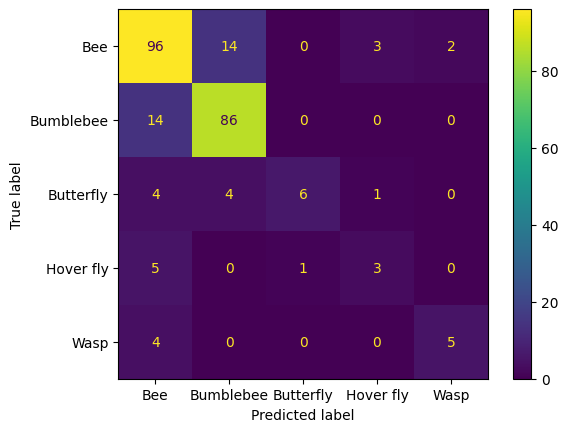

In [44]:
# Nearest Neighbors on scaled data 
knn = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())])

# Hyperparameter space for KNN
search_space = {
    'n_neighbors': hp.uniformint('n_neighbors', 1,25),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2, 3])  # Power parameter for the Minkowski metric
}

best_params = optimize_classifier(X, knn, search_space, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(knn, X, y)

Search space: {'model__n_neighbors': <hyperopt.pyll.base.Apply object at 0x00000236EFB97250>, 'model__weights': <hyperopt.pyll.base.Apply object at 0x00000236EC600A90>, 'model__p': <hyperopt.pyll.base.Apply object at 0x00000236EFA62B50>}
100%|██████████| 200/200 [00:15<00:00, 13.16trial/s, best loss: -0.8548387096774194]
Best hyperparameters: {'model__n_neighbors': 4, 'model__p': 1, 'model__weights': 'distance'}
Accuracy: 0.8548387096774194
Precision: 0.8573683484973808
Recall: 0.8548387096774194
F1 Score: 0.8426626697466404
              precision    recall  f1-score   support

         Bee       0.83      0.94      0.88       115
   Bumblebee       0.89      0.88      0.88       100
   Butterfly       1.00      0.40      0.57        15
   Hover fly       0.67      0.22      0.33         9
        Wasp       0.80      0.89      0.84         9

    accuracy                           0.85       248
   macro avg       0.84      0.67      0.70       248
weighted avg       0.86      0.85  

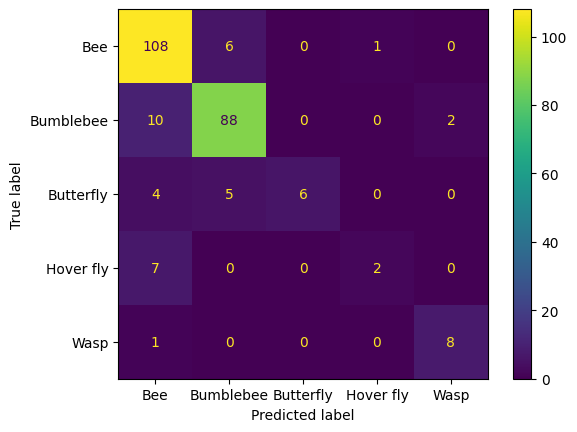

In [46]:
# Nearest Neighbors on scaled data with dimensionality reduction first (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
knn = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())])

# Hyperparameter space for KNN
search_space = {
    'n_neighbors': hp.uniformint('n_neighbors', 1,25),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2, 3])  # Power parameter for the Minkowski metric
}

best_params = optimize_classifier(X, knn, search_space, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(knn, X, y)

Search space: {'model__n_neighbors': <hyperopt.pyll.base.Apply object at 0x00000236EFB3C690>, 'model__weights': <hyperopt.pyll.base.Apply object at 0x00000236EFB3FC10>, 'model__p': <hyperopt.pyll.base.Apply object at 0x00000236EFB63250>}
  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 200/200 [00:16<00:00, 11.91trial/s, best loss: -0.8346774193548387]
Best hyperparameters: {'model__n_neighbors': 5, 'model__p': 1, 'model__weights': 'distance'}
Accuracy: 0.8346774193548387
Precision: 0.8285221163245357
Recall: 0.8346774193548387
F1 Score: 0.8195718102222812
              precision    recall  f1-score   support

         Bee       0.81      0.93      0.87       115
   Bumblebee       0.88      0.87      0.87       100
   Butterfly       0.80      0.27      0.40        15
   Hover fly       0.50      0.22      0.31         9
        Wasp       0.88      0.78      0.82         9

    accuracy                           0.83       248
   macro avg       0.77      0.61      0.65       248
weighted avg       0.83      0.83      0.82       248



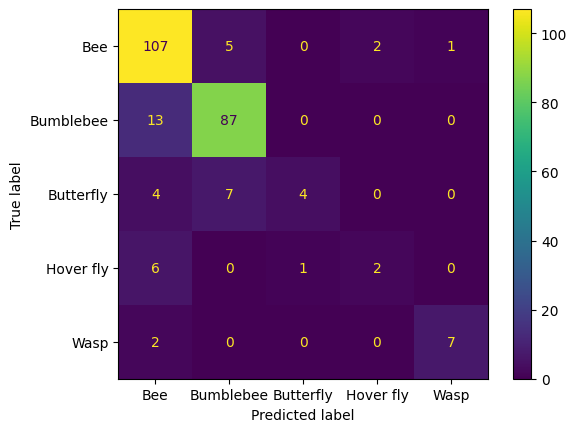

In [45]:
# Nearest Neighbors on scaled data with dimensionality reduction after
knn = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('dim_reductor', dim_reductor),
    ('model', KNeighborsClassifier())])

# Hyperparameter space for KNN
search_space = {
    'n_neighbors': hp.uniformint('n_neighbors', 1,25),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2, 3])  # Power parameter for the Minkowski metric
}

best_params = optimize_classifier(X, knn, search_space, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(knn, X, y)

In [27]:
common_params = {
    'C': hp.loguniform('C', np.log(0.01), np.log(10)), 
}
poly_params = {
    **common_params,
    'kernel': 'poly',
    'degree': hp.choice('poly_degree', [2, 3, 4, 5]),  # Degree of the polynomial kernel function
    'gamma': hp.choice('poly_gamma', ['scale', 'auto']),
    'coef0': hp.uniform('poly_coef0', 0, 10)  # Independent term in kernel function
}

rbf_params = {
    **common_params,
    'kernel': 'rbf',
    'gamma': hp.choice('rbf_gamma', ['scale', 'auto'])
}

sigmoid_params = {
    **common_params,
    'kernel': 'sigmoid',
    'gamma': hp.choice('sigmoid_gamma', ['scale', 'auto']),
    'coef0': hp.uniform('sigmoid_coef0', 0, 10)  # Independent term in kernel function
}

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000027150FBCE50>, 'model__kernel': 'poly', 'model__degree': <hyperopt.pyll.base.Apply object at 0x0000027151046C10>, 'model__gamma': <hyperopt.pyll.base.Apply object at 0x0000027151044690>, 'model__coef0': <hyperopt.pyll.base.Apply object at 0x0000027151046B90>}
100%|██████████| 200/200 [00:12<00:00, 15.82trial/s, best loss: -0.8346774193548387]
Best hyperparameters: {'model__C': 0.13777312811415823, 'model__coef0': 2.3466575515380206, 'model__degree': 3, 'model__gamma': 'scale', 'model__kernel': 'poly'}
Accuracy: 0.8346774193548387
Precision: 0.8310572488700484
Recall: 0.8346774193548387
F1 Score: 0.8204113400950228
              precision    recall  f1-score   support

         Bee       0.80      0.92      0.86       115
   Bumblebee       0.87      0.88      0.88       100
   Butterfly       0.88      0.47      0.61        15
   Hover fly       0.50      0.11      0.18         9
        Wasp       1.00      0.56     

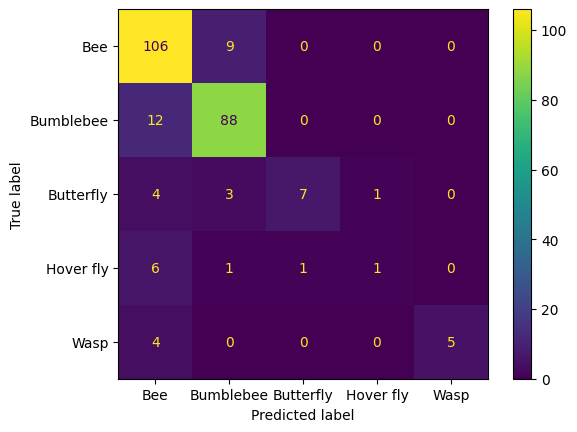

In [32]:
# Polynomial SVM on scaled data
poly_svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('model', SVC(max_iter=10000))])

# Hyperparameter space for SVC
best_params = optimize_classifier(X, poly_svc, poly_params, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(poly_svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000027150FBCE50>, 'model__kernel': 'poly', 'model__degree': <hyperopt.pyll.base.Apply object at 0x0000027151046C10>, 'model__gamma': <hyperopt.pyll.base.Apply object at 0x0000027151044690>, 'model__coef0': <hyperopt.pyll.base.Apply object at 0x0000027151046B90>}
  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 200/200 [00:13<00:00, 14.39trial/s, best loss: -0.8467741935483871]
Best hyperparameters: {'model__C': 0.20187136291363428, 'model__coef0': 3.821684415522275, 'model__degree': 2, 'model__gamma': 'auto', 'model__kernel': 'poly'}
Accuracy: 0.8467741935483871
Precision: 0.841618451547388
Recall: 0.8467741935483871
F1 Score: 0.8342894421304216
              precision    recall  f1-score   support

         Bee       0.82      0.92      0.87       115
   Bumblebee       0.88      0.89      0.89       100
   Butterfly       0.89      0.53      0.67        15
   Hover fly       0.50      0.11      0.18         9
        Wasp       1.00      0.67      0.80         9

    accuracy                           0.85       248
   macro avg       0.82      0.62      0.68       248
weighted avg       0.84      0.85      0.83       248



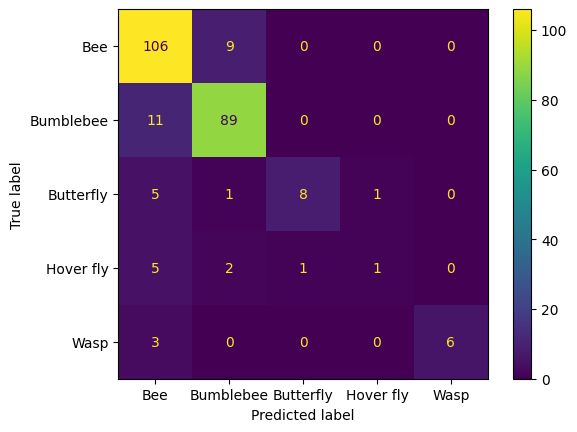

In [31]:
# Polynomial SVM on scaled data with smote
poly_svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC(max_iter=10000))])

# Hyperparameter space for SVC
best_params = optimize_classifier(X, poly_svc, poly_params, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(poly_svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000027150FBCE50>, 'model__kernel': 'poly', 'model__degree': <hyperopt.pyll.base.Apply object at 0x0000027151046C10>, 'model__gamma': <hyperopt.pyll.base.Apply object at 0x0000027151044690>, 'model__coef0': <hyperopt.pyll.base.Apply object at 0x0000027151046B90>}
100%|██████████| 1000/1000 [01:29<00:00, 11.14trial/s, best loss: -0.8790322580645161]
Best hyperparameters: {'model__C': 0.013951867059218423, 'model__coef0': 5.77663356240323, 'model__degree': 3, 'model__gamma': 'auto', 'model__kernel': 'poly'}
Accuracy: 0.8790322580645161
Precision: 0.8836132194813409
Recall: 0.8790322580645161
F1 Score: 0.8697721889124397
              precision    recall  f1-score   support

         Bee       0.86      0.93      0.89       115
   Bumblebee       0.90      0.92      0.91       100
   Butterfly       0.90      0.60      0.72        15
   Hover fly       1.00      0.22      0.36         9
        Wasp       0.89      0.89     

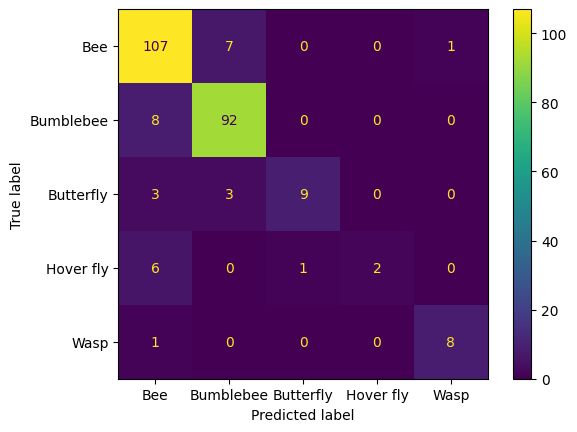

In [36]:
# Polynomial SVM on scaled data with smote and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
poly_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC(max_iter=10000))])
best_params = optimize_classifier(X, poly_svc, poly_params, {}, max_evals=1000, scoring='accuracy')
evaluate_classifier(poly_svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000027150FBCE50>, 'model__kernel': 'poly', 'model__degree': <hyperopt.pyll.base.Apply object at 0x0000027151046C10>, 'model__gamma': <hyperopt.pyll.base.Apply object at 0x0000027151044690>, 'model__coef0': <hyperopt.pyll.base.Apply object at 0x0000027151046B90>, 'adasyn__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DC476D0>, 'adasyn__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DC525D0>, 'adasyn__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DBAEA10>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6B50>}
100%|██████████| 200/200 [00:16<00:00, 11.78trial/s, best loss: -0.8306451612903226]
Best hyperparameters: {'adasyn__n_neighbors': 4, 'adasyn__strategy__2': 44, 'adasyn__strategy__3': 19, 'adasyn__strategy__4': 27, 'model__C': 0.1947547504793578, 'model__coef0': 1.1833399655147392, 'model__degree': 3, 'model__gamma': 'scale', 'model__kernel': 'poly'

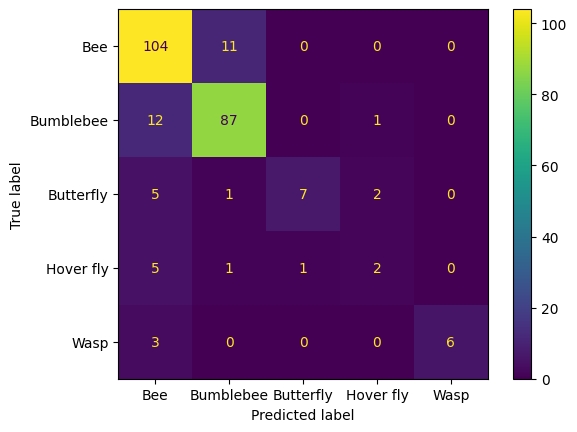

In [33]:
# Polynomial SVM on scaled data with adasyn
poly_svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', SVC(max_iter=10000))])
best_params = optimize_classifier(X, poly_svc, poly_params, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(poly_svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000027150FBCE50>, 'model__kernel': 'poly', 'model__degree': <hyperopt.pyll.base.Apply object at 0x0000027151046C10>, 'model__gamma': <hyperopt.pyll.base.Apply object at 0x0000027151044690>, 'model__coef0': <hyperopt.pyll.base.Apply object at 0x0000027151046B90>, 'adasyn__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DC476D0>, 'adasyn__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DC525D0>, 'adasyn__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DBAEA10>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6B50>}
100%|██████████| 200/200 [00:16<00:00, 12.21trial/s, best loss: -0.8709677419354839]
Best hyperparameters: {'adasyn__n_neighbors': 3, 'adasyn__strategy__2': 29, 'adasyn__strategy__3': 21, 'adasyn__strategy__4': 20, 'model__C': 0.13355227515160217, 'model__coef0': 1.149775789380324, 'model__degree': 4, 'model__gamma': 'scale', 'model__kernel': 'poly'

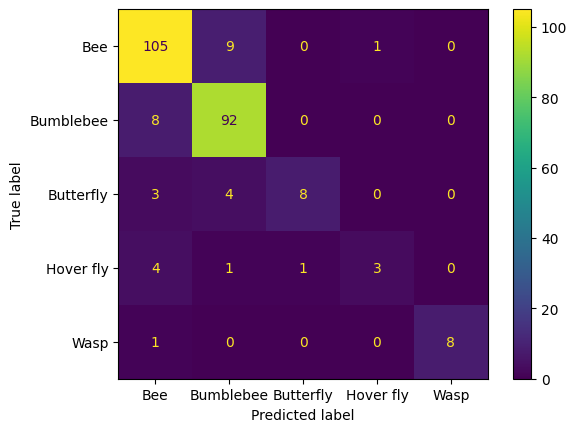

In [35]:
# Polynomial SVM on scaled data with adasyn and dimensionality reduction
poly_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', SVC(max_iter=10000))])
best_params = optimize_classifier(X, poly_svc, poly_params, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(poly_svc, X, y) 

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x000001D228161750>, 'model__kernel': 'rbf', 'model__gamma': <hyperopt.pyll.base.Apply object at 0x000001D22A4E69D0>}
None
100%|██████████| 200/200 [00:07<00:00, 27.89trial/s, best loss: -0.8150921658986175]
Best hyperparameters: {'model__C': 3.640501750931965, 'model__gamma': 'auto', 'model__kernel': 'rbf'}
Accuracy: 0.8152610441767069
Precision: 0.8267535111474569
Recall: 0.8152610441767069
F1 Score: 0.8001725137879554
              precision    recall  f1-score   support

         Bee       0.77      0.91      0.83       115
   Bumblebee       0.87      0.84      0.85       100
   Butterfly       0.88      0.47      0.61        15
   Dragonfly       0.00      0.00      0.00         1
   Hover fly       1.00      0.11      0.20         9
        Wasp       1.00      0.67      0.80         9

    accuracy                           0.82       249
   macro avg       0.75      0.50      0.55       249
weighted avg       0.83 

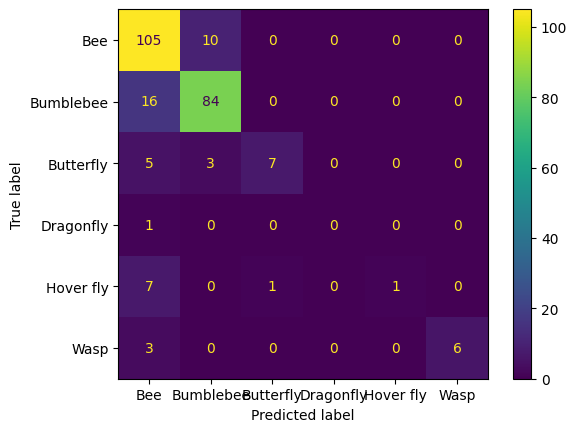

In [54]:
# RBF SVM on scaled data without SMOTE
rbf_svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('model', SVC())])

# Hyperparameter space for SVC
best_params = optimize_classifier(X, rbf_svc, rbf_params, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(rbf_svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x000001D228161750>, 'model__kernel': 'rbf', 'model__gamma': <hyperopt.pyll.base.Apply object at 0x000001D22A4E69D0>, 'smote__strategy__Butterfly': <hyperopt.pyll.base.Apply object at 0x000001D22A500210>, 'smote__strategy__Hover fly': <hyperopt.pyll.base.Apply object at 0x000001D22A5018D0>, 'smote__strategy__Wasp': <hyperopt.pyll.base.Apply object at 0x000001D2280BDD50>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000001D22A4E7C90>}
smote
100%|██████████| 200/200 [00:07<00:00, 25.16trial/s, best loss: -0.8192524321556579]
Best hyperparameters: {'model__C': 2.0910880314605866, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'smote__k_neighbors': 3, 'smote__strategy__Butterfly': 44, 'smote__strategy__Hover fly': 20, 'smote__strategy__Wasp': 19}
Accuracy: 0.8192771084337349
Precision: 0.8276827994279891
Recall: 0.8192771084337349
F1 Score: 0.8079955981202139
              precision    recall  f1-score   suppor

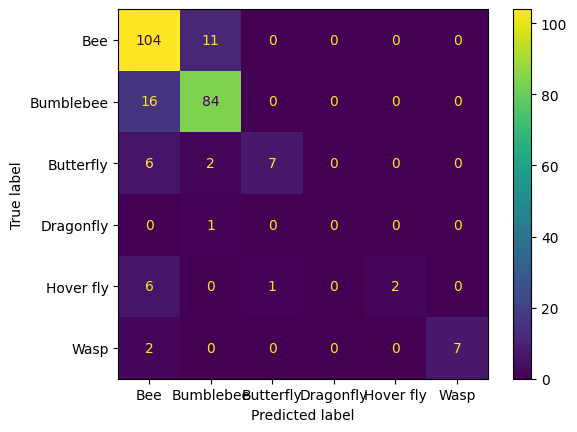

In [58]:
# RBF SVM on scaled data with SMOTE
rbf_svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC())])

# Hyperparameter space for SVC
best_params = optimize_classifier(X, rbf_svc, rbf_params, smote_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(rbf_svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000027150FBCE50>, 'model__kernel': 'rbf', 'model__gamma': <hyperopt.pyll.base.Apply object at 0x0000027151045B90>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DB5A9D0>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DB5B950>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DB59AD0>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6850>}
100%|██████████| 200/200 [00:19<00:00, 10.04trial/s, best loss: -0.875]           
Best hyperparameters: {'model__C': 1.2448754151720633, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'smote__k_neighbors': 5, 'smote__strategy__2': 34, 'smote__strategy__3': 22, 'smote__strategy__4': 13}
Accuracy: 0.875
Precision: 0.8756400409626216
Recall: 0.875
F1 Score: 0.8697268183414616
              precision    recall  f1-score   support

         Bee       0.85      0.93      0.89       115
   Bumblebee   

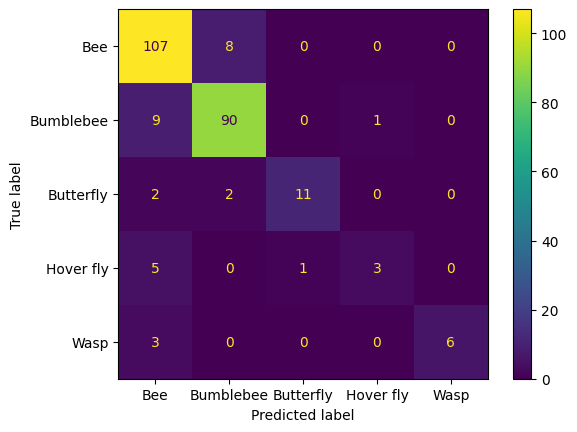

In [38]:
# RBF SVM on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
rbf_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC())])
best_params = optimize_classifier(X, rbf_svc, rbf_params, smote_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(rbf_svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x000001D228161750>, 'model__kernel': 'rbf', 'model__gamma': <hyperopt.pyll.base.Apply object at 0x000001D22A4E69D0>, 'adasyn__strategy__Butterfly': <hyperopt.pyll.base.Apply object at 0x000001D22A501650>, 'adasyn__strategy__Hover fly': <hyperopt.pyll.base.Apply object at 0x000001D22A503110>, 'adasyn__strategy__Wasp': <hyperopt.pyll.base.Apply object at 0x000001D228075050>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000001D228132F50>}
adasyn
100%|██████████| 200/200 [00:08<00:00, 23.49trial/s, best loss: -0.8273809523809523]
Best hyperparameters: {'adasyn__n_neighbors': 3, 'adasyn__strategy__Butterfly': 24, 'adasyn__strategy__Hover fly': 13, 'adasyn__strategy__Wasp': 21, 'model__C': 0.9619193615753019, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Accuracy: 0.8273092369477911
Precision: 0.8349978862819699
Recall: 0.8273092369477911
F1 Score: 0.8119858114083262
              precision    recall  f1-score

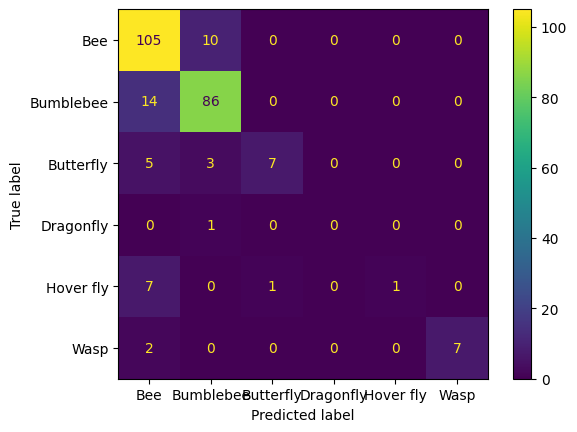

In [57]:
# RBF SVM on scaled data with ADASYN
rbf_svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', SVC())])
best_params = optimize_classifier(X, rbf_svc, rbf_params, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(rbf_svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000027150FBCE50>, 'model__kernel': 'rbf', 'model__gamma': <hyperopt.pyll.base.Apply object at 0x0000027151045B90>, 'adasyn__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DC476D0>, 'adasyn__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DC525D0>, 'adasyn__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DBAEA10>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6B50>}
100%|██████████| 200/200 [00:22<00:00,  9.04trial/s, best loss: -0.8709677419354839]
Best hyperparameters: {'adasyn__n_neighbors': 3, 'adasyn__strategy__2': 25, 'adasyn__strategy__3': 16, 'adasyn__strategy__4': 20, 'model__C': 1.3492992308502694, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Accuracy: 0.8709677419354839
Precision: 0.8762848418415283
Recall: 0.8709677419354839
F1 Score: 0.8644621669579957
              precision    recall  f1-score   support

         Bee       0.86      0.93

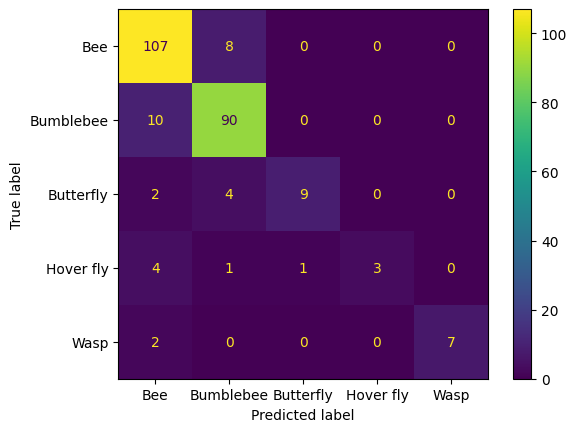

In [37]:
# RBF SVM on scaled data with ADASYN and dimensionality reduction
rbf_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', SVC())])
best_params = optimize_classifier(X, rbf_svc, rbf_params, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(rbf_svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000027150FBCE50>, 'model__kernel': 'sigmoid', 'model__gamma': <hyperopt.pyll.base.Apply object at 0x0000027151045BD0>, 'model__coef0': <hyperopt.pyll.base.Apply object at 0x0000027151045050>}
  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 200/200 [00:13<00:00, 15.37trial/s, best loss: -0.8064516129032259]
Best hyperparameters: {'model__C': 1.8986562045646274, 'model__coef0': 0.007615990667284633, 'model__gamma': 'scale', 'model__kernel': 'sigmoid'}
Accuracy: 0.8064516129032258
Precision: 0.7538902771467515
Recall: 0.8064516129032258
F1 Score: 0.7740644444045975
              precision    recall  f1-score   support

         Bee       0.76      0.94      0.84       115
   Bumblebee       0.88      0.84      0.86       100
   Butterfly       0.80      0.53      0.64        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.00      0.00      0.00         9

    accuracy                           0.81       248
   macro avg       0.49      0.46      0.47       248
weighted avg       0.75      0.81      0.77       248



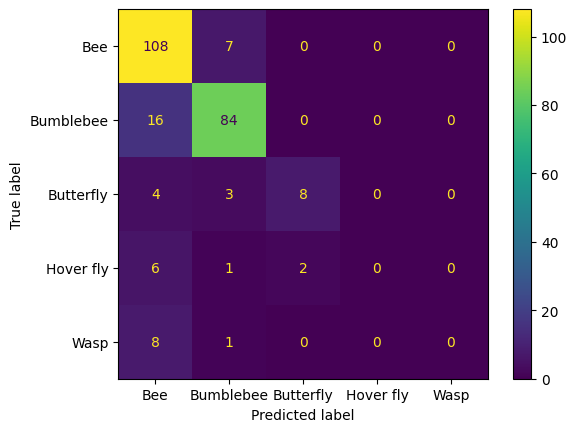

In [39]:
# Sigmoid SVM on scaled data without SMOTE
svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('model', SVC())])
best_params = optimize_classifier(X, svc, sigmoid_params, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000027150FBCE50>, 'model__kernel': 'sigmoid', 'model__gamma': <hyperopt.pyll.base.Apply object at 0x0000027151045BD0>, 'model__coef0': <hyperopt.pyll.base.Apply object at 0x0000027151045050>}
  0%|          | 0/400 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 400/400 [00:29<00:00, 13.55trial/s, best loss: -0.8306451612903226]
Best hyperparameters: {'model__C': 1.0068114607353804, 'model__coef0': 0.011161505900915254, 'model__gamma': 'scale', 'model__kernel': 'sigmoid'}
Accuracy: 0.8306451612903226
Precision: 0.7709091276578544
Recall: 0.8306451612903226
F1 Score: 0.7968320918250806
              precision    recall  f1-score   support

         Bee       0.80      0.93      0.86       115
   Bumblebee       0.87      0.91      0.89       100
   Butterfly       0.80      0.53      0.64        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.00      0.00      0.00         9

    accuracy                           0.83       248
   macro avg       0.49      0.47      0.48       248
weighted avg       0.77      0.83      0.80       248



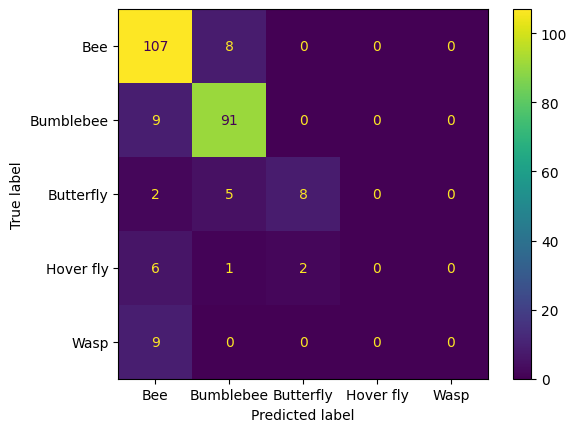

In [43]:
# Sigmoid SVM on scaled data without SMOTE and with dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
sigmoid_svc = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', SVC())])
best_params = optimize_classifier(X, sigmoid_svc, sigmoid_params, {}, max_evals=400, scoring='accuracy')
evaluate_classifier(sigmoid_svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000027150FBCE50>, 'model__kernel': 'sigmoid', 'model__gamma': <hyperopt.pyll.base.Apply object at 0x0000027151045BD0>, 'model__coef0': <hyperopt.pyll.base.Apply object at 0x0000027151045050>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DB5A9D0>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DB5B950>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DB59AD0>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6850>}
  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 200/200 [00:13<00:00, 14.58trial/s, best loss: -0.7741935483870968]
Best hyperparameters: {'model__C': 2.4392254767883843, 'model__coef0': 0.11495772915334149, 'model__gamma': 'auto', 'model__kernel': 'sigmoid', 'smote__k_neighbors': 4, 'smote__strategy__2': 21, 'smote__strategy__3': 21, 'smote__strategy__4': 13}
Accuracy: 0.7741935483870968
Precision: 0.7757639855899617
Recall: 0.7741935483870968
F1 Score: 0.7673826462411124
              precision    recall  f1-score   support

         Bee       0.76      0.88      0.81       115
   Bumblebee       0.87      0.79      0.83       100
   Butterfly       0.64      0.47      0.54        15
   Hover fly       0.30      0.33      0.32         9
        Wasp       0.67      0.22      0.33         9

    accuracy                           0.77       248
   macro avg       0.65      0.54      0.57       248
weighted avg       0.78      0.77      0.77       248



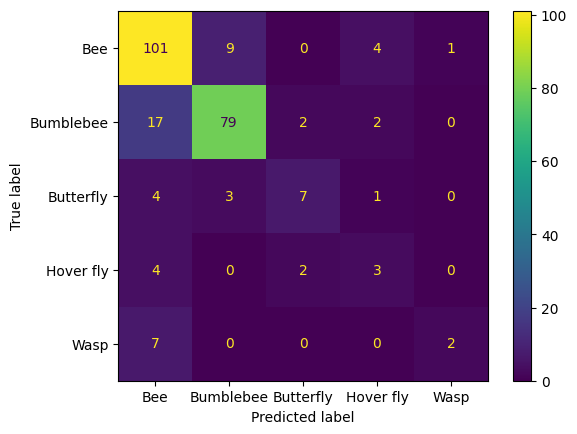

In [40]:
# Sigmoid SVM on scaled data with SMOTE
svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC())])
best_params = optimize_classifier(X, svc, sigmoid_params, smote_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x0000027150FBCE50>, 'model__kernel': 'sigmoid', 'model__gamma': <hyperopt.pyll.base.Apply object at 0x0000027151045BD0>, 'model__coef0': <hyperopt.pyll.base.Apply object at 0x0000027151045050>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DB5A9D0>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DB5B950>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DB59AD0>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6850>}
100%|██████████| 200/200 [00:18<00:00, 10.94trial/s, best loss: -0.8064516129032258]
Best hyperparameters: {'model__C': 1.4109640838647237, 'model__coef0': 0.38724268015407515, 'model__gamma': 'auto', 'model__kernel': 'sigmoid', 'smote__k_neighbors': 5, 'smote__strategy__2': 23, 'smote__strategy__3': 13, 'smote__strategy__4': 16}
Accuracy: 0.8064516129032258
Precision: 0.7876342226466966
Recall: 0.8064516129032258
F1 Score

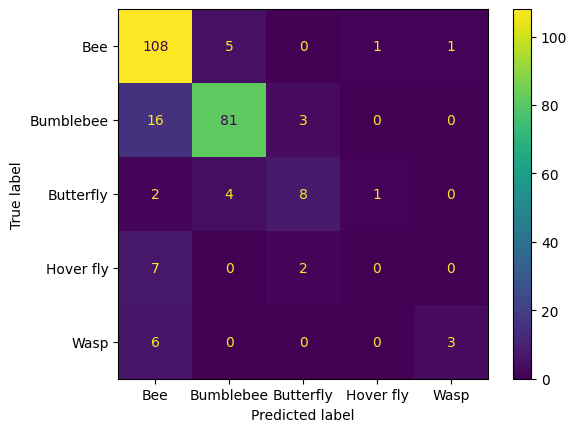

In [42]:
# Sigmoid SVM on scaled data with SMOTE and dimensionality reduction
svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC())])
best_params = optimize_classifier(X, svc, sigmoid_params, smote_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(svc, X, y)

Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x000001D228161750>, 'model__kernel': 'sigmoid', 'model__gamma': <hyperopt.pyll.base.Apply object at 0x000001D22A494910>, 'model__coef0': <hyperopt.pyll.base.Apply object at 0x000001D22A543B90>, 'adasyn__strategy__Butterfly': <hyperopt.pyll.base.Apply object at 0x000001D22A501650>, 'adasyn__strategy__Hover fly': <hyperopt.pyll.base.Apply object at 0x000001D22A503110>, 'adasyn__strategy__Wasp': <hyperopt.pyll.base.Apply object at 0x000001D228075050>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000001D228132F50>}
adasyn
100%|██████████| 200/200 [00:09<00:00, 20.71trial/s, best loss: -0.7791858678955452]
Best hyperparameters: {'adasyn__n_neighbors': 5, 'adasyn__strategy__Butterfly': 37, 'adasyn__strategy__Hover fly': 22, 'adasyn__strategy__Wasp': 17, 'model__C': 1.2091091905159617, 'model__coef0': 0.05886864820621068, 'model__gamma': 'scale', 'model__kernel': 'sigmoid'}
Accuracy: 0.7791164658634538
Precision: 

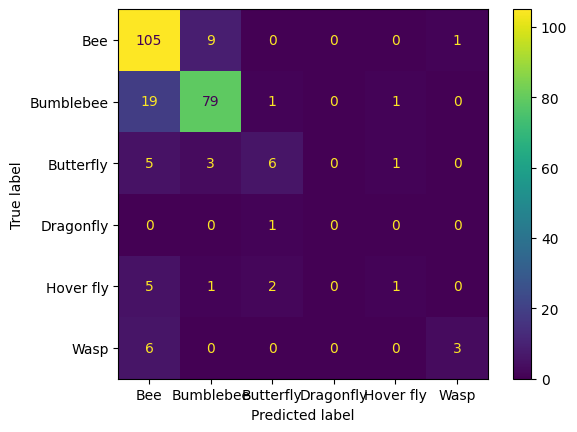

In [59]:
# Sigmoid SVM on scaled data with ADASYN
svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', SVC())])
best_params = optimize_classifier(X, svc, sigmoid_params, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(svc, X, y)

Accuracy: 0.5524193548387096
Precision: 0.7436159170335009
Recall: 0.5524193548387096
F1 Score: 0.5844119501081971
              precision    recall  f1-score   support

         Bee       0.88      0.37      0.52       115
   Bumblebee       0.72      0.68      0.70       100
   Butterfly       0.19      0.80      0.30        15
   Hover fly       0.20      0.67      0.31         9
        Wasp       0.73      0.89      0.80         9

    accuracy                           0.55       248
   macro avg       0.54      0.68      0.53       248
weighted avg       0.74      0.55      0.58       248



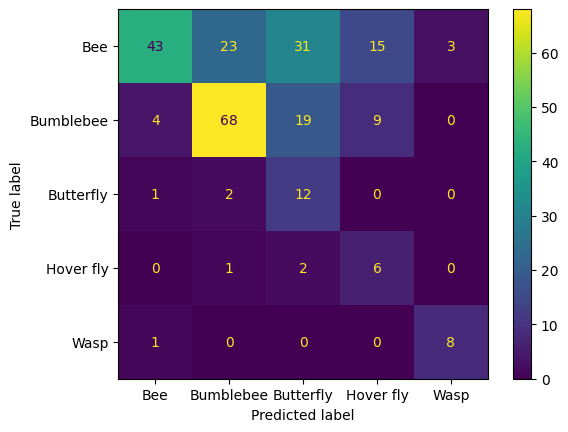

In [44]:
# Gaussian Naive Bayes on scaled data
nb = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', GaussianNB())
])
evaluate_classifier(nb, X, y)

Accuracy: 0.6987951807228916
Precision: 0.7754060057758043
Recall: 0.6987951807228916
F1 Score: 0.7277072998678183
              precision    recall  f1-score   support

         Bee       0.80      0.68      0.73       115
   Bumblebee       0.84      0.71      0.77       100
   Butterfly       0.81      0.87      0.84        15
   Dragonfly       0.00      0.00      0.00         1
   Hover fly       0.11      0.44      0.18         9
        Wasp       0.53      0.89      0.67         9

    accuracy                           0.70       249
   macro avg       0.52      0.60      0.53       249
weighted avg       0.78      0.70      0.73       249



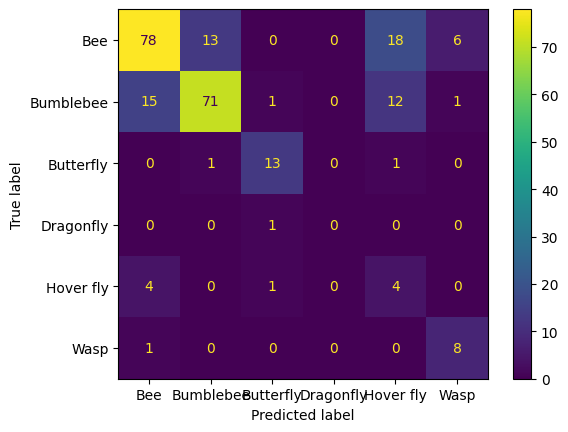

In [61]:
# Gaussian Naive Bayes on unscaled data
nb = imbPipeline([
    ('model', GaussianNB())
])
evaluate_classifier(nb, X, y)


Accuracy: 0.6895161290322581
Precision: 0.7803288318493552
Recall: 0.6895161290322581
F1 Score: 0.7234695528875051
              precision    recall  f1-score   support

         Bee       0.79      0.65      0.71       115
   Bumblebee       0.85      0.71      0.77       100
   Butterfly       0.87      0.87      0.87        15
   Hover fly       0.11      0.44      0.17         9
        Wasp       0.47      0.89      0.62         9

    accuracy                           0.69       248
   macro avg       0.62      0.71      0.63       248
weighted avg       0.78      0.69      0.72       248



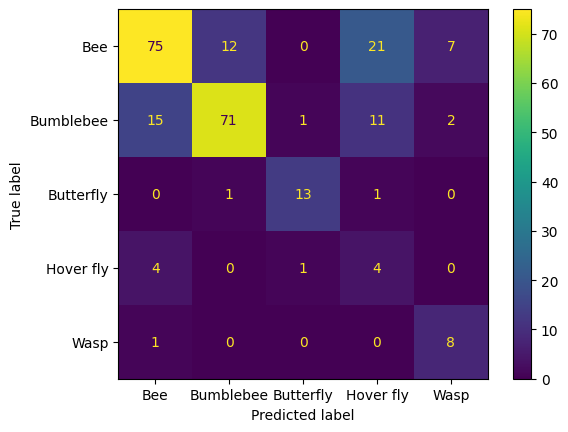

In [45]:
# Gaussian Naive Bayes on unscaled data and with SMOTE
nb = imbPipeline([
    ('smote', smote),
    ('model', GaussianNB())
])
evaluate_classifier(nb, X, y)


Accuracy: 0.7620967741935484
Precision: 0.7626174228996809
Recall: 0.7620967741935484
F1 Score: 0.7614268083948448
              precision    recall  f1-score   support

         Bee       0.77      0.78      0.78       115
   Bumblebee       0.79      0.77      0.78       100
   Butterfly       0.92      0.80      0.86        15
   Hover fly       0.25      0.22      0.24         9
        Wasp       0.67      0.89      0.76         9

    accuracy                           0.76       248
   macro avg       0.68      0.69      0.68       248
weighted avg       0.76      0.76      0.76       248



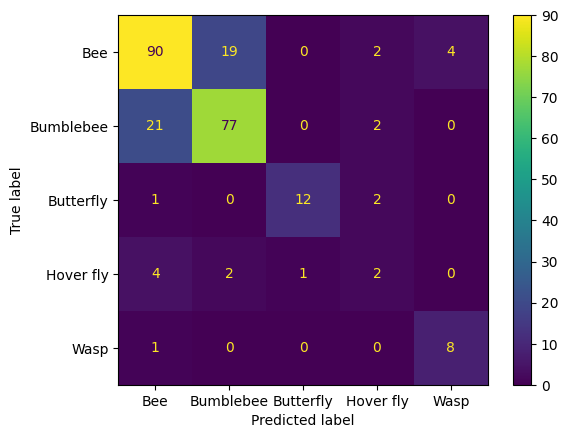

In [46]:
# Gaussian Naive Bayes on unscaled data and with dimensionality reduction
nb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('model', GaussianNB())
])
evaluate_classifier(nb, X, y)

Search space: {'model__max_depth': <hyperopt.pyll.base.Apply object at 0x00000271519AAA10>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x00000271519A87D0>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x00000271519C0B50>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x000002715198A0D0>}
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:06<00:00, 14.49trial/s, best loss: -0.7177419354838709]
Best hyperparameters: {'model__max_depth': 3, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 0.1359114109555809}
Accuracy: 0.717741935483871
Precision: 0.6884952776318843
Recall: 0.717741935483871
F1 Score: 0.6966691528700784
              precision    recall  f1-score   support

         Bee       0.69      0.83      0.76       115
   Bumblebee       0.79      0.75      0.77       100
   Butterfly       0.62      0.33      0.43        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.33      0.22      0.27         9

    accuracy                           0.72       248
   macro avg       0.49      0.43      0.45       248
weighted avg       0.69      0.72      0.70       248



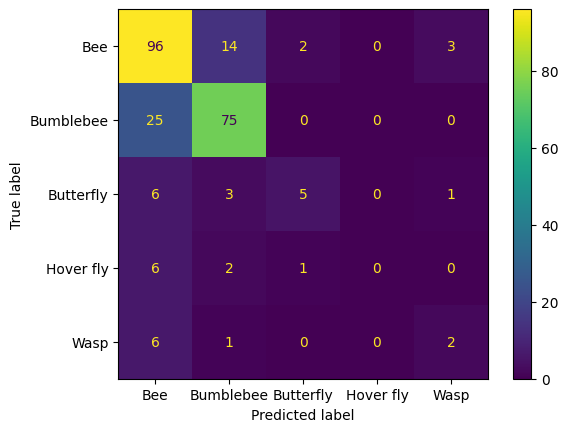

In [48]:
# Decision Tree on scaled data
dt = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier())
])
search_space = {
    'max_depth': hp.choice('max_depth', range(1, 21)),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 11)),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
}
best_params = optimize_classifier(X, dt, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(dt, X, y)

Search space: {'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000001D22E6A3150>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x000001D22E6A3350>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x000001D22E6A33D0>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x000001D22E6ACB50>}
None
100%|██████████| 100/100 [00:02<00:00, 39.57trial/s, best loss: -0.7147337429595495]
Best hyperparameters: {'model__max_depth': 12, 'model__max_features': 'log2', 'model__min_samples_leaf': 10, 'model__min_samples_split': 0.16467522379153648}
Accuracy: 0.714859437751004
Precision: 0.6592222548731512
Recall: 0.714859437751004
F1 Score: 0.6856319281049779
              precision    recall  f1-score   support

         Bee       0.73      0.78      0.76       115
   Bumblebee       0.71      0.80      0.75       100
   Butterfly       0.57      0.53      0.55        15
   Dragonfly       0.00      0.00      0.00         1
   Hover fly       0.00    

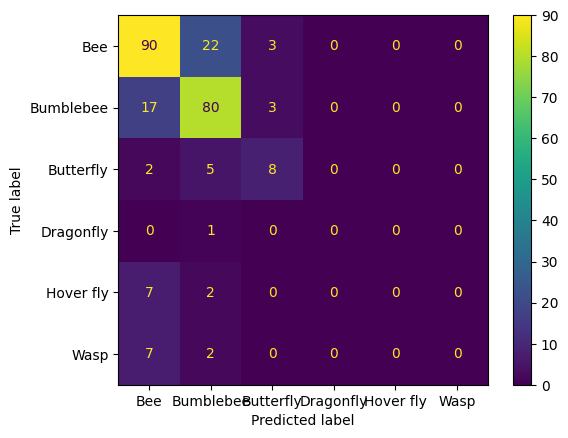

In [64]:
# Decision Tree on unscaled data
dt = imbPipeline([
    ('model', DecisionTreeClassifier())
])
best_params = optimize_classifier(X, dt, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(dt, X, y)

Search space: {'model__max_depth': <hyperopt.pyll.base.Apply object at 0x00000271519AAA10>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x00000271519A87D0>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x00000271519C0B50>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x000002715198A0D0>}
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:06<00:00, 14.74trial/s, best loss: -0.7258064516129032]
Best hyperparameters: {'model__max_depth': 20, 'model__max_features': None, 'model__min_samples_leaf': 7, 'model__min_samples_split': 0.17873178634599016}
Accuracy: 0.7258064516129032
Precision: 0.6914705398288348
Recall: 0.7258064516129032
F1 Score: 0.7023323862228648
              precision    recall  f1-score   support

         Bee       0.71      0.83      0.77       115
   Bumblebee       0.80      0.78      0.79       100
   Butterfly       0.40      0.13      0.20        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.42      0.56      0.48         9

    accuracy                           0.73       248
   macro avg       0.47      0.46      0.45       248
weighted avg       0.69      0.73      0.70       248



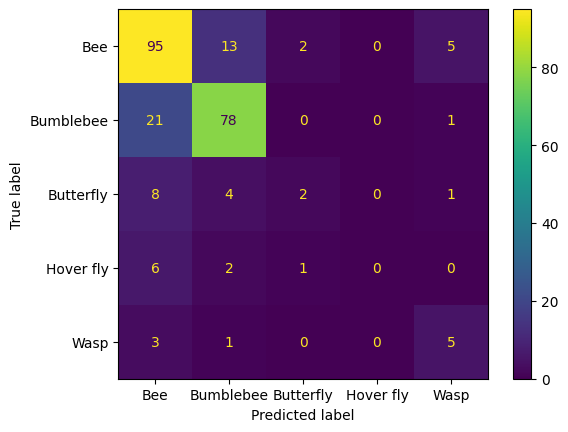

In [49]:
# Decision Tree on unscaled data and with dimensionality reduction
dt = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('model', DecisionTreeClassifier())
])
best_params = optimize_classifier(X, dt, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(dt, X, y)

Search space: {'model__solver': <hyperopt.pyll.base.Apply object at 0x0000027151AE3B10>, 'model__shrinkage': <hyperopt.pyll.base.Apply object at 0x0000027151C29850>}
  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 200/200 [00:13<00:00, 15.37trial/s, best loss: -0.8346774193548387]
Best hyperparameters: {'model__shrinkage': 0.010101010101010102, 'model__solver': 'lsqr'}
Accuracy: 0.8346774193548387
Precision: 0.8338141392887969
Recall: 0.8346774193548387
F1 Score: 0.8307159585357486
              precision    recall  f1-score   support

         Bee       0.85      0.87      0.86       115
   Bumblebee       0.85      0.90      0.87       100
   Butterfly       0.89      0.53      0.67        15
   Hover fly       0.38      0.33      0.35         9
        Wasp       0.86      0.67      0.75         9

    accuracy                           0.83       248
   macro avg       0.76      0.66      0.70       248
weighted avg       0.83      0.83      0.83       248



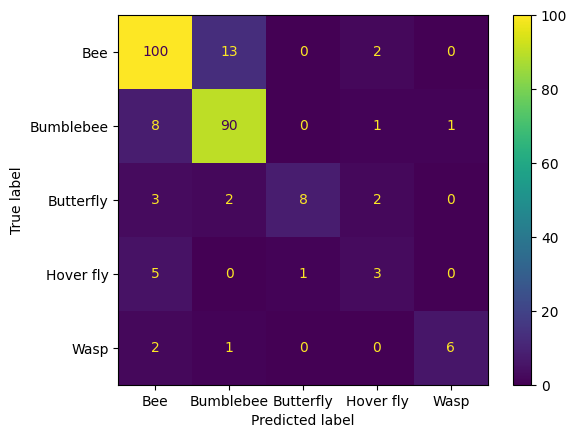

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# LDA on scaled data
lda = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', LinearDiscriminantAnalysis())
])
search_space = {
    'solver': hp.choice('solver', [ 'lsqr']),
    'shrinkage': hp.choice('shrinkage', ['auto', None] + list(np.linspace(0, 1, 100))),
}
best_params = optimize_classifier(X, lda, search_space, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

Search space: {'model__solver': <hyperopt.pyll.base.Apply object at 0x0000027151AE3B10>, 'model__shrinkage': <hyperopt.pyll.base.Apply object at 0x0000027151C29850>}
  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 200/200 [00:14<00:00, 14.15trial/s, best loss: -0.8548387096774194]
Best hyperparameters: {'model__shrinkage': 0.7171717171717172, 'model__solver': 'lsqr'}
Accuracy: 0.8548387096774194
Precision: 0.8578114440032032
Recall: 0.8548387096774194
F1 Score: 0.8540696687232612
              precision    recall  f1-score   support

         Bee       0.83      0.92      0.88       115
   Bumblebee       0.93      0.86      0.90       100
   Butterfly       0.92      0.80      0.86        15
   Hover fly       0.33      0.33      0.33         9
        Wasp       0.71      0.56      0.63         9

    accuracy                           0.85       248
   macro avg       0.75      0.69      0.72       248
weighted avg       0.86      0.85      0.85       248



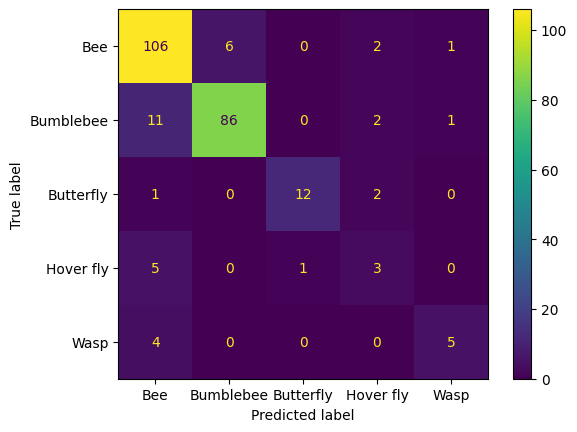

In [52]:
# LDA on scaled data and with dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
lda = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', LinearDiscriminantAnalysis())
])
best_params = optimize_classifier(X, lda, search_space, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

Search space: {'model__solver': <hyperopt.pyll.base.Apply object at 0x0000027151AE3B10>, 'model__shrinkage': <hyperopt.pyll.base.Apply object at 0x0000027151C29850>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DB5A9D0>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DB5B950>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DB59AD0>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6850>}
  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 200/200 [00:24<00:00,  8.08trial/s, best loss: -0.8548387096774194]
Best hyperparameters: {'model__shrinkage': 0.6161616161616162, 'model__solver': 'lsqr', 'smote__k_neighbors': 4, 'smote__strategy__2': 23, 'smote__strategy__3': 17, 'smote__strategy__4': 16}
Accuracy: 0.8548387096774194
Precision: 0.8576187298422172
Recall: 0.8548387096774194
F1 Score: 0.8548652719870762
              precision    recall  f1-score   support

         Bee       0.85      0.90      0.87       115
   Bumblebee       0.92      0.87      0.89       100
   Butterfly       0.92      0.80      0.86        15
   Hover fly       0.40      0.44      0.42         9
        Wasp       0.71      0.56      0.63         9

    accuracy                           0.85       248
   macro avg       0.76      0.71      0.73       248
weighted avg       0.86      0.85      0.85       248



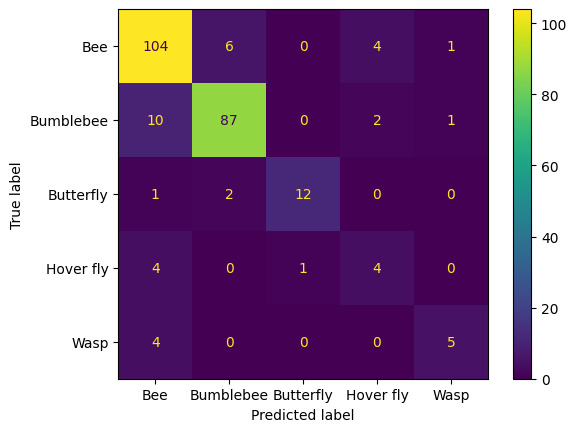

In [54]:
# LDA on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
lda = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LinearDiscriminantAnalysis())
])
best_params = optimize_classifier(X, lda, search_space, smote_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

Search space: {'model__solver': <hyperopt.pyll.base.Apply object at 0x000001D22D4E92D0>, 'model__shrinkage': <hyperopt.pyll.base.Apply object at 0x000001D2280BC810>, 'smote__strategy__Butterfly': <hyperopt.pyll.base.Apply object at 0x000001D22A500210>, 'smote__strategy__Hover fly': <hyperopt.pyll.base.Apply object at 0x000001D22A5018D0>, 'smote__strategy__Wasp': <hyperopt.pyll.base.Apply object at 0x000001D2280BDD50>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000001D22A4E7C90>}
smote
100%|██████████| 200/200 [00:10<00:00, 19.51trial/s, best loss: -0.8271889400921659]
Best hyperparameters: {'model__shrinkage': 0.020202020202020204, 'model__solver': 'lsqr', 'smote__k_neighbors': 4, 'smote__strategy__Butterfly': 45, 'smote__strategy__Hover fly': 19, 'smote__strategy__Wasp': 21}
Accuracy: 0.8273092369477911
Precision: 0.8212503729019897
Recall: 0.8273092369477911
F1 Score: 0.8202144588468165
              precision    recall  f1-score   support

         Bee       0.84   

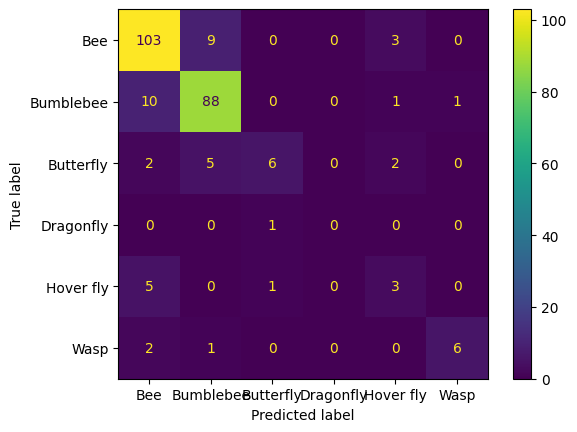

In [69]:
# LDA on scaled data with SMOTE
lda = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LinearDiscriminantAnalysis())
])
best_params = optimize_classifier(X, lda, search_space, smote_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

Search space: {'model__solver': <hyperopt.pyll.base.Apply object at 0x000001D22D4E92D0>, 'model__shrinkage': <hyperopt.pyll.base.Apply object at 0x000001D2280BC810>, 'adasyn__strategy__Butterfly': <hyperopt.pyll.base.Apply object at 0x000001D22A501650>, 'adasyn__strategy__Hover fly': <hyperopt.pyll.base.Apply object at 0x000001D22A503110>, 'adasyn__strategy__Wasp': <hyperopt.pyll.base.Apply object at 0x000001D228075050>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000001D228132F50>}
adasyn
100%|██████████| 200/200 [00:08<00:00, 22.65trial/s, best loss: -0.8272529441884281]
Best hyperparameters: {'adasyn__n_neighbors': 3, 'adasyn__strategy__Butterfly': 32, 'adasyn__strategy__Hover fly': 18, 'adasyn__strategy__Wasp': 22, 'model__shrinkage': 0.020202020202020204, 'model__solver': 'lsqr'}
Accuracy: 0.8273092369477911
Precision: 0.8225020207569498
Recall: 0.8273092369477911
F1 Score: 0.8217512234676266
              precision    recall  f1-score   support

         Bee     

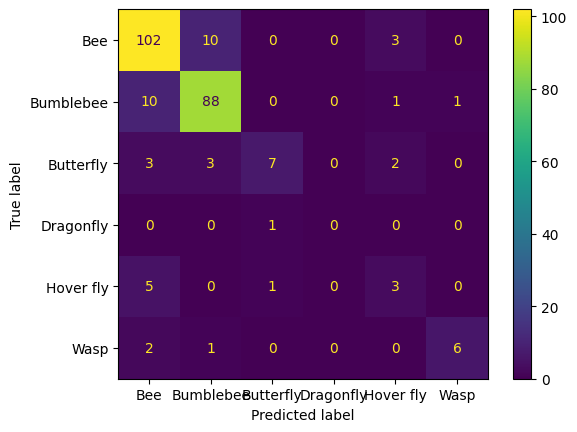

In [70]:
# LDA on scaled data with ADASYN
lda = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', LinearDiscriminantAnalysis())
])
best_params = optimize_classifier(X, lda, search_space, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

Search space: {'model__solver': <hyperopt.pyll.base.Apply object at 0x0000027151AE3B10>, 'model__shrinkage': <hyperopt.pyll.base.Apply object at 0x0000027151C29850>, 'adasyn__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DC476D0>, 'adasyn__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DC525D0>, 'adasyn__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DBAEA10>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6B50>}
100%|██████████| 200/200 [00:17<00:00, 11.62trial/s, best loss: -0.8508064516129032]
Best hyperparameters: {'adasyn__n_neighbors': 3, 'adasyn__strategy__2': 23, 'adasyn__strategy__3': 14, 'adasyn__strategy__4': 18, 'model__shrinkage': 0.6060606060606061, 'model__solver': 'lsqr'}
Accuracy: 0.8508064516129032
Precision: 0.8607503769604091
Recall: 0.8508064516129032
F1 Score: 0.8540730135683677
              precision    recall  f1-score   support

         Bee       0.86      0.90      0.88       115
   Bumbleb

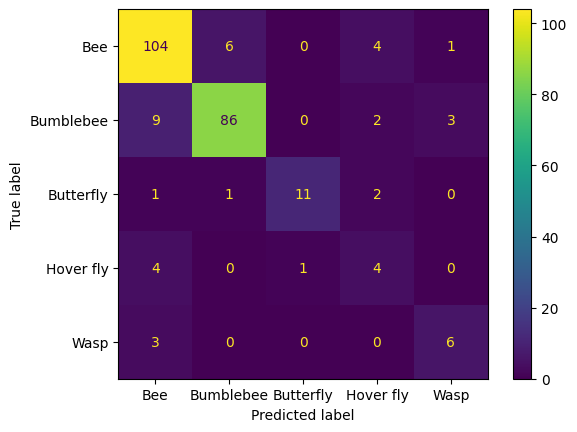

In [56]:
# LDA on scaled data with ADASYN and dimensionality reduction
lda = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', LinearDiscriminantAnalysis())
])
best_params = optimize_classifier(X, lda, search_space, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

Search space: {'model__solver': <hyperopt.pyll.base.Apply object at 0x000001D22D4E92D0>, 'model__shrinkage': <hyperopt.pyll.base.Apply object at 0x000001D2280BC810>}
None
100%|██████████| 200/200 [00:06<00:00, 31.54trial/s, best loss: -0.8270609318996416]
Best hyperparameters: {'model__shrinkage': 'auto', 'model__solver': 'lsqr'}
Accuracy: 0.8273092369477911
Precision: 0.8166853460353041
Recall: 0.8273092369477911
F1 Score: 0.8152995898403759
              precision    recall  f1-score   support

         Bee       0.81      0.91      0.86       115
   Bumblebee       0.86      0.86      0.86       100
   Butterfly       0.83      0.67      0.74        15
   Dragonfly       0.00      0.00      0.00         1
   Hover fly       0.25      0.11      0.15         9
        Wasp       1.00      0.44      0.62         9

    accuracy                           0.83       249
   macro avg       0.63      0.50      0.54       249
weighted avg       0.82      0.83      0.82       249



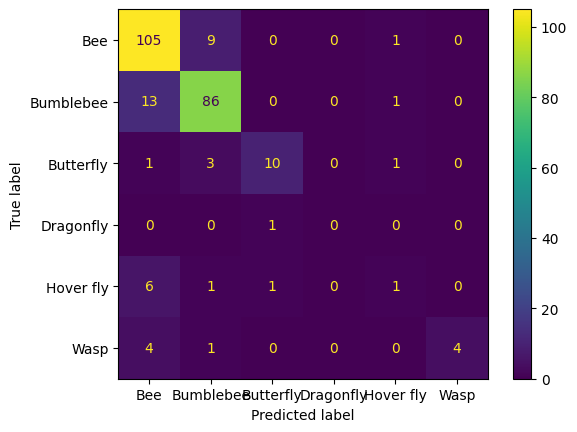

In [68]:
# LDA on unscaled data
lda = imbPipeline([
    ('model', LinearDiscriminantAnalysis())
])
best_params = optimize_classifier(X, lda, search_space, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

Search space: {'model__n_restarts_optimizer': <hyperopt.pyll.base.Apply object at 0x000001576337F350>, 'model__max_iter_predict': <hyperopt.pyll.base.Apply object at 0x000001576337F550>, 'model__optimizer': <hyperopt.pyll.base.Apply object at 0x000001576337E550>, 'model__multi_class': <hyperopt.pyll.base.Apply object at 0x000001576337CFD0>}
100%|██████████| 100/100 [00:28<00:00,  3.47trial/s, best loss: -0.814516129032258]
Best hyperparameters: {'model__max_iter_predict': 438, 'model__multi_class': 'one_vs_one', 'model__n_restarts_optimizer': 714, 'model__optimizer': <function fmin_cg at 0x0000015757CA5800>}
Accuracy: 0.8145161290322581
Precision: 0.8290905017921147
Recall: 0.8145161290322581
F1 Score: 0.8166775305198481
              precision    recall  f1-score   support

         Bee       0.81      0.88      0.84       115
   Bumblebee       0.91      0.82      0.86       100
   Butterfly       0.89      0.53      0.67        15
   Hover fly       0.25      0.33      0.29         

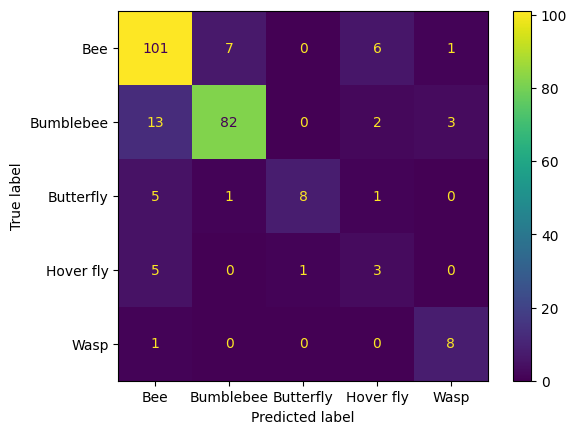

In [31]:
# Gaussian Process on scaled data
from sklearn.gaussian_process import GaussianProcessClassifier
from scipy.optimize import fmin_tnc, fmin_cg, fmin_cobyla, fmin_l_bfgs_b, fmin_slsqp, fmin_powell, fmin_ncg

gp = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', GaussianProcessClassifier())
])
search_space = {
    'n_restarts_optimizer': hp.uniformint('n_restarts_optimizer', 0, 1000),
    'max_iter_predict': hp.uniformint('max_iter_predict', 10, 1000),
    'optimizer': hp.choice('optimizer', [fmin_tnc, fmin_cg, fmin_cobyla, fmin_l_bfgs_b, fmin_slsqp, fmin_powell, fmin_ncg]),
    'multi_class': hp.choice('multi_class', ['one_vs_rest', 'one_vs_one']),

}
best_params = optimize_classifier(X, gp, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(gp, X, y)

## Ensemble classification methods

Search space: {'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x0000027150EAFA50>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x0000027150EAF790>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x0000027150EAC2D0>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x000002715133E810>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x000002715133C210>}
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:43<00:00,  2.31trial/s, best loss: -0.8024193548387097]
Best hyperparameters: {'model__max_depth': None, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__min_samples_split': 0.10516612722971552, 'model__n_estimators': 250}
Accuracy: 0.8024193548387096
Precision: 0.7508944908138456
Recall: 0.8024193548387096
F1 Score: 0.7655406762674157
              precision    recall  f1-score   support

         Bee       0.76      0.94      0.84       115
   Bumblebee       0.87      0.86      0.86       100
   Butterfly       0.83      0.33      0.48        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.00      0.00      0.00         9

    accuracy                           0.80       248
   macro avg       0.49      0.43      0.44       248
weighted avg       0.75      0.80      0.77       248



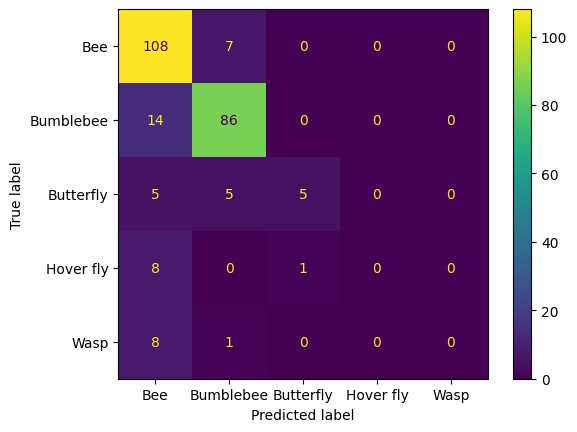

In [62]:
# Extra Trees on scaled data
et = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', ExtraTreesClassifier())
])
search_space2 = {
    'n_estimators': hp.uniformint('n_estimators', 10, 250),
    'max_depth': hp.uniformint('max_depth', 1, 40),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.uniformint('min_samples_leaf', 1, 15),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
}
search_space = {
    'n_estimators': hp.choice('n_estimators', [10,50, 100, 150, 200, 250]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30, 40]),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4, 8, 16, 32]),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
}

best_params = optimize_classifier(X, et, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

Search space: {'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x0000027150EAFA50>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x0000027150EAF790>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x0000027150EAC2D0>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x000002715133E810>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x000002715133C210>}
100%|██████████| 100/100 [00:37<00:00,  2.66trial/s, best loss: -0.8024193548387097]
Best hyperparameters: {'model__max_depth': 20, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__min_samples_split': 0.1255608638028607, 'model__n_estimators': 200}
Accuracy: 0.8024193548387096
Precision: 0.7529677775666302
Recall: 0.8024193548387096
F1 Score: 0.7676756868258424
              precision    recall  f1-score   support

         Bee       0.75      0.94      0.83       115
   Bumblebee       0.88      0.85      0.86       100
   Butterfly       0.86      0.4

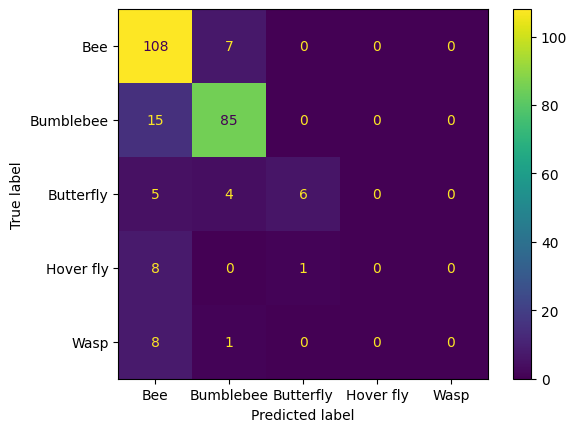

In [63]:
# Extra Trees on unscaled data
et = imbPipeline([
    ('model', ExtraTreesClassifier())
])
best_params = optimize_classifier(X, et, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

In [84]:
# Extra Trees on scaled data with SMOTE
et = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', ExtraTreesClassifier())
])
best_params = optimize_classifier(X, et, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')

Search space: {'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x000001D22D4AC650>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000001D22D4AC910>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x000001D22D4AE710>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x000001D22D393150>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x000001D22D393C90>, 'smote__strategy__Butterfly': <hyperopt.pyll.base.Apply object at 0x000001D22A500210>, 'smote__strategy__Hover fly': <hyperopt.pyll.base.Apply object at 0x000001D22A5018D0>, 'smote__strategy__Wasp': <hyperopt.pyll.base.Apply object at 0x000001D2280BDD50>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000001D22A4E7C90>}
smote
100%|██████████| 100/100 [00:35<00:00,  2.85trial/s, best loss: -0.8110599078341014]
Best hyperparameters: {'model__max_depth': 30, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__min_samples_split': 0.131237804011282

Search space: {'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x0000027150EAFA50>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x0000027150EAF790>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x0000027150EAC2D0>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x000002715133E810>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x000002715133C210>, 'adasyn__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DC476D0>, 'adasyn__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DC525D0>, 'adasyn__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DBAEA10>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6B50>}
100%|██████████| 100/100 [00:57<00:00,  1.74trial/s, best loss: -0.8064516129032258]
Best hyperparameters: {'adasyn__n_neighbors': 3, 'adasyn__strategy__2': 35, 'adasyn__strategy__3': 21, 'adasyn__strategy__4': 27, 'model__max_depth': 10, 'model__max_features

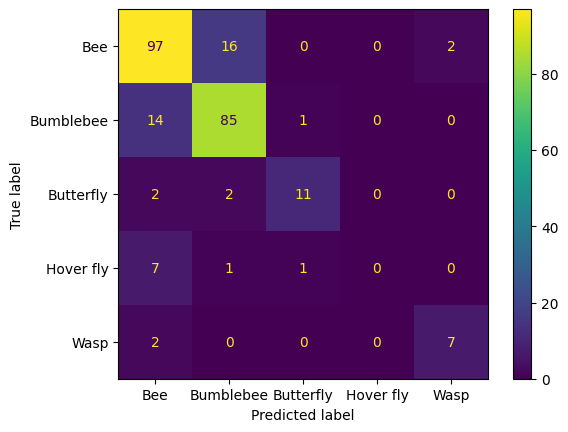

In [65]:
# Extra Trees on scaled data with ADASYN
et = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
best_params = optimize_classifier(X, et, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

Search space: {'adasyn__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DC476D0>, 'adasyn__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DC525D0>, 'adasyn__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DBAEA10>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6B50>}
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [01:01<00:00,  1.62trial/s, best loss: -0.8387096774193549]
Best hyperparameters: {'adasyn__n_neighbors': 3, 'adasyn__strategy__2': 36, 'adasyn__strategy__3': 27, 'adasyn__strategy__4': 17}
Accuracy: 0.8387096774193549
Precision: 0.8144927798340668
Recall: 0.8387096774193549
F1 Score: 0.8222793893318435
              precision    recall  f1-score   support

         Bee       0.80      0.91      0.85       115
   Bumblebee       0.89      0.86      0.87       100
   Butterfly       0.86      0.80      0.83        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       1.00      0.56      0.71         9

    accuracy                           0.84       248
   macro avg       0.71      0.63      0.65       248
weighted avg       0.81      0.84      0.82       248



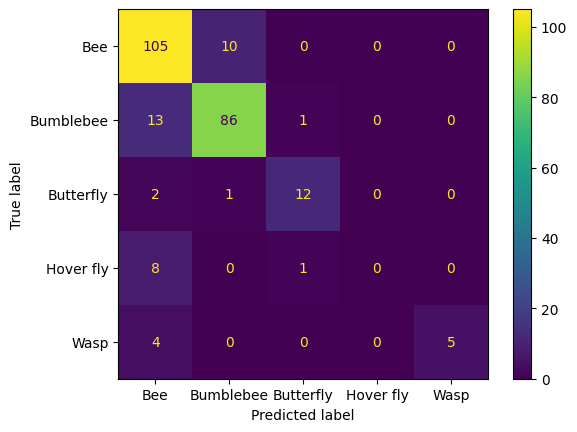

In [70]:
# Extra Trees on scaled data with ADASYN
et = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
et.set_params(**{'model__max_depth': 30, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 0.10291991900958453, 'model__n_estimators': 100})
best_params = optimize_classifier(X, et, {}, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

Search space: {'adasyn__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DC476D0>, 'adasyn__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DC525D0>, 'adasyn__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DBAEA10>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6B50>}
100%|██████████| 100/100 [00:29<00:00,  3.41trial/s, best loss: -0.8508064516129032]
Best hyperparameters: {'adasyn__n_neighbors': 5, 'adasyn__strategy__2': 24, 'adasyn__strategy__3': 14, 'adasyn__strategy__4': 22}
Accuracy: 0.8508064516129032
Precision: 0.8221547669056877
Recall: 0.8508064516129032
F1 Score: 0.8351285595549871
              precision    recall  f1-score   support

         Bee       0.82      0.90      0.86       115
   Bumblebee       0.88      0.88      0.88       100
   Butterfly       0.92      0.80      0.86        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.88      0.78      0.82         9

    accur

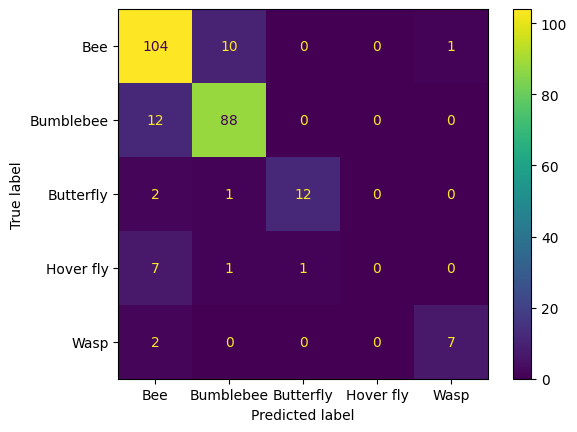

In [71]:
# Extra Trees on scaled data with ADASYN and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
et = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
et.set_params(**{'model__max_depth': 30, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 0.10291991900958453, 'model__n_estimators': 100})
best_params = optimize_classifier(X, et, {}, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

Search space: {'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x000001D22D4AC650>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000001D22D4AC910>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x000001D22D4AE710>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x000001D22D393150>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x000001D22D393C90>, 'adasyn__strategy__Butterfly': <hyperopt.pyll.base.Apply object at 0x000001D22A501650>, 'adasyn__strategy__Hover fly': <hyperopt.pyll.base.Apply object at 0x000001D22A503110>, 'adasyn__strategy__Wasp': <hyperopt.pyll.base.Apply object at 0x000001D228075050>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000001D228132F50>}
adasyn
100%|██████████| 100/100 [00:36<00:00,  2.71trial/s, best loss: -0.8352534562211982]
Best hyperparameters: {'adasyn__n_neighbors': 5, 'adasyn__strategy__Butterfly': 40, 'adasyn__strategy__Hover fly': 27, 'adasyn__strategy__Wasp': 26,

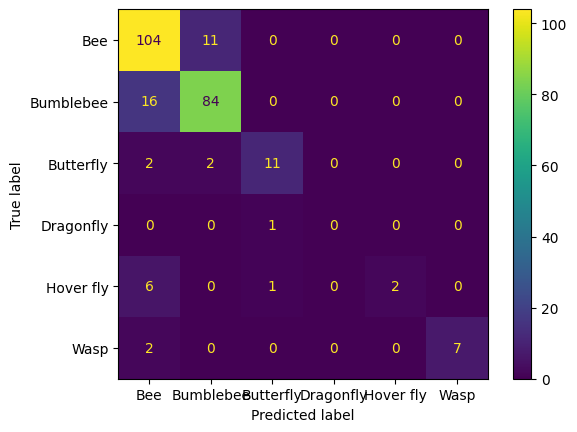

In [85]:
# Extra Trees on scaled data with ADASYN
et = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
best_params = optimize_classifier(X, et, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

Search space: {'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x0000027151A13390>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x0000027151C68E10>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x00000271512E1C90>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x00000271512E2F10>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x0000027151C64D90>, 'adasyn__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DC476D0>, 'adasyn__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DC525D0>, 'adasyn__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DBAEA10>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6B50>}
100%|██████████| 100/100 [00:28<00:00,  3.45trial/s, best loss: -0.7943548387096775]
Best hyperparameters: {'adasyn__n_neighbors': 5, 'adasyn__strategy__2': 27, 'adasyn__strategy__3': 13, 'adasyn__strategy__4': 26, 'model__max_depth': None, 'model__max_featur

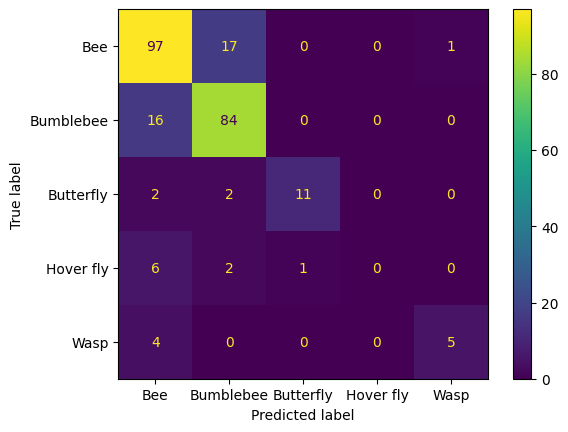

In [61]:
# Extra Trees on scaled data with ADASYN
et = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
best_params = optimize_classifier(X, et, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

Search space: {'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x0000027151A13390>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x0000027151C68E10>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x00000271512E1C90>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x00000271512E2F10>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x0000027151C64D90>, 'adasyn__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002714DC476D0>, 'adasyn__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002714DC525D0>, 'adasyn__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002714DBAEA10>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000002714A7E6B50>}
100%|██████████| 100/100 [00:41<00:00,  2.41trial/s, best loss: -0.7943548387096775]
Best hyperparameters: {'adasyn__n_neighbors': 3, 'adasyn__strategy__2': 27, 'adasyn__strategy__3': 24, 'adasyn__strategy__4': 25, 'model__max_depth': 40, 'model__max_features

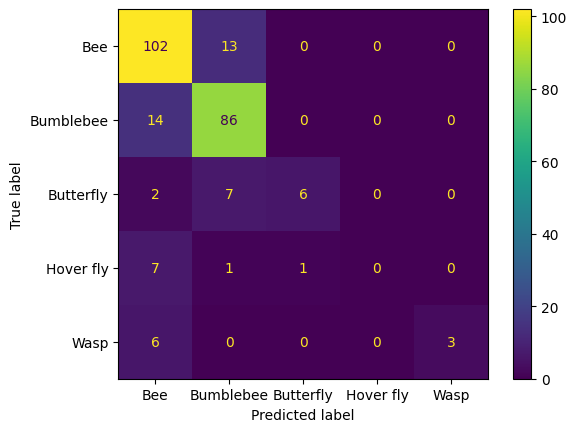

In [60]:
# Extra Trees on scaled data with adasyn and dimensionality reduction 
et = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
best_params = optimize_classifier(X, et, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

Search space: {'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x000002AFF1BE1690>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000002AFF1BE0E10>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x000002AFF1BE1E10>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x000002AFF1BE2910>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x000002AFF1A00A50>}
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [01:06<00:00,  1.51trial/s, best loss: -0.782258064516129]
Best hyperparameters: {'model__max_depth': None, 'model__max_features': 'auto', 'model__min_samples_leaf': 2, 'model__min_samples_split': 0.10228739975249294, 'model__n_estimators': 250}
Accuracy: 0.782258064516129
Precision: 0.728197052372546
Recall: 0.782258064516129
F1 Score: 0.7460224627684792
              precision    recall  f1-score   support

         Bee       0.76      0.89      0.82       115
   Bumblebee       0.81      0.87      0.84       100
   Butterfly       0.83      0.33      0.48        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.00      0.00      0.00         9

    accuracy                           0.78       248
   macro avg       0.48      0.42      0.43       248
weighted avg       0.73      0.78      0.75       248



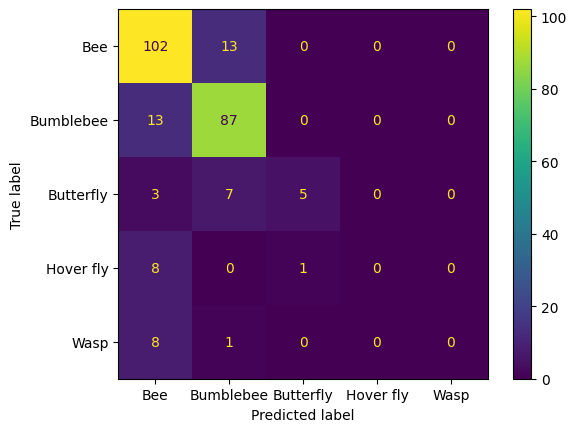

In [31]:
# Random Forest on scaled data
rf = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])
search_space = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 150, 200, 250]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30, 40]),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4, 8, 16, 32]),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
}
best_params = optimize_classifier(X, rf, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(rf, X, y)

In [ ]:
# Random Forest on scaled data with SMOTE
rf = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', RandomForestClassifier())
])
best_params = optimize_classifier(X, rf, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(rf, X, y)

In [ ]:
# Random Forest on scaled data with ADASYN
rf = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', RandomForestClassifier())
])
best_params = optimize_classifier(X, rf, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(rf, X, y)

Search space: {'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x000001D22D25F790>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000001D22E645710>, 'model__min_samples_split': <hyperopt.pyll.base.Apply object at 0x000001D22E647610>, 'model__min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x000001D22E5F4690>, 'model__max_features': <hyperopt.pyll.base.Apply object at 0x000001D22EAF7E50>}
None
100%|██████████| 100/100 [01:07<00:00,  1.49trial/s, best loss: -0.7830261136712748]
Best hyperparameters: {'model__max_depth': 19, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 0.11644597492957022, 'model__n_estimators': 200}
Accuracy: 0.7831325301204819
Precision: 0.7257511491948899
Recall: 0.7831325301204819
F1 Score: 0.7451285458176687
              precision    recall  f1-score   support

         Bee       0.77      0.90      0.83       115
   Bumblebee       0.80      0.87      0.83       100
   Butterfly       0.83   

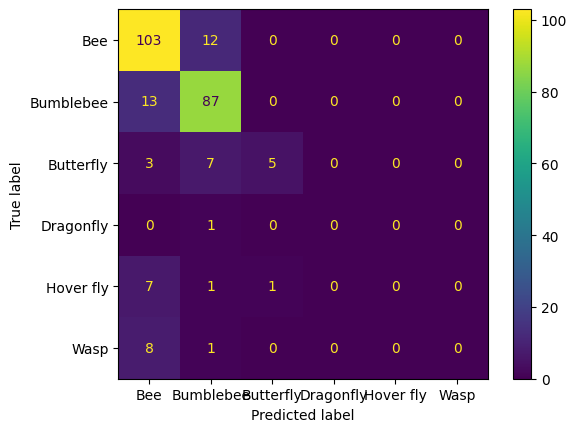

In [87]:
# Random Forest on unscaled data
rf = imbPipeline([
    ('model', RandomForestClassifier())
])
best_params = optimize_classifier(X, rf, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(rf, X, y)

In [ ]:
# Random Forest on unscaled data with SMOTE
rf = imbPipeline([
    ('smote', smote),
    ('model', RandomForestClassifier())
])
best_params = optimize_classifier(X, rf, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(rf, X, y)

In [ ]:
# Random Forest on unscaled data with ADASYN
rf = imbPipeline([
    ('adasyn', adasyn),
    ('model', RandomForestClassifier())
])
best_params = optimize_classifier(X, rf, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(rf, X, y)

Search space: {'model__num_leaves': <hyperopt.pyll.base.Apply object at 0x0000027150EBEAD0>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x0000027151993A50>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x0000027151D42D90>, 'model__min_child_samples': <hyperopt.pyll.base.Apply object at 0x0000027150F1F7D0>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x00000271517404D0>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x0000027151AD8650>}
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [02:09<00:00,  1.29s/trial, best loss: -0.8548387096774194]
Best hyperparameters: {'model__colsample_bytree': 0.7220016015527594, 'model__learning_rate': 0.1703239621914289, 'model__max_depth': -1, 'model__min_child_samples': 20, 'model__num_leaves': 50, 'model__subsample': 0.6019501828269759}
Accuracy: 0.8548387096774194
Precision: 0.8297992282298903
Recall: 0.8548387096774194
F1 Score: 0.8361031168272499
              precision    recall  f1-score   support

         Bee       0.82      0.93      0.87       115
   Bumblebee       0.89      0.90      0.90       100
   Butterfly       0.92      0.73      0.81        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       1.00      0.44      0.62         9

    accuracy                           0.85       248
   macro avg       0.72      0.60      0.64       248
weighted avg       0.83      0.85      0.84       248



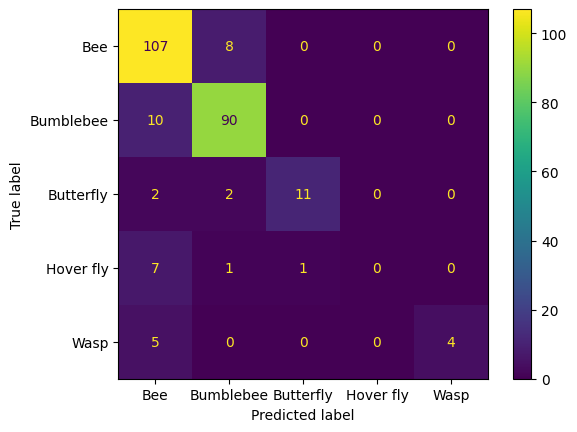

In [72]:
# LGBM on scaled data
lgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', LGBMClassifier())
])
search_space = {
    'num_leaves': hp.choice('num_leaves', [10, 20, 30, 40, 50]),
    'max_depth': hp.choice('max_depth', [5, 10, 15, -1]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'min_child_samples': hp.choice('min_child_samples', [5, 10, 20, 30]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
best_params = optimize_classifier(X, lgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

Search space: {'model__num_leaves': <hyperopt.pyll.base.Apply object at 0x000002AFF1A92A10>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000002AFF1BEAB10>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000002AFF1BE8250>, 'model__min_child_samples': <hyperopt.pyll.base.Apply object at 0x000002AFF1A3D390>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000002AFEB23E110>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000002AFEB23E190>}
100%|██████████| 100/100 [01:41<00:00,  1.01s/trial, best loss: -0.8709677419354839]
Best hyperparameters: {'model__colsample_bytree': 0.7769807826656897, 'model__learning_rate': 0.18943969252414108, 'model__max_depth': -1, 'model__min_child_samples': 20, 'model__num_leaves': 30, 'model__subsample': 0.986426388689724}
Accuracy: 0.8709677419354839
Precision: 0.8441560592554955
Recall: 0.8709677419354839
F1 Score: 0.8509236671480435
              precision    recall  f1-score   support

         Bee 

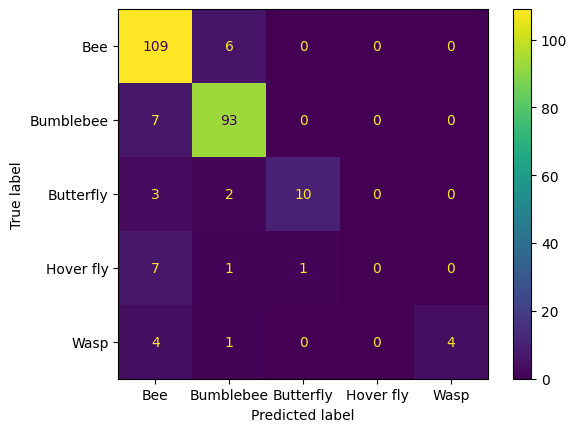

In [36]:
# LGBM on scaled data with dimensionality reduction
lgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', LGBMClassifier())
])
search_space = {
    'num_leaves': hp.choice('num_leaves', [10, 20, 30, 40, 50]),
    'max_depth': hp.choice('max_depth', [5, 10, 15, -1]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'min_child_samples': hp.choice('min_child_samples', [5, 10, 20, 30]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
best_params = optimize_classifier(X, lgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

Search space: {'model__num_leaves': <hyperopt.pyll.base.Apply object at 0x000002AFF1B1CF50>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000002AFF1CEA010>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000002AFF1CEA250>, 'model__min_child_samples': <hyperopt.pyll.base.Apply object at 0x000002AFF1B59D10>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000002AFF1D3F910>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000002AFF1D3C990>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BD810>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BD010>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BDC50>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BE690>}
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [02:18<00:00,  1.39s/trial, best loss: -0.842741935483871]
Best hyperparameters: {'model__colsample_bytree': 0.5104033736275799, 'model__learning_rate': 0.045943449778688736, 'model__max_depth': 5, 'model__min_child_samples': 5, 'model__num_leaves': 50, 'model__subsample': 0.7491061184252206, 'smote__k_neighbors': 4, 'smote__strategy__2': 28, 'smote__strategy__3': 26, 'smote__strategy__4': 26}
Accuracy: 0.842741935483871
Precision: 0.819478386010644
Recall: 0.842741935483871
F1 Score: 0.822805030113346
              precision    recall  f1-score   support

         Bee       0.81      0.95      0.87       115
   Bumblebee       0.88      0.87      0.87       100
   Butterfly       0.90      0.60      0.72        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       1.00      0.44      0.62         9

    accuracy                           0.84       248
   macro avg       0.72      0.57      0.62       248
weighted avg       0.82      0.84

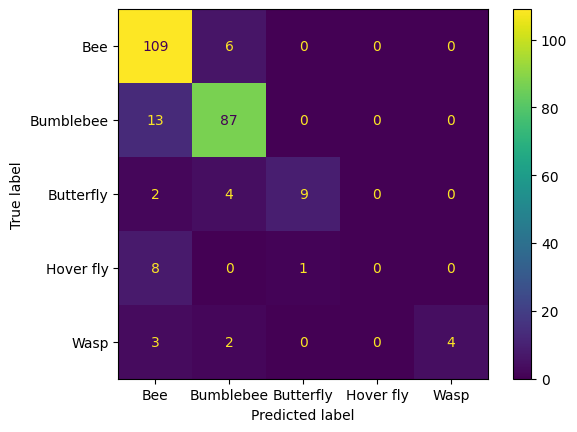

In [34]:
# LGBM on scaled data with SMOTE
lgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LGBMClassifier())
])
best_params = optimize_classifier(X, lgb, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

Search space: {'model__num_leaves': <hyperopt.pyll.base.Apply object at 0x000002AFF1B1CF50>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000002AFF1CEA010>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000002AFF1CEA250>, 'model__min_child_samples': <hyperopt.pyll.base.Apply object at 0x000002AFF1B59D10>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000002AFF1D3F910>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000002AFF1D3C990>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BD810>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BD010>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BDC50>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BE690>}
100%|██████████| 100/100 [01:03<00:00,  1.56trial/s, best loss: -0.8709677419354839]
Best hyperparameters: {'model__colsample_bytree': 0.5804789345543534, 'model__learning_rate': 0.133978

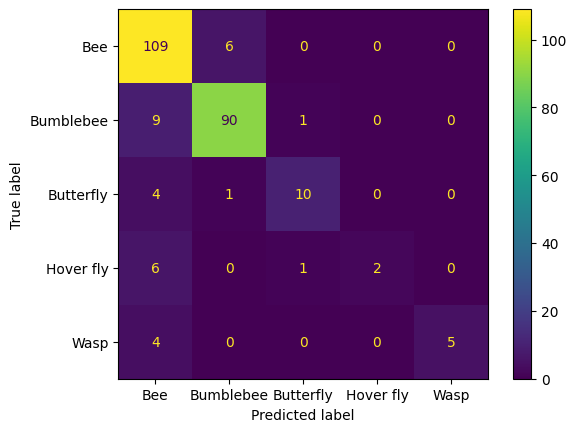

In [35]:
# LGBM on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
lgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LGBMClassifier())
])
best_params = optimize_classifier(X, lgb, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

In [ ]:
# LGBM on scaled data with ADASYN
lgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', LGBMClassifier())
])
best_params = optimize_classifier(X, lgb, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

Search space: {'model__num_leaves': <hyperopt.pyll.base.Apply object at 0x000001D22D389350>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000001D22E63C150>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000001D22E63F750>, 'model__min_child_samples': <hyperopt.pyll.base.Apply object at 0x000001D22A57C1D0>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000001D22E615250>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000001D22A5A4C10>}
None
100%|██████████| 20/20 [00:21<00:00,  1.07s/trial, best loss: -0.823284690220174]
Best hyperparameters: {'model__colsample_bytree': 0.8636674310757613, 'model__learning_rate': 0.15773038747252538, 'model__max_depth': 5, 'model__min_child_samples': 30, 'model__num_leaves': 30, 'model__subsample': 0.5786780036086977}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] T

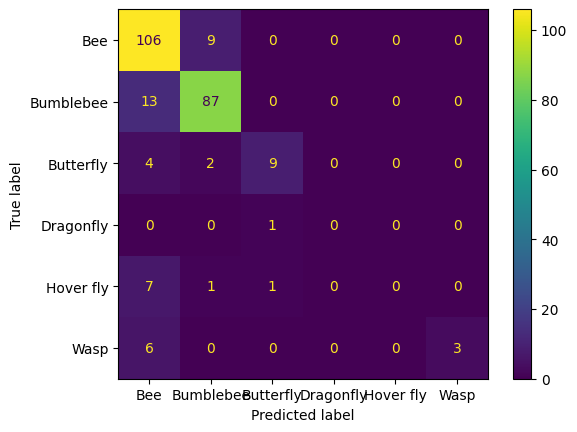

In [89]:
# LGBM on unscaled data
lgb = imbPipeline([
    ('model', LGBMClassifier())
])
best_params = optimize_classifier(X, lgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

Search space: {'model__num_leaves': <hyperopt.pyll.base.Apply object at 0x000002AFF1A92A10>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000002AFF1BEAB10>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000002AFF1BE8250>, 'model__min_child_samples': <hyperopt.pyll.base.Apply object at 0x000002AFF1A3D390>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000002AFEB23E110>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000002AFEB23E190>}
100%|██████████| 100/100 [01:27<00:00,  1.15trial/s, best loss: -0.8669354838709677]
Best hyperparameters: {'model__colsample_bytree': 0.5009046226651014, 'model__learning_rate': 0.1405903514701054, 'model__max_depth': 5, 'model__min_child_samples': 20, 'model__num_leaves': 40, 'model__subsample': 0.6358035207546828}
Accuracy: 0.8669354838709677
Precision: 0.8411229227761485
Recall: 0.8669354838709677
F1 Score: 0.8486492285303832
              precision    recall  f1-score   support

         Bee  

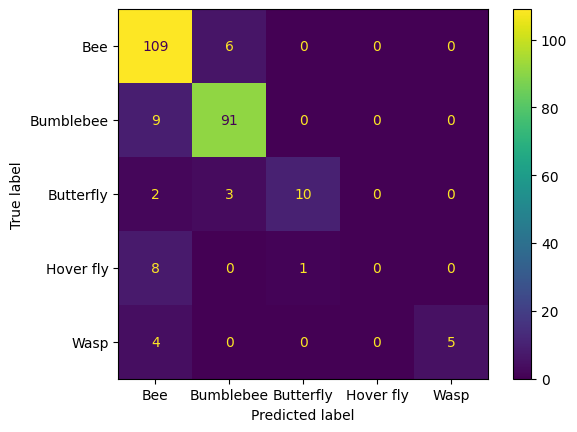

In [37]:
# LGBM on unscaled data with dimensionality reduction
lgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('model', LGBMClassifier())
])
best_params = optimize_classifier(X, lgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

Search space: {'model__num_leaves': <hyperopt.pyll.base.Apply object at 0x000002AFF1A92A10>, 'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000002AFF1BEAB10>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000002AFF1BE8250>, 'model__min_child_samples': <hyperopt.pyll.base.Apply object at 0x000002AFF1A3D390>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000002AFEB23E110>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000002AFEB23E190>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BD810>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BD010>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BDC50>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BE690>}
100%|██████████| 100/100 [00:52<00:00,  1.89trial/s, best loss: -0.8709677419354839]
Best hyperparameters: {'model__colsample_bytree': 0.7250986968814417, 'model__learning_rate': 0.136350

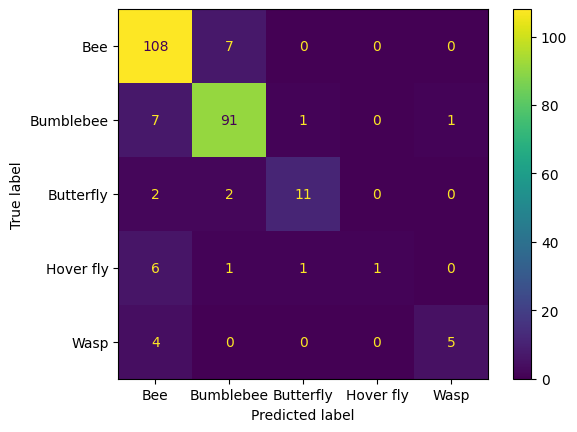

In [38]:
# LGBM on unscaled data with SMOTE and dimensionality reduction
lgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('smote', smote),
    ('model', LGBMClassifier())
])
best_params = optimize_classifier(X, lgb, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

#### XGBOOST

In [44]:
np.log(0.2)

-1.6094379124341003

Search space: {'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000002AFF1B57390>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000002AFF1B540D0>, 'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x000002AFF1B54290>, 'model__min_child_weight': <hyperopt.pyll.base.Apply object at 0x000002AFF1C9EC10>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000002AFF1C9FB50>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000002AFF1C9F150>}
100%|██████████| 100/100 [03:31<00:00,  2.11s/trial, best loss: -0.8548387096774194]
Best hyperparameters: {'model__colsample_bytree': 0.764780759463951, 'model__learning_rate': 0.034532769592492886, 'model__max_depth': 19, 'model__min_child_weight': 1, 'model__n_estimators': 202, 'model__subsample': 0.6450215729632425}
Accuracy: 0.8548387096774194
Precision: 0.8295762784021797
Recall: 0.8548387096774194
F1 Score: 0.8361689425133327
              precision    recall  f1-score   support

         B

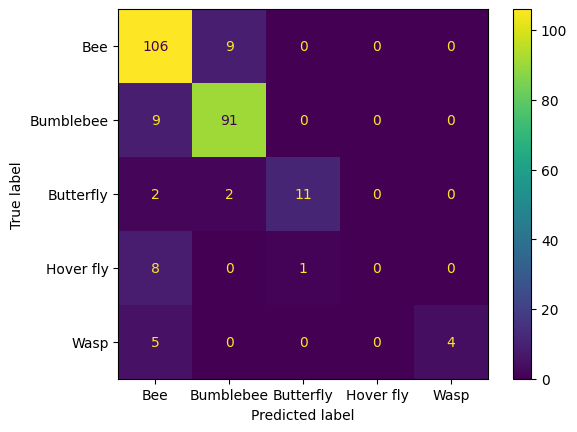

In [42]:
# XGB on scaled data
xgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier())
])
search_space = {
    'max_depth': hp.uniformint('max_depth', 1, 40),  # Maximum tree depth
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.uniformint('n_estimators', 10, 400),  # Number of trees
    'min_child_weight': hp.choice('min_child_weight', [1, 2, 3, 4, 5]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
best_params = optimize_classifier(X, xgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(xgb, X, y)

In [132]:
# XGBoost on scaled data with SMOTE
xgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', XGBClassifier())
])
best_params = optimize_classifier(X, xgb, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(xgb, X, y)

Search space: {'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000001D2303FBD50>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000001D2303F6050>, 'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x000001D2303C3AD0>, 'model__min_child_weight': <hyperopt.pyll.base.Apply object at 0x000001D2303C2450>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000001D2303C2CD0>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000001D2303C3090>, 'smote__strategy__Butterfly': <hyperopt.pyll.base.Apply object at 0x000001D2305B8ED0>, 'smote__strategy__Hover fly': <hyperopt.pyll.base.Apply object at 0x000001D2305B9F90>, 'smote__strategy__Wasp': <hyperopt.pyll.base.Apply object at 0x000001D2305BAA90>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000001D2305B8710>}
smote
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

job exception: 
All the 4 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 322, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:

  0%|          | 0/100 [00:02<?, ?trial/s, best loss=?]


ValueError: 
All the 4 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 322, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 258, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 1050, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **params.get("fit_resample", {}))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\base.py", line 208, in fit_resample
    return super().fit_resample(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\base.py", line 108, in fit_resample
    self.sampling_strategy_ = check_sampling_strategy(
                              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\utils\_validation.py", line 557, in check_sampling_strategy
    sorted(_sampling_strategy_dict(sampling_strategy, y, sampling_type).items())
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\utils\_validation.py", line 319, in _sampling_strategy_dict
    raise ValueError(
ValueError: The {'Butterfly', 'Hover fly', 'Wasp'} target class is/are not present in the data.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 322, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 258, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 1050, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **params.get("fit_resample", {}))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\base.py", line 208, in fit_resample
    return super().fit_resample(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\base.py", line 108, in fit_resample
    self.sampling_strategy_ = check_sampling_strategy(
                              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\utils\_validation.py", line 557, in check_sampling_strategy
    sorted(_sampling_strategy_dict(sampling_strategy, y, sampling_type).items())
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\utils\_validation.py", line 319, in _sampling_strategy_dict
    raise ValueError(
ValueError: The {'Butterfly', 'Wasp', 'Hover fly'} target class is/are not present in the data.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 322, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 258, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 1050, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **params.get("fit_resample", {}))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\base.py", line 208, in fit_resample
    return super().fit_resample(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\base.py", line 108, in fit_resample
    self.sampling_strategy_ = check_sampling_strategy(
                              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\utils\_validation.py", line 557, in check_sampling_strategy
    sorted(_sampling_strategy_dict(sampling_strategy, y, sampling_type).items())
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\utils\_validation.py", line 319, in _sampling_strategy_dict
    raise ValueError(
ValueError: The {'Hover fly', 'Wasp', 'Butterfly'} target class is/are not present in the data.


Search space: {'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000002AFF1B57390>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000002AFF1B540D0>, 'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x000002AFF1B54290>, 'model__min_child_weight': <hyperopt.pyll.base.Apply object at 0x000002AFF1C9EC10>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000002AFF1C9FB50>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000002AFF1C9F150>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BD810>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BD010>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BDC50>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BE690>}
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [01:00<00:00,  1.21s/trial, best loss: -0.8669354838709677]
Best hyperparameters: {'model__colsample_bytree': 0.7867391714660827, 'model__learning_rate': 0.15063415599840352, 'model__max_depth': 9, 'model__min_child_weight': 4, 'model__n_estimators': 178, 'model__subsample': 0.7774428991822808, 'smote__k_neighbors': 3, 'smote__strategy__2': 23, 'smote__strategy__3': 17, 'smote__strategy__4': 25}
Accuracy: 0.8669354838709677
Precision: 0.8621144127409548
Recall: 0.8669354838709677
F1 Score: 0.8596268338371343
              precision    recall  f1-score   support

         Bee       0.84      0.94      0.89       115
   Bumblebee       0.92      0.89      0.90       100
   Butterfly       0.82      0.60      0.69        15
   Hover fly       0.50      0.22      0.31         9
        Wasp       1.00      0.78      0.88         9

    accuracy                           0.87       248
   macro avg       0.81      0.69      0.73       248
weighted avg       0.86      

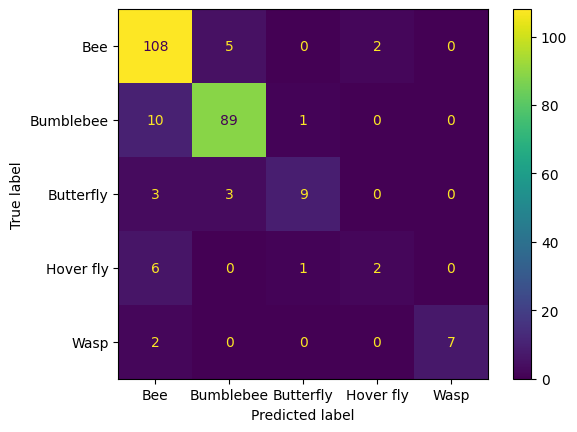

In [48]:
# XGBoost on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
xgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', XGBClassifier())
])
best_params = optimize_classifier(X, xgb, search_space, smote_sampling_strategy_space, max_evals=50, scoring='accuracy')
evaluate_classifier(xgb, X, y)

In [ ]:
# XGBoost on scaled data with ADASYN
xgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', XGBClassifier())
])
best_params = optimize_classifier(X, xgb, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(xgb, X, y)

Search space: {'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000002AFF1B57390>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000002AFF1B540D0>, 'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x000002AFF1B54290>, 'model__min_child_weight': <hyperopt.pyll.base.Apply object at 0x000002AFF1C9EC10>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000002AFF1C9FB50>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000002AFF1C9F150>}
100%|██████████| 100/100 [02:31<00:00,  1.51s/trial, best loss: -0.8508064516129032]
Best hyperparameters: {'model__colsample_bytree': 0.6163718419610837, 'model__learning_rate': 0.05556336325391143, 'model__max_depth': 15, 'model__min_child_weight': 1, 'model__n_estimators': 303, 'model__subsample': 0.547618152700397}
Accuracy: 0.8508064516129032
Precision: 0.8249651159492389
Recall: 0.8508064516129032
F1 Score: 0.8315150672874252
              precision    recall  f1-score   support

         Be

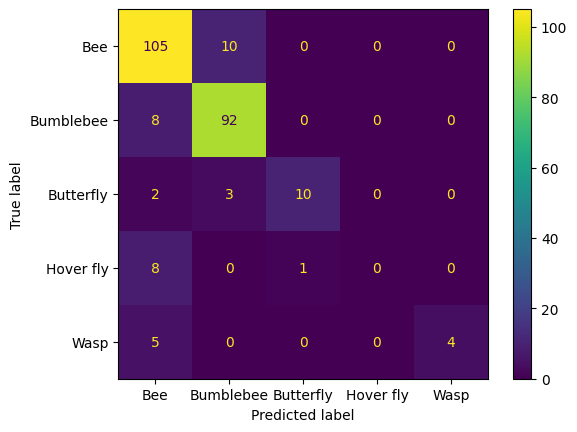

In [45]:
# XGBoost on unscaled data
xgb = imbPipeline([
    ('model', XGBClassifier())
])
best_params = optimize_classifier(X, xgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(xgb, X, y)

Search space: {'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000002AFF1B57390>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000002AFF1B540D0>, 'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x000002AFF1B54290>, 'model__min_child_weight': <hyperopt.pyll.base.Apply object at 0x000002AFF1C9EC10>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000002AFF1C9FB50>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000002AFF1C9F150>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BD810>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BD010>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BDC50>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002AFEE3BE690>}
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:53<00:00,  1.07s/trial, best loss: -0.8548387096774194]
Best hyperparameters: {'model__colsample_bytree': 0.6060071534666418, 'model__learning_rate': 0.023277296368282793, 'model__max_depth': 29, 'model__min_child_weight': 1, 'model__n_estimators': 167, 'model__subsample': 0.7558046308848534, 'smote__k_neighbors': 5, 'smote__strategy__2': 39, 'smote__strategy__3': 18, 'smote__strategy__4': 27}
Accuracy: 0.8548387096774194
Precision: 0.8275579637096774
Recall: 0.8548387096774194
F1 Score: 0.8377330223208359
              precision    recall  f1-score   support

         Bee       0.83      0.92      0.87       115
   Bumblebee       0.89      0.89      0.89       100
   Butterfly       0.80      0.80      0.80        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       1.00      0.56      0.71         9

    accuracy                           0.85       248
   macro avg       0.70      0.63      0.66       248
weighted avg       0.83    

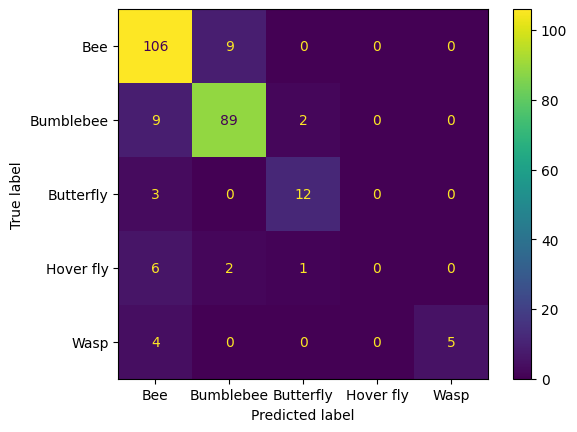

In [49]:
# XGBoost on unscaled data with SMOTE and dimensionality reduction
xgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('smote', smote),
    ('model', XGBClassifier())
])
best_params = optimize_classifier(X, xgb, search_space, smote_sampling_strategy_space, max_evals=50, scoring='accuracy')
evaluate_classifier(xgb, X, y)

Search space: {'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x000002AFF0FB63D0>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000002AFF1E3A6D0>}
100%|██████████| 30/30 [00:31<00:00,  1.06s/trial, best loss: -0.721774193548387] 
Best hyperparameters: {'model__learning_rate': 0.02041135358490401, 'model__n_estimators': 51}
Accuracy: 0.7217741935483871
Precision: 0.701406743599709
Recall: 0.7217741935483871
F1 Score: 0.6817741708061499
              precision    recall  f1-score   support

         Bee       0.67      0.97      0.79       115
   Bumblebee       0.82      0.64      0.72       100
   Butterfly       1.00      0.27      0.42        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.00      0.00      0.00         9

    accuracy                           0.72       248
   macro avg       0.50      0.37      0.39       248
weighted avg       0.70      0.72      0.68       248



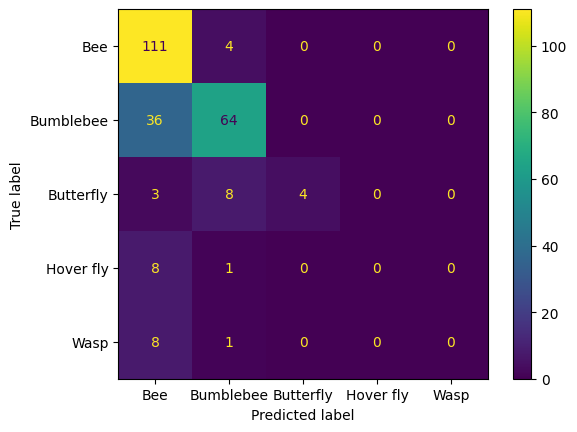

In [50]:
# AdaBoost on scaled data
ada = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', AdaBoostClassifier())
])
search_space = {
    'n_estimators': hp.uniformint('n_estimators', 10, 400),  # Number of trees
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.4)),
}
best_params = optimize_classifier(X, ada, search_space, {}, max_evals=30, scoring='accuracy')
evaluate_classifier(ada, X, y)

#### CatBoost

In [51]:
# Cat Boost on scaled data with smote and dimensionality reduction
cat = imbPipeline([
    
    ('scaler', StandardScaler()),
    ('model', CatBoostClassifier())
])
search_space = {
    'iterations': hp.choice('iterations', [50, 100, 150, 200, 250]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'depth': hp.choice('depth', [4, 6, 8, 10]),
}
best_params = optimize_classifier(X, cat, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(cat, X, y)

Search space: {'model__iterations': <hyperopt.pyll.base.Apply object at 0x000002AFF182A0D0>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000002AFF1829E90>, 'model__depth': <hyperopt.pyll.base.Apply object at 0x000002AFF1D66C10>}
  1%|          | 1/100 [00:50<1:22:55, 50.26s/trial, best loss: -0.8346774193548387]

In [174]:
# CatBoost on unscaled data
cat = imbPipeline([
    ('model', CatBoostClassifier())
])
search_space = {
    'iterations': hp.choice('iterations', [50, 100, 150, 200, 250]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'depth': hp.choice('depth', [4, 6, 8, 10]),
}
best_params = optimize_classifier(X, cat, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(cat, X, y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3
 0 3 0 4 4 4 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 1 1 3 1 1 0 0 3 3 1 1 1 4 0 0 1 0 0 1 0
 2 2 1 0 2 2 0 0 0 0 0 0 1 1 1 3 1 1 0 2 2 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 2
 2 1 1 1 0 1 0 0 0 2 0 2 2 2 4 4 4 4 0 0 0 0 0 0 0 0]
Search space: {'model__iterations': <hyperopt.pyll.base.Apply object at 0x000001D23DA4B110>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000001D23DA4A310>, 'model__depth': <hyperopt.pyll.base.Apply object at 0x000001D23DA4A690>}
None
  6%|▌         | 6/100 [01:39<21:43, 13.87s/trial, best loss: -0.7943548387096775]

## Supervised neural network algorithms using our own features

### Loading images and masks

### Creating the model

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.base import BaseEstimator, ClassifierMixin
from torch.optim import Adam
from sklearn.model_selection import cross_val_score

class DynamicNet(nn.Module):
    def __init__(self, input_size, num_classes, layers_sizes, dropout=0.001, activation=nn.ReLU()):
        super(DynamicNet, self).__init__()
        self.layers = nn.ModuleList()
        last_size = input_size
        self.activation = activation
        self.dropout = nn.Dropout(dropout)

        for size in layers_sizes:
            self.layers.append(nn.Linear(last_size, size))
            last_size = size

        self.output = nn.Linear(last_size, num_classes)

    def forward(self, x):
        for layer in self.layers:
            x = self.activation(layer(x))
        return self.output(x)

class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, num_classes, layers_sizes=[100, 50], epochs=10, learning_rate=1e-3):
        self.input_size = input_size
        self.num_classes = num_classes
        self.layers_sizes = layers_sizes
        self.epochs = epochs
        self.learning_rate = learning_rate


    def build_model(self):
        self.model = DynamicNet(self.input_size, self.num_classes, self.layers_sizes)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = Adam(self.model.parameters(), lr=self.learning_rate)

    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        self.input_size = X.shape[1]
        self.build_model()
        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.LongTensor(y)
        
        for _ in range(self.epochs):
            self.optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = self.criterion(outputs, y_tensor)
            loss.backward()
            self.optimizer.step()

    def predict(self, X):
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X)
            outputs = self.model(X_tensor)
            _, predicted = torch.max(outputs.data, 1)
        return predicted.numpy()

    def predict_proba(self, X):
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X)
            outputs = F.softmax(self.model(X_tensor), dim=1)
        return outputs.numpy()
    
    def set_params(self, **params):
        if 'layers_sizes' in params:
            self.layers_sizes = params['layers_sizes']
        if 'epochs' in params:
            self.epochs = params['epochs']
        if 'learning_rate' in params:
            self.learning_rate = params['learning_rate']
        self.build_model()
        return self

def cross_validate_pytorch_model(clf, X, y, cv=4, scoring='accuracy'):

    # Perform cross-validation
    scores = cross_val_score(clf, X, y, cv=cv, scoring=scoring)

    # Print results
    print(f'Cross-validation scores: {scores}')
    print(f'Mean score: {np.mean(scores)}')

    return scores

# Define the model architecture parameters
input_size = X.shape[1]
layers_sizes = [100, 50]

In [101]:
torch.manual_seed(RANDOM_STATE)

In [44]:
# Neural network on scaled data with SMOTE and dimensionality reduction
net = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])

Search space: {'model__num_layers': <hyperopt.pyll.base.Apply object at 0x00000213622BA050>, 'model__units_per_layer': <hyperopt.pyll.base.Apply object at 0x000002136260EAD0>, 'model__epochs': <hyperopt.pyll.base.Apply object at 0x000002136260F950>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000002136260CC50>, 'model__activation': <hyperopt.pyll.base.Apply object at 0x000002136260E4D0>, 'model__dropout': <hyperopt.pyll.base.Apply object at 0x000002136260C110>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002135F3B3350>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002135F3FAC10>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002135F3F3790>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002135F39DB90>}
  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 1000/1000 [02:31<00:00,  6.59trial/s, best loss: -0.8467741935483871]
Best hyperparameters: {'model__activation': Tanh(), 'model__dropout': 1.01184458787714, 'model__epochs': 14, 'model__learning_rate': 0.014203600014870277, 'model__num_layers': 10, 'model__units_per_layer': (61, 51, 127), 'smote__k_neighbors': 4, 'smote__strategy__2': 28, 'smote__strategy__3': 21, 'smote__strategy__4': 19}
Accuracy: 0.8266129032258065
Precision: 0.8233933740990194
Recall: 0.8266129032258065
F1 Score: 0.824275860241638
              precision    recall  f1-score   support

         Bee       0.84      0.88      0.86       115
   Bumblebee       0.86      0.84      0.85       100
   Butterfly       0.77      0.67      0.71        15
   Hover fly       0.43      0.33      0.38         9
        Wasp       0.70      0.78      0.74         9

    accuracy                           0.83       248
   macro avg       0.72      0.70      0.71       248
weighted avg       0.82      0.83      0.

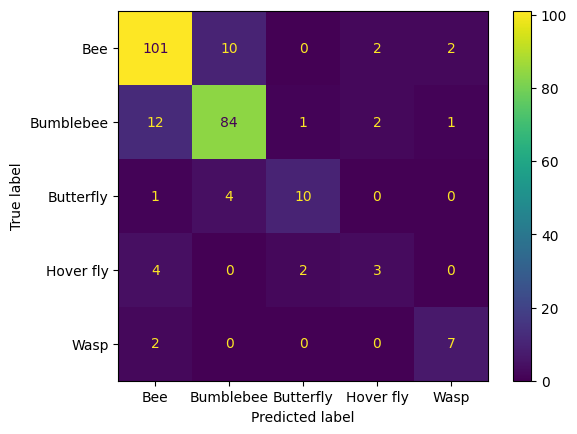

In [49]:
net_search_space = {
    'num_layers': hp.choice('num_layers', np.arange(1, 15, 1, dtype=int)),  # choose between the number of layers
    'units_per_layer': hp.choice('units_per_layer', [
        [hp.randint(f'units_layer_{i}_{j}', 20, 150) for i in range(j)]  # each layer can have between 50 to 150 units
        for j in range(1, 5)  # corresponding to the number of layers chosen
    ]),
    'epochs': hp.uniformint('epochs', 5, 25),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-1)),
    'activation': hp.choice('activation', [nn.ReLU(), nn.Tanh()]),
    'dropout': hp.loguniform('dropout', 1e-5, 0.1)
}

best_params = optimize_classifier(X, net, net_search_space, smote_sampling_strategy_space, max_evals=1000, scoring='accuracy')
evaluate_classifier(net, X, y)

Accuracy: 0.8548387096774194
Precision: 0.8537540575881198
Recall: 0.8548387096774194
F1 Score: 0.8525146419578067
              precision    recall  f1-score   support

         Bee       0.87      0.90      0.88       115
   Bumblebee       0.86      0.89      0.87       100
   Butterfly       0.82      0.60      0.69        15
   Hover fly       0.50      0.44      0.47         9
        Wasp       1.00      0.78      0.88         9

    accuracy                           0.85       248
   macro avg       0.81      0.72      0.76       248
weighted avg       0.85      0.85      0.85       248



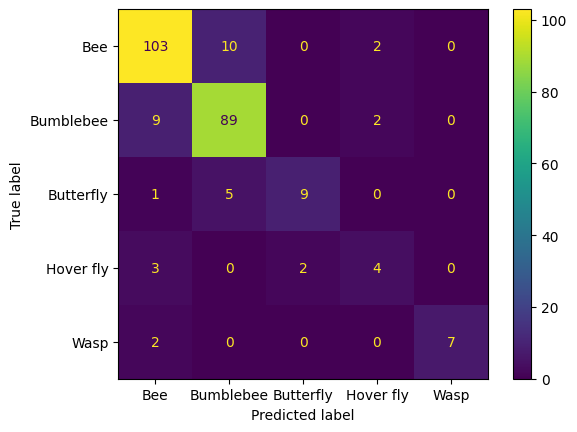

In [199]:
best_params = {'model__activation': nn.ReLU(), 'model__compression_ratio': 0.5904518404397917, 'model__dropout': 1.0098282022106495, 'model__epochs': 20, 'model__learning_rate': 0.010317788530071006, 'model__min_layer_size': 16, 'model__num_layers': 4, 'smote__k_neighbors': 4, 'smote__strategy__2': 23, 'smote__strategy__3': 14, 'smote__strategy__4': 26}
adapt_sampling_strategy(net, best_params, 'smote')
adapt_pytorch_layers_sizes(X,best_params)
net.set_params(**best_params)
evaluate_classifier(net, X, y)

Search space: {'model__num_layers': <hyperopt.pyll.base.Apply object at 0x00000213624BCC90>, 'model__compression_ratio': <hyperopt.pyll.base.Apply object at 0x00000213624BD950>, 'model__min_layer_size': <hyperopt.pyll.base.Apply object at 0x00000213624BD990>, 'model__epochs': <hyperopt.pyll.base.Apply object at 0x00000213624BDB50>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x00000213624BE050>, 'model__activation': <hyperopt.pyll.base.Apply object at 0x00000213624BF3D0>, 'model__dropout': <hyperopt.pyll.base.Apply object at 0x00000213624BFBD0>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002135F3B3350>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002135F3FAC10>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002135F3F3790>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002135F39DB90>}
100%|██████████| 1000/1000 [02:39<00:00,  6.28trial/s, best loss: -0.8709677419354839]
Best hyperparameters: {'model

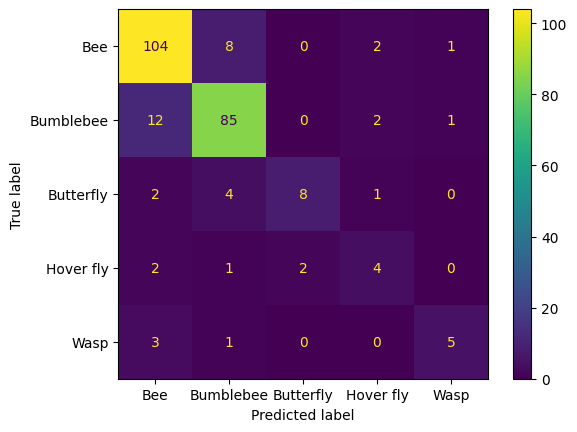

In [48]:
net_search_space2 = {
    'num_layers': hp.uniformint('num_layers', 1, 15),  # choose between the number of layers
    'compression_ratio': hp.uniform('compression_ratio', 0.5, 0.9),
    'min_layer_size': hp.uniformint('min_layer_size', 8, 30),
    'epochs': hp.uniformint('epochs', 5, 25),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-1)),
    'activation': hp.choice('activation', [nn.ReLU(), nn.Tanh()]),
    'dropout': hp.loguniform('dropout', 1e-5, 0.1)
}

best_params = optimize_classifier(X, net, net_search_space2, smote_sampling_strategy_space, max_evals=1000, scoring='accuracy')
evaluate_classifier(net, X, y)

search_space = {
    'layers_sizes': hp.choice('layers_sizes', [[100, 50], [100, 50, 25], [200, 100, 50]]),
    'epochs': hp.uniformint('epochs', 5, 20),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-1))
}

In [28]:
net_search_space = {
    'num_layers': hp.choice('num_layers', np.arange(1, 15, 1, dtype=int)),  # choose between the number of layers
    'units_per_layer': hp.choice('units_per_layer', [
        [hp.randint(f'units_layer_{i}_{j}', 20, 150) for i in range(j)]  # each layer can have between 50 to 150 units
        for j in range(1, 5)  # corresponding to the number of layers chosen
    ]),
    'epochs': hp.uniformint('epochs', 5, 25),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-1)),
    'activation': hp.choice('activation', [nn.ReLU(), nn.Tanh()]),
    'dropout': hp.loguniform('dropout', 1e-5, 0.1)
}

Search space: {'model__num_layers': <hyperopt.pyll.base.Apply object at 0x000001B2571B4650>, 'model__units_per_layer': <hyperopt.pyll.base.Apply object at 0x000001B2571B7C50>, 'model__epochs': <hyperopt.pyll.base.Apply object at 0x000001B25769AFD0>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000001B257698990>, 'model__activation': <hyperopt.pyll.base.Apply object at 0x000001B25769AF10>, 'model__dropout': <hyperopt.pyll.base.Apply object at 0x000001B257698FD0>}
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 10/10 [00:00<00:00, 10.53trial/s, best loss: -0.5040322580645161]
Best hyperparameters: {'model__activation': Tanh(), 'model__dropout': 1.0795617251667395, 'model__epochs': 24, 'model__learning_rate': 0.0007088858201190865, 'model__num_layers': 2, 'model__units_per_layer': (72, 28, 84, 107)}
Accuracy: 0.4798387096774194
Precision: 0.49374900080086936
Recall: 0.4798387096774194
F1 Score: 0.4680620305620306
              precision    recall  f1-score   support

         Bee       0.50      0.64      0.56       115
   Bumblebee       0.63      0.39      0.48       100
   Butterfly       0.16      0.40      0.23        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.00      0.00      0.00         9

    accuracy                           0.48       248
   macro avg       0.26      0.29      0.25       248
weighted avg       0.49      0.48      0.47       248



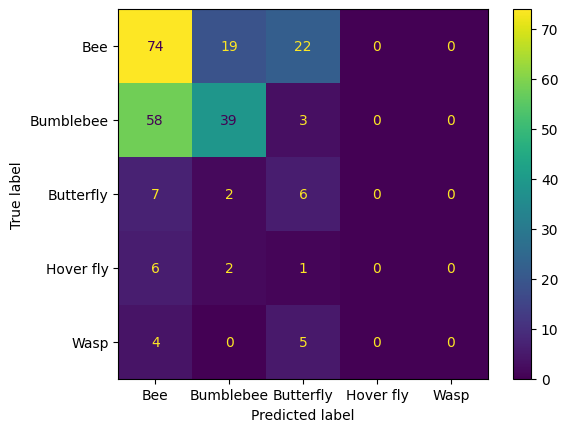

In [374]:
# Neural network on unscaled data
net = imbPipeline([
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])

# Perform the cross-validation
optimize_classifier(X, net, net_search_space, {}, max_evals=10, scoring='accuracy')
evaluate_classifier(net, X, y)

Search space: {'model__num_layers': <hyperopt.pyll.base.Apply object at 0x000001B257337110>, 'model__units_per_layer': <hyperopt.pyll.base.Apply object at 0x000001B25756DA10>, 'model__epochs': <hyperopt.pyll.base.Apply object at 0x000001B25756F490>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000001B25756ECD0>, 'model__activation': <hyperopt.pyll.base.Apply object at 0x000001B25756E8D0>, 'model__dropout': <hyperopt.pyll.base.Apply object at 0x000001B25756DD50>}
  0%|          | 0/150 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 150/150 [00:24<00:00,  6.04trial/s, best loss: -0.810483870967742] 
Best hyperparameters: {'model__activation': Tanh(), 'model__dropout': 1.036077450911582, 'model__epochs': 17, 'model__learning_rate': 0.01855098386559405, 'model__num_layers': 3, 'model__units_per_layer': (117,)}
Accuracy: 0.7782258064516129
Precision: 0.7944095473108062
Recall: 0.7782258064516129
F1 Score: 0.7826313913031072
              precision    recall  f1-score   support

         Bee       0.79      0.84      0.82       115
   Bumblebee       0.87      0.78      0.82       100
   Butterfly       0.80      0.53      0.64        15
   Hover fly       0.21      0.33      0.26         9
        Wasp       0.64      0.78      0.70         9

    accuracy                           0.78       248
   macro avg       0.66      0.65      0.65       248
weighted avg       0.79      0.78      0.78       248



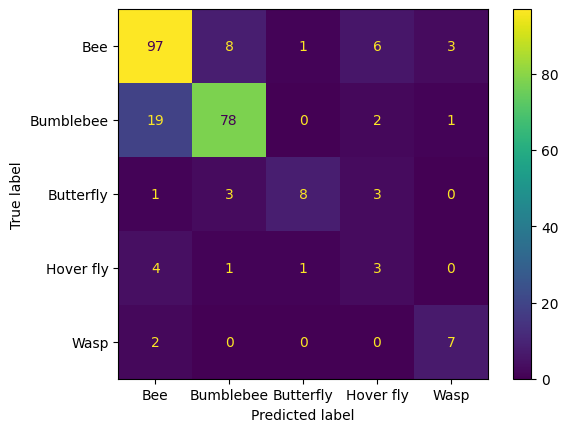

In [372]:
# Neural network on scaled data
net = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])

optimize_classifier(X, net, net_search_space, {}, max_evals=150, scoring='accuracy')
evaluate_classifier(net, X, y)

In [63]:
# Neural network on scaled data with SMOTE
net = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])
best_params = optimize_classifier(X, net, net_search_space, smote_sampling_strategy_space, max_evals=150, scoring='accuracy')
evaluate_classifier(net, X, y)

Search space: {'model__num_layers': <hyperopt.pyll.base.Apply object at 0x0000022C99CCFC50>, 'model__units_per_layer': <hyperopt.pyll.base.Apply object at 0x0000022C94A068D0>, 'model__epochs': <hyperopt.pyll.base.Apply object at 0x0000022C94A06E10>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x0000022C94A072D0>, 'model__activation': <hyperopt.pyll.base.Apply object at 0x0000022C94A07850>, 'model__dropout': <hyperopt.pyll.base.Apply object at 0x0000022C94A07CD0>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x0000022C933BC750>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x0000022C933BCD90>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x0000022C933BD410>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x0000022C933BDB50>}
  0%|          | 0/150 [00:00<?, ?trial/s, best loss=?]

job exception: 
All the 4 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 339, in _fit
    self._validate_steps()
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

  0%|          | 0/150 [00:08<?, ?trial/s, best loss=?]


ValueError: 
All the 4 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 339, in _fit
    self._validate_steps()
  File "c:\Users\milen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 230, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE(k_neighbors=3, n_jobs=-1, random_state=10,
      sampling_strategy={2: 28, 3: 25, 4: 24})' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't


Search space: {'model__max_depth': <hyperopt.pyll.base.Apply object at 0x000001B256BAD490>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x000001B256BAF350>, 'model__n_estimators': <hyperopt.pyll.base.Apply object at 0x000001B256B6AF10>, 'model__min_child_weight': <hyperopt.pyll.base.Apply object at 0x000001B24E19B950>, 'model__subsample': <hyperopt.pyll.base.Apply object at 0x000001B24E198310>, 'model__colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000001B24E1985D0>, 'adasyn__strategy__2': <hyperopt.pyll.base.Apply object at 0x000001B2579D68D0>, 'adasyn__strategy__3': <hyperopt.pyll.base.Apply object at 0x000001B2579DC7D0>, 'adasyn__strategy__4': <hyperopt.pyll.base.Apply object at 0x000001B2579DF910>, 'adasyn__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000001B2579DC250>}
100%|██████████| 150/150 [00:14<00:00, 10.23trial/s, best loss: -0.8024193548387096]
Best hyperparameters: {'adasyn__n_neighbors': 3, 'adasyn__strategy__2': 35, 'adasyn__strategy__3'

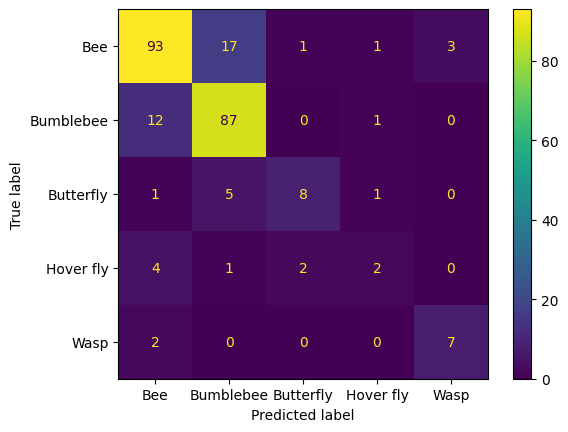

In [415]:
# Neural network on scaled data with ADASYN
net = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])
best_params = optimize_classifier(X, net, net_search_space, adasyn_sampling_strategy_space, max_evals=150, scoring='accuracy')
evaluate_classifier(net, X, y)

In [42]:
# Neural network on scaled data with ADASYN and dimensionality reduction
net = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])
#best_params = optimize_classifier(X, net, net_search_space, adasyn_sampling_strategy_space, max_evals=1, scoring='accuracy')
evaluate_classifier(net, X, y)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 6, n_neighbors = 7

Search space: {'model__num_layers': <hyperopt.pyll.base.Apply object at 0x000002720F51EC90>, 'model__units_per_layer': <hyperopt.pyll.base.Apply object at 0x000002720EF66610>, 'model__epochs': <hyperopt.pyll.base.Apply object at 0x00000272139AF810>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x0000027214536650>, 'model__activation': <hyperopt.pyll.base.Apply object at 0x0000027214536BD0>, 'model__dropout': <hyperopt.pyll.base.Apply object at 0x0000027214537050>, 'smote__strategy__2': <hyperopt.pyll.base.Apply object at 0x000002720E1A0850>, 'smote__strategy__3': <hyperopt.pyll.base.Apply object at 0x000002720E2939D0>, 'smote__strategy__4': <hyperopt.pyll.base.Apply object at 0x000002720E2A3C10>, 'smote__k_neighbors': <hyperopt.pyll.base.Apply object at 0x000002720E2A22D0>}
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:12<00:00,  8.12trial/s, best loss: -0.8508064516129032]
Best hyperparameters: {'model__activation': Tanh(), 'model__dropout': 1.0255534536424247, 'model__epochs': 24, 'model__learning_rate': 0.007598238656819468, 'model__num_layers': 11, 'model__units_per_layer': (36, 75, 40, 110), 'smote__k_neighbors': 5, 'smote__strategy__2': 30, 'smote__strategy__3': 14, 'smote__strategy__4': 19}
Accuracy: 0.8266129032258065
Precision: 0.8228206605222735
Recall: 0.8266129032258065
F1 Score: 0.8237022799583271
              precision    recall  f1-score   support

         Bee       0.84      0.87      0.85       115
   Bumblebee       0.84      0.86      0.85       100
   Butterfly       0.83      0.67      0.74        15
   Hover fly       0.43      0.33      0.38         9
        Wasp       0.75      0.67      0.71         9

    accuracy                           0.83       248
   macro avg       0.74      0.68      0.71       248
weighted avg       0.82      0.83   

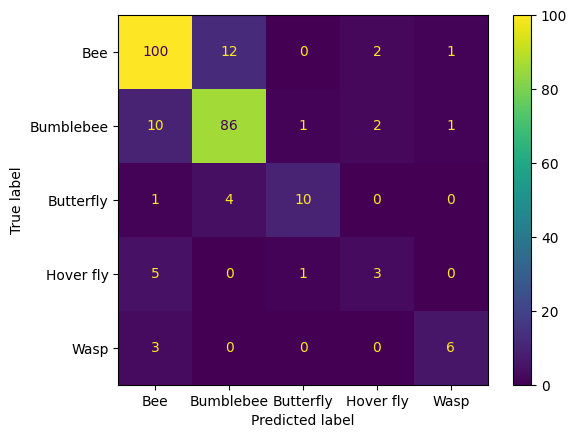

In [40]:
# Neural network on scaled data with SMOTE and dimensionality reduction
dim_reductor_net = create_dim_reductor(percent_treshold=75, n_components=0.9)
net = imbPipeline([
    ('dim_reductor', dim_reductor_net),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])
best_params = optimize_classifier(X, net, net_search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(net, X, y)

Search space: {'model__num_layers': <hyperopt.pyll.base.Apply object at 0x0000022C99CCFC50>, 'model__units_per_layer': <hyperopt.pyll.base.Apply object at 0x0000022C94A068D0>, 'model__epochs': <hyperopt.pyll.base.Apply object at 0x0000022C94A06E10>, 'model__learning_rate': <hyperopt.pyll.base.Apply object at 0x0000022C94A072D0>, 'model__activation': <hyperopt.pyll.base.Apply object at 0x0000022C94A07850>, 'model__dropout': <hyperopt.pyll.base.Apply object at 0x0000022C94A07CD0>}
100%|██████████| 1/1 [00:04<00:00,  4.81s/trial, best loss: -0.8346774193548387]
Best hyperparameters: {'model__activation': ReLU(), 'model__dropout': 1.0507805809830033, 'model__epochs': 12, 'model__learning_rate': 0.022750822173049856, 'model__num_layers': 14, 'model__units_per_layer': (125, 114)}
Accuracy: 0.8346774193548387
Precision: 0.828662916779615
Recall: 0.8346774193548387
F1 Score: 0.8304408647686451
              precision    recall  f1-score   support

         Bee       0.86      0.89      0.87   

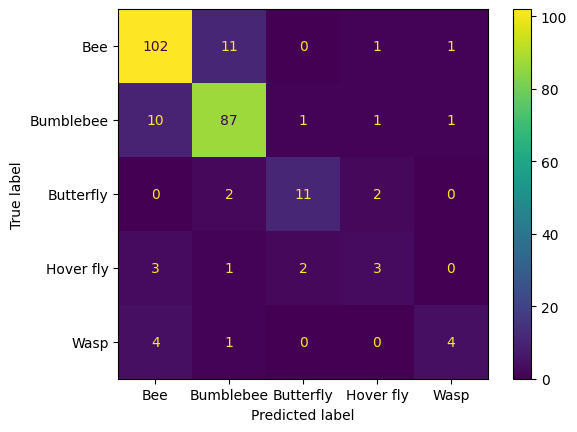

In [66]:
# Neural network on scaled data with SMOTE and dimensionality reduction
net = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])
best_params = optimize_classifier(X, net, net_search_space, smote_sampling_strategy_space, max_evals=1, scoring='accuracy')
evaluate_classifier(net, X, y)

#### Trial with skorch (unsuccessful - worse score)

import torch
import torch.nn as nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

class DynamicNet(nn.Module):
    def __init__(self, input_size, num_classes, num_units=10, num_layers=2, nonlin=nn.ReLU()):
        super(DynamicNet, self).__init__()
        self.layers = nn.ModuleList()
        last_size = input_size
        self.nonlin = nonlin

        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(last_size, num_units))
            last_size = num_units  # Output of one layer is input to the next

        # Final layer
        self.output = nn.Linear(last_size, num_classes)

    def forward(self, x):
        x = x.float()
        for layer in self.layers:
            x = self.nonlin(layer(x))
        return self.output(x)

class DynamicNet(nn.Module):
    def __init__(self, input_size, num_classes, layers_sizes, nonlin=nn.ReLU()):
        super(DynamicNet, self).__init__()
        self.layers = nn.ModuleList()
        last_size = input_size
        self.nonlin = nonlin

        for size in layers_sizes:
            self.layers.append(nn.Linear(last_size, size))
            last_size = size

        self.output = nn.Linear(last_size, num_classes)

    def forward(self, x):
        for layer in self.layers:
            x = self.nonlin(layer(x))
        return self.output(x)
    
class CustomPyTorchClassifier(NeuralNetClassifier):
    def __init__(self, module=DynamicNet, criterion=nn.CrossEntropyLoss, optimizer=torch.optim.Adam, *args, **kwargs):
        super(CustomPyTorchClassifier, self).__init__(module, *args, **kwargs)

    def set_params(self, **params):
        super().set_params(**params)
        self.initialize()  # Re-initialize the network with new parameters

# Usage example:
input_size = X.shape[1]  # Assuming X is already defined and preprocessed
num_classes = len(np.unique(y))  # Assuming y is your label array

net = CustomPyTorchClassifier(
    module=DynamicNet,
    module__input_size=input_size,
    module__num_classes=num_classes,
    module__num_units=50,
    module__num_layers=2,
    module__nonlin=nn.ReLU(),
    max_epochs=10,
    lr=0.1,
    iterator_train__shuffle=True,
    verbose=0
)

param_grid = {
    'lr': [1e-3,0.01, 0.02, 0.03],
    'module_layers_sizes': [[100, 50], [100, 50, 25], [100, 50, 25, 10]],
    'module__nonlin': [nn.ReLU(), nn.Tanh()]
}

gs = GridSearchCV(net, param_grid, refit=True, cv=cv, scoring='accuracy')
gs.fit(X_scaled.astype(np.float32), y_encoded.astype(np.int64))
print(gs.best_score_, gs.best_params_)
net = CustomPyTorchClassifier(
    module=DynamicNet,
    module__input_size=input_size,
    module__num_classes=num_classes,
    module__layers_sizes = [100, 50],
    module__nonlin=nn.ReLU(),
    max_epochs=10,
    lr=1e-1,
    iterator_train__shuffle=True,
    verbose=0,
    batch_size=5
)
scores = cross_validate_pytorch_model(net, X_scaled.astype(np.float32), y_encoded.astype(np.int64), cv=cv, scoring='accuracy')


## Supervised neural network algorithms using optimally auto-encoded features

### Create a custom autoencoder class and training function

In [23]:

class CustomAutoencoder(nn.Module):
    def __init__(self, input_size, layers_sizes):
        super(CustomAutoencoder, self).__init__()
        self.encoder = nn.ModuleList()
        self.decoder = nn.ModuleList()

        # Create the encoder layers
        last_size = input_size
        for size in layers_sizes:
            self.encoder.append(nn.Linear(last_size, size))
            last_size = size
        
        # Create the decoder layers (reverse order of encoder)
        for size in reversed(layers_sizes[:-1]):
            self.decoder.append(nn.Linear(last_size, size))
            last_size = size
        self.decoder.append(nn.Linear(last_size, input_size))

    def forward(self, x):
        # Encoder
        for layer in self.encoder:
            x = F.relu(layer(x))
        
        # Decoder
        for layer in self.decoder:
            x = F.relu(layer(x))
        
        return x
    
    def encode(self, x):
        for layer in self.encoder:
            x = F.relu(layer(x))
        return x
    
def train_autoencoder(model, train_loader, epochs, optimizer, criterion, val_loader=None):
    # Training loop
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            reconstructed = model(data)
            loss = criterion(reconstructed, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        if val_loader is not None:
            # Validation
            model.eval()
            val_loss = 0
            with torch.no_grad():
                for data, target in val_loader:
                    reconstructed = model(data)
                    loss = criterion(reconstructed, target)
                    val_loss += loss.item()
    if val_loader is not None:
        return val_loss / len(val_loader)
    else:
        return train_loss / len(train_loader)
    
def create_autoencoder(input_size, layers_sizes, learning_rate):
    model = CustomAutoencoder(input_size=input_size, layers_sizes=layers_sizes)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    return model, criterion, optimizer


### Find the best hyper parameters for our auto encoder

In [ ]:
# Find the best hyper parameters for our auto encoder
from torch.utils.data import DataLoader, TensorDataset
from hyperopt import Trials
input_size = X.shape[1]

def autoencoder_objective(params):
    # Unpack parameters
    #layers_sizes = params['layers_sizes']
    learning_rate = params['learning_rate']
    epochs = params['epochs']
    num_layers = params['num_layers']
    compression_ratio = params['compression_ratio']
    min_layer_size = params['min_layer_size']

    layers_sizes = get_layers_sizes(input_size, num_layers, compression_ratio, min_layer_size)
    
    # Convert numpy array to torch tensor
    train_loader = DataLoader(tensor_dataset, batch_size=10, shuffle=True)
    val_loader = DataLoader(tensor_dataset, batch_size=10)
    
    # Initialize model
    model, criterion, optimizer = create_autoencoder(input_size, layers_sizes, learning_rate)

    loss = train_autoencoder(model, train_loader, epochs, optimizer, criterion, val_loader=val_loader)
    return {'loss': loss, 'status': 'ok'}

search_space = {
    'num_layers': hp.uniformint('num_layers', 3, 7), 
    'compression_ratio': hp.uniform('compression_ratio', 0.5, 0.9),
    'min_layer_size': hp.choice('min_layer_size', [10,20,30,40]),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-1)),
    'epochs': hp.uniformint('epochs', 5, 100)
}

X_tensor = torch.from_numpy(scaled_X).float()
tensor_dataset = TensorDataset(X_tensor, X_tensor)  # features are the same as targets
trials = Trials()
best = fmin(
    fn=autoencoder_objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=15,
    trials=trials
)

print('Best parameters:', space_eval(search_space, best))

### Encoding the dataset

In [462]:
def apply_autoencoder(model, train_loader, epochs, optimizer, criterion):
    train_autoencoder(model, train_loader, epochs, optimizer, criterion)
    model.eval()
    encoded_features = []
    with torch.no_grad():
        for data, _ in train_loader:
            encoded = model.encode(data)
            encoded_features.extend(encoded.cpu().detach().numpy())  # Adjust here for GPU if necessary
    
    return np.array(encoded_features)

In [461]:
# Assuming best_params are filled from the output of fmin
final_layers_sizes = get_layers_sizes(input_size, int(best['num_layers']), best['compression_ratio'], best['min_layer_size'])
final_autoencoder, criterion, optimizer = create_autoencoder(input_size, final_layers_sizes, best['learning_rate'])
data_loader = DataLoader(tensor_dataset, batch_size=10, shuffle=True)

# Extract encoded features
auto_encoded_X = apply_autoencoder(final_autoencoder, data_loader, int(best['epochs']), optimizer, criterion)
print('Auto encoded features shape:', auto_encoded_X.shape)

[136, 74, 40, 21, 11]
Auto encoded features shape: (248, 11)


### Testing algorithms on auto encoded features

In [ ]:
# Logistic regression on autoencoded data
search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),  # Regularization strength
    'penalty': hp.choice('penalty', ['l2']),
    'solver': hp.choice('solver', ['lbfgs', 'liblinear'])
}
log = imbPipeline([
    ('model', LogisticRegression())
])
best_params = optimize_classifier(X, log, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(log, auto_encoded_X, y)

In [ ]:
# XGBoost on autoencoded data
xgb = imbPipeline([
    ('model', XGBClassifier())
])
search_space = {
    'max_depth': hp.choice('max_depth', [3, 4, 5, 6, 7, 8, 9, 10]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.choice('n_estimators', [50, 100, 150, 200, 250]),
    'min_child_weight': hp.choice('min_child_weight', [1, 2, 3, 4, 5]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
best_params = optimize_classifier(X, xgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(xgb, auto_encoded_X, y)

In [ ]:
# LGBM on autoencoded data
lgb = imbPipeline([
    ('model', LGBMClassifier())
])
search_space = {
    'num_leaves': hp.choice('num_leaves', [10, 20, 30, 40, 50]),
    'max_depth': hp.choice('max_depth', [5, 10, 15, -1]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'min_child_samples': hp.choice('min_child_samples', [5, 10, 20, 30]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
best_params = optimize_classifier(X, lgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, auto_encoded_X, y)

In [ ]:
# RBF SVM on autoencoded data
rbf_svc = imbPipeline([ 
    ('model', SVC())])
best_params = optimize_classifier(X, rbf_svc, rbf_params, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(rbf_svc, auto_encoded_X, y)

In [ ]:
# Neural network on autoencoded data
net = imbPipeline([
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])
search_space = {
    'num_layers': hp.choice('num_layers', np.arange(1, 20, 1, dtype=int)),  # choose between the number of layers
    'units_per_layer': hp.choice('units_per_layer', [
        [hp.randint(f'units_layer_{i}_{j}', 20, 150) for i in range(j)]  # each layer can have between 50 to 150 units
        for j in range(1, 5)  # corresponding to the number of layers chosen
    ]),
    'epochs': hp.uniformint('epochs', 5, 25),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-1)),
    'activation': hp.choice('activation', [nn.ReLU(), nn.Tanh()]),
    'dropout': hp.loguniform('dropout', 1e-5, 0.1)
}
best_params = optimize_classifier(X, net, search_space, {}, max_evals=10, scoring='accuracy')
evaluate_classifier(net, auto_encoded_X, y)

## Final hyperparameter tuning for the best models found

In [59]:
MAX_EVALS = 1000
MEDIUM_MAX_EVALS = 500
HIGH_MAX_EVALS = 2000
# Nearest Neighbors on scaled data with dimensionality reduction first (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
knn_search_space = {
    'n_neighbors': hp.uniformint('n_neighbors', 1,25),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2, 3])  # Power parameter for the Minkowski metric
}
knn = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())])

best_params_knn = optimize_classifier(X, knn, knn_search_space, {}, max_evals=400, scoring='accuracy')

# Logistic regression on unscaled data (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
log_search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),  # Regularization strength
    'penalty': hp.choice('penalty', [ 'l2']),
    'solver': hp.choice('solver', ['lbfgs', 'liblinear'])
}
log = imbPipeline([ 
    ('model', LogisticRegression())])
best_params_log = optimize_classifier(X, log, log_search_space,{}, max_evals=250, scoring='accuracy')
#{'C': 0.02544670436123156, 'penalty': 'l2', 'solver': 'liblinear'}

# Polynomial SVM on scaled data with smote and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
common_params = {
    'C': hp.loguniform('C', np.log(0.01), np.log(10)), 
}
poly_params = {
    **common_params,
    'kernel': 'poly',
    'degree': hp.choice('poly_degree', [2, 3, 4, 5]),  # Degree of the polynomial kernel function
    'gamma': hp.choice('poly_gamma', ['scale', 'auto']),
    'coef0': hp.uniform('poly_coef0', 0, 10)  # Independent term in kernel function
}

rbf_params = {
    **common_params,
    'kernel': 'rbf',
    'gamma': hp.choice('rbf_gamma', ['scale', 'auto'])
}

sigmoid_params = {
    **common_params,
    'kernel': 'sigmoid',
    'gamma': hp.choice('sigmoid_gamma', ['scale', 'auto']),
    'coef0': hp.uniform('sigmoid_coef0', 0, 10)  # Independent term in kernel function
}
poly_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC(max_iter=10000))])


poly_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC(max_iter=10000))])
best_params_poly_svc = optimize_classifier(X, poly_svc, poly_params, {}, max_evals=MAX_EVALS, scoring='accuracy')

# RBF SVM on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
rbf_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC())])
best_params_rbf_svc = optimize_classifier(X, rbf_svc, rbf_params, smote_sampling_strategy_space, max_evals=250, scoring='accuracy')


# Sigmoid SVM on scaled data without SMOTE and with dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
sigmoid_svc = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', SVC())])
best_params_sigmoid_svc = optimize_classifier(X, sigmoid_svc, sigmoid_params, {}, max_evals=MAX_EVALS, scoring='accuracy')


# LDA on scaled data and with dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
lda_search_space = {
    'solver': hp.choice('solver', [ 'lsqr']),
    'shrinkage': hp.choice('shrinkage', ['auto', None] + list(np.linspace(0, 1, 100))),
}
lda = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', LinearDiscriminantAnalysis())
])
best_params_lda = optimize_classifier(X, lda, lda_search_space, {}, max_evals=MEDIUM_MAX_EVALS, scoring='accuracy')


# Extra Trees on scaled data with ADASYN and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
et = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
et.set_params(**{'model__max_depth': 30, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 0.10291991900958453, 'model__n_estimators': 100})
best_params_et = optimize_classifier(X, et, {}, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')


# LGBM on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
lgb_search_space = {
    'num_leaves': hp.choice('num_leaves', [10, 20, 30, 40, 50]),
    'max_depth': hp.choice('max_depth', [5, 10, 15, 20, 30, 40]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'min_child_samples': hp.choice('min_child_samples', [5, 10, 20, 30]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
lgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LGBMClassifier())
])
best_params_lgb = optimize_classifier(X, lgb, lgb_search_space, smote_sampling_strategy_space, max_evals=HIGH_MAX_EVALS, scoring='accuracy')


# XGBoost on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
xgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', XGBClassifier())
])
xgb_search_space = {
    'max_depth': hp.uniformint('max_depth', 1, 40),  # Maximum tree depth
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.uniformint('n_estimators', 10, 400),  # Number of trees
    'min_child_weight': hp.choice('min_child_weight', [1, 2, 3, 4, 5]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
best_params_xgb = optimize_classifier(X, xgb, xgb_search_space, smote_sampling_strategy_space, max_evals=HIGH_MAX_EVALS, scoring='accuracy')

Search space: {'model__n_neighbors': <hyperopt.pyll.base.Apply object at 0x000001B712F8B350>, 'model__weights': <hyperopt.pyll.base.Apply object at 0x000001B714936B50>, 'model__p': <hyperopt.pyll.base.Apply object at 0x000001B714937150>}
100%|██████████| 400/400 [00:21<00:00, 18.58trial/s, best loss: -0.8548387096774194]
Best hyperparameters: {'model__n_neighbors': 4, 'model__p': 1, 'model__weights': 'distance'}
Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x000001B714928C50>, 'model__penalty': <hyperopt.pyll.base.Apply object at 0x000001B71492ACD0>, 'model__solver': <hyperopt.pyll.base.Apply object at 0x000001B71492A7D0>}
100%|██████████| 250/250 [00:27<00:00,  9.22trial/s, best loss: -0.8709677419354839]
Best hyperparameters: {'model__C': 0.8614049760945407, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Search space: {'model__C': <hyperopt.pyll.base.Apply object at 0x000001B7147B7B90>, 'model__kernel': 'poly', 'model__degree': <hyperopt.pyll.base.Apply objec

Accuracy: 0.8830645161290323
Precision: 0.8831818907697222
Recall: 0.8830645161290323
F1 Score: 0.8776613854836652
              precision    recall  f1-score   support

         Bee       0.86      0.93      0.89       115
   Bumblebee       0.91      0.92      0.92       100
   Butterfly       0.92      0.73      0.81        15
   Hover fly       0.75      0.33      0.46         9
        Wasp       1.00      0.67      0.80         9

    accuracy                           0.88       248
   macro avg       0.89      0.72      0.78       248
weighted avg       0.88      0.88      0.88       248



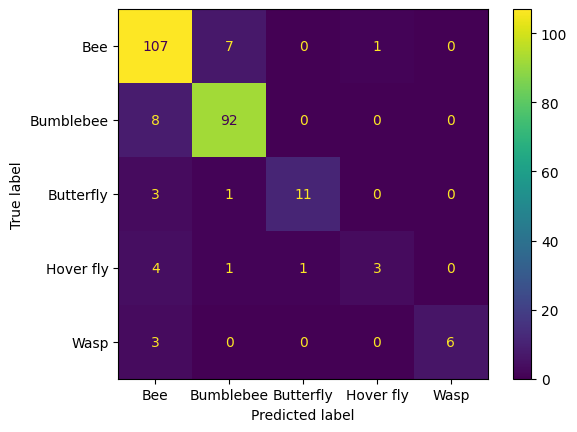

Accuracy: 0.8709677419354839
Precision: 0.8790199043327008
Recall: 0.8709677419354839
F1 Score: 0.8579517168306693
              precision    recall  f1-score   support

         Bee       0.84      0.94      0.89       115
   Bumblebee       0.89      0.91      0.90       100
   Butterfly       0.92      0.73      0.81        15
   Hover fly       1.00      0.11      0.20         9
        Wasp       1.00      0.56      0.71         9

    accuracy                           0.87       248
   macro avg       0.93      0.65      0.70       248
weighted avg       0.88      0.87      0.86       248



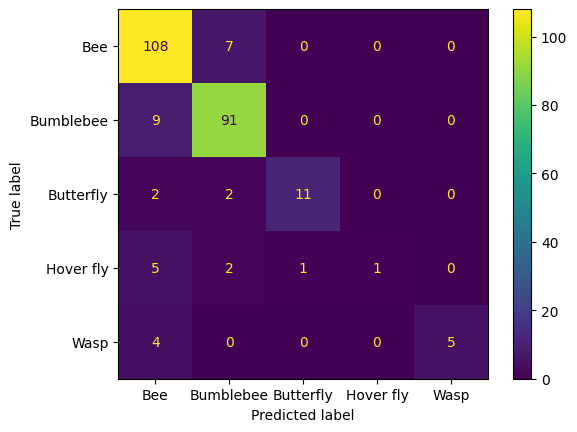

In [46]:
xgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', XGBClassifier())
])
params = {'model__colsample_bytree': 0.5618472160586284, 'model__learning_rate': 0.14696877676067954, 'model__max_depth': 31, 'model__min_child_weight': 1, 'model__n_estimators': 168, 'model__subsample': 0.7370250265837791, 'smote__k_neighbors': 5, 'smote__strategy__2': 39, 'smote__strategy__3': 26, 'smote__strategy__4': 23}
params = adapt_sampling_strategy(xgb, params, 'smote')
xgb.set_params(model__random_state=RANDOM_STATE, **params)

lgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LGBMClassifier())
])
params = {'model__colsample_bytree': 0.5336697486387387, 'model__learning_rate': 0.044019954596397556, 'model__max_depth': 30, 'model__min_child_samples': 5, 'model__num_leaves': 50, 'model__subsample': 0.7415082602672014, 'smote__k_neighbors': 3, 'smote__strategy__2': 29, 'smote__strategy__3': 22, 'smote__strategy__4': 25}
params = adapt_sampling_strategy(lgb, params, 'smote')
lgb.set_params(model__random_state=RANDOM_STATE, **params)

evaluate_classifier(xgb, X, y)
evaluate_classifier(lgb, X, y)


In [125]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=2)

## Saving the algorithms

In [23]:
SAVE_DIR = 'models/'

In [105]:
#xgb.save_model(SAVE_DIR + 'xgb.bin')
#lgb.save_model(SAVE_DIR + 'lgb.txt')
#cb.save_model(SAVE_DIR + 'cat.cbm')
sklearn_models = {
    'log': log,
    'knn': knn,
    'poly_svc': poly_svc,
    'rbf_svc': rbf_svc,
    'sigmoid_svc': sigmoid_svc,
    'lda': lda,
    'et': et,
    'lgb': lgb,
    'xgb': xgb,
    #'net': net
}
for name, model in sklearn_models.items():
    joblib.dump(model, SAVE_DIR + f'{name}.joblib')

NameError: name 'log' is not defined

In [47]:
sklearn_models = {'lgb': lgb}
for name, model in sklearn_models.items():
    joblib.dump(model, SAVE_DIR + name + '.pkl')

## Loading the algorithms

In [24]:
SAVE_DIR = 'models/'

In [25]:
def load_models_from_directory():
    """
    Automatically loads models based on file extensions from the specified directory.
    
    Args:
    - save_dir (str): Directory containing the model files.

    Returns:
    - dict: A dictionary with model names as keys and loaded model objects as values.
    """
    models = {}
    for filename in os.listdir(SAVE_DIR):
        filepath = os.path.join(SAVE_DIR, filename)
        model_name, extension = os.path.splitext(filename)
        try:
            if extension == '.joblib':
                model = joblib.load(filepath)
            elif extension == '.bin':
                model = xgb.Booster()  # initialize an empty model
                model.load_model(filepath)
            elif extension == '.txt':  # assuming this is for LightGBM
                model = lgb.Booster(model_file=filepath)
            elif extension == '.cbm':
                model = cb.CatBoost()
                model.load_model(filepath)
            else:
                continue
            models[model_name] = model
            print(f"Loaded {model_name} from {filename}")
        except Exception as e:
            print(f"Failed to load {model_name} from {filename}: {e}")
        if model_name == 'lgb':
            #models['lgb'].named_steps['model'].set_params(**{ 'min_gain_to_split': 1e-3})
            #models['lgb'].named_steps['model'].set_params(**{'verbose': -1})
            print('Set LGBM parameters: ', models['lgb'].named_steps['model'].get_params())

    #for model in models.values(): model.set_params(**{'model__random_state': RANDOM_STATE})
    return models

models = load_models_from_directory()
models_list = list(models.values())
models_tuples = [(name, model) for name, model in models.items()]

Loaded et from et.joblib
Loaded knn from knn.joblib
Loaded lda from lda.joblib
Loaded lgb from lgb.joblib
Set LGBM parameters:  {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.5336697486387387, 'importance_type': 'split', 'learning_rate': 0.044019954596397556, 'max_depth': 30, 'min_child_samples': 5, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 50, 'objective': None, 'random_state': 10, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 0.7415082602672014, 'subsample_for_bin': 200000, 'subsample_freq': 0}
Loaded log from log.joblib
Loaded poly_svc from poly_svc.joblib
Loaded rbf_svc from rbf_svc.joblib
Loaded sigmoid_svc from sigmoid_svc.joblib
Loaded xgb from xgb.joblib


## Meta algorithms

### VotingClassifier

In [29]:
def calculate_weights(scores, method='exponential', base=2):
    """
    Calculate weights based on normalized scores and a chosen method.
    """
    if method == 'exponential':
        weights = [base ** score if score != -1 else 0 for score in scores]
    elif method == 'power':
        weights = [score ** base if score != -1 else 0 for score in scores]
    elif method == 'linear':
        weights = [(score * (base - 1) + 1) if score != -1 else 0 for score in scores]
    else:
        raise ValueError("Unsupported method. Choose from 'exponential', 'power', 'linear'.")
    return weights

def set_dynamic_weights(pipelines_dict, X, y, scoring='accuracy', method='exponential', base=2, print_results=True, min_acceptable_score=None,
                        n_jobs=-1):
    """
    Assign weights to models based on their cross-validation scores using different methods.
    """
    pipelines = list(pipelines_dict.values())
    pipeline_names = list(pipelines_dict.keys())
    scores = [np.mean(cross_val_score(pipeline, X, y_encoded, cv=cv, scoring=scoring, n_jobs=n_jobs)) for pipeline in pipelines]
    scores_above_threshold = [score for score in scores if score >= min_acceptable_score] if min_acceptable_score is not None else scores
    min_score = min(scores_above_threshold)
    max_score = max(scores)
    # Normalize scores to the [0, 1] interval
    min_acceptable_score = min_score if min_acceptable_score is None else min_acceptable_score
    normalized_scores = [(score - min_score) / (max_score - min_score) if score >= min_acceptable_score else -1 for score in scores]

    # Calculate weights based on the chosen method
    weights = calculate_weights(normalized_scores, method, base)
    if print_results:
        for i, pipeline in enumerate(pipelines):
            print(f'{pipeline_names[i]} {pipeline.steps[-1][0]}: {scores[i]:.4f} (weight: {weights[i]:.4f})')
            if weights[i] == 0:
                print(f"Model {pipeline_names[i]} was assigned a weight of 0 due to low score.")
    return weights


Accuracy: 0.8911290322580645
Precision: 0.8989324327745986
Recall: 0.8911290322580645
F1 Score: 0.8826191473656912
              precision    recall  f1-score   support

         Bee       0.85      0.96      0.90       115
   Bumblebee       0.94      0.92      0.93       100
   Butterfly       0.92      0.73      0.81        15
   Hover fly       1.00      0.22      0.36         9
        Wasp       1.00      0.67      0.80         9

    accuracy                           0.89       248
   macro avg       0.94      0.70      0.76       248
weighted avg       0.90      0.89      0.88       248



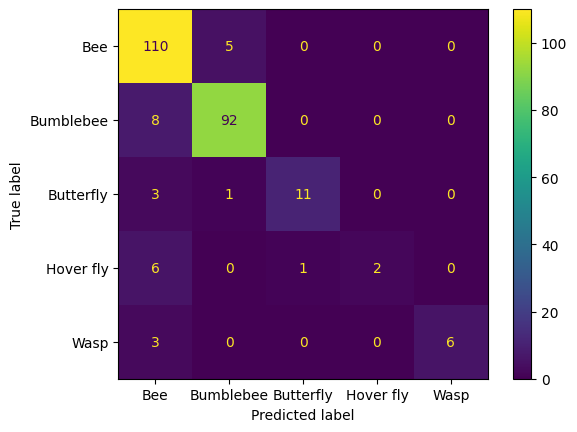

In [130]:
# Without dynamic weights
voting_clf = VotingClassifier(
    estimators=models_tuples,
    voting='hard',  # 'hard' for majority voting
)
voting_pipe = imbPipeline([
    ('model', voting_clf)
])
evaluate_classifier(voting_pipe, X, y)

et model: 0.8548 (weight: 2.2864)
knn model: 0.8548 (weight: 2.2864)
lda model: 0.8548 (weight: 2.2864)
lgb model: 0.8710 (weight: 3.9681)
log model: 0.8710 (weight: 3.9681)
poly_svc model: 0.8669 (weight: 3.4572)
rbf_svc model: 0.8790 (weight: 5.2275)
sigmoid_svc model: 0.8306 (weight: 1.0000)
xgb model: 0.8831 (weight: 6.0000)
Accuracy: 0.8991935483870968
Precision: 0.9046624968249937
Recall: 0.8991935483870968
F1 Score: 0.893014825676116
              precision    recall  f1-score   support

         Bee       0.87      0.96      0.91       115
   Bumblebee       0.93      0.93      0.93       100
   Butterfly       0.92      0.73      0.81        15
   Hover fly       1.00      0.33      0.50         9
        Wasp       1.00      0.67      0.80         9

    accuracy                           0.90       248
   macro avg       0.94      0.72      0.79       248
weighted avg       0.90      0.90      0.89       248



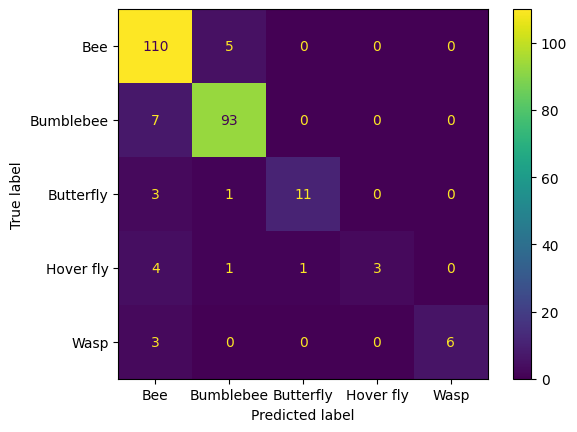

In [56]:
# With dynamic weights
weights = set_dynamic_weights(models, X, y_encoded, method='exponential', base=6, min_acceptable_score=0.8)
voting_clf = VotingClassifier(
    estimators=models_tuples,
    voting='hard',  # 'hard' for majority voting
    weights=weights
)
voting_pipe = imbPipeline([
    ('model', voting_clf)
])
evaluate_classifier(voting_pipe, X, y)

Accuracy: 0.8830645161290323
Precision: 0.8893792384530791
Recall: 0.8830645161290323
F1 Score: 0.8766418782995843
              precision    recall  f1-score   support

         Bee       0.85      0.95      0.90       115
   Bumblebee       0.91      0.91      0.91       100
   Butterfly       0.91      0.67      0.77        15
   Hover fly       1.00      0.33      0.50         9
        Wasp       1.00      0.67      0.80         9

    accuracy                           0.88       248
   macro avg       0.93      0.70      0.78       248
weighted avg       0.89      0.88      0.88       248



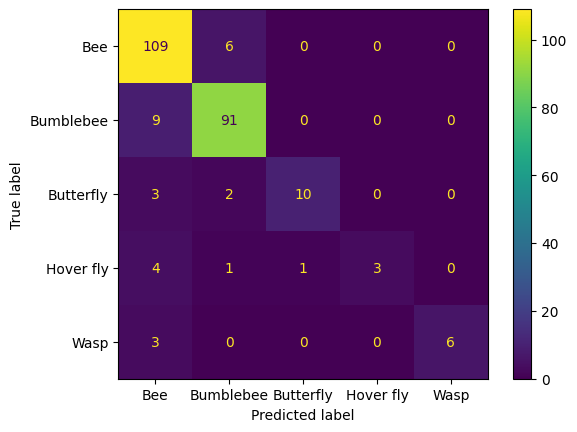

In [55]:
from sklearn.base import clone

# Function to ensure all classifiers can predict probabilities
def prepare_estimators_with_probabilities(models_dict):
    models_tuples = []
    for name, pipeline in models_dict.items():
        # Clone the entire pipeline first
        new_pipeline = clone(pipeline)
        model = new_pipeline.named_steps['model']
        
        # Check if the model is of a class that typically requires enabling probabilities
        if hasattr(model, 'probability') and not model.probability:
            # Set probability parameter to True
            model.set_params(probability=True)
        elif not hasattr(model, 'predict_proba'):
            raise ValueError(f"The model {name} does not support probability predictions and cannot be adjusted to do so.")
        
        # After updating the model in the cloned pipeline, append to list
        models_tuples.append((name, new_pipeline))
    
    return models_tuples

models_tuples = prepare_estimators_with_probabilities(models)
models_tuples_proba = prepare_estimators_with_probabilities(models)
models_tuples_proba = [(name, pipeline) for name, pipeline in models_tuples_proba]
voting_clf = VotingClassifier(
    estimators=models_tuples_proba,
    voting='soft',  # Change to 'soft' for using probabilities
    weights=weights
)

voting_pipe = imbPipeline([
    ('model', voting_clf)
])

evaluate_classifier(voting_pipe, X, y)


Testing random state  10
Accuracy: 0.875
Precision: 0.8823091395290273
Recall: 0.875
F1 Score: 0.8620112761843624
              precision    recall  f1-score   support

         Bee       0.84      0.94      0.89       115
   Bumblebee       0.91      0.92      0.92       100
   Butterfly       0.85      0.73      0.79        15
   Hover fly       1.00      0.11      0.20         9
        Wasp       1.00      0.56      0.71         9

    accuracy                           0.88       248
   macro avg       0.92      0.65      0.70       248
weighted avg       0.88      0.88      0.86       248



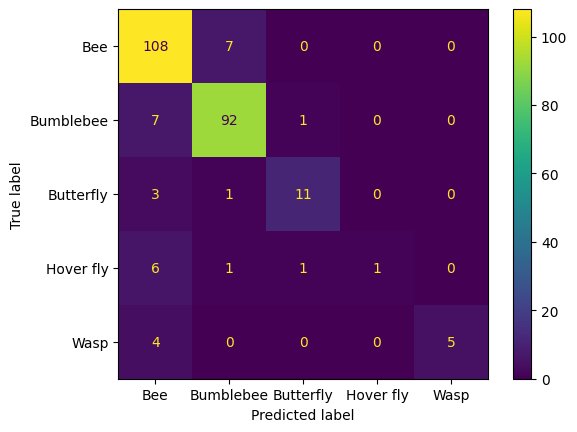

Testing random state  11
Accuracy: 0.8870967741935484
Precision: 0.8922384399341301
Recall: 0.8870967741935484
F1 Score: 0.8811231825920973
              precision    recall  f1-score   support

         Bee       0.86      0.93      0.90       115
   Bumblebee       0.90      0.93      0.92       100
   Butterfly       0.92      0.73      0.81        15
   Hover fly       1.00      0.33      0.50         9
        Wasp       1.00      0.67      0.80         9

    accuracy                           0.89       248
   macro avg       0.94      0.72      0.79       248
weighted avg       0.89      0.89      0.88       248



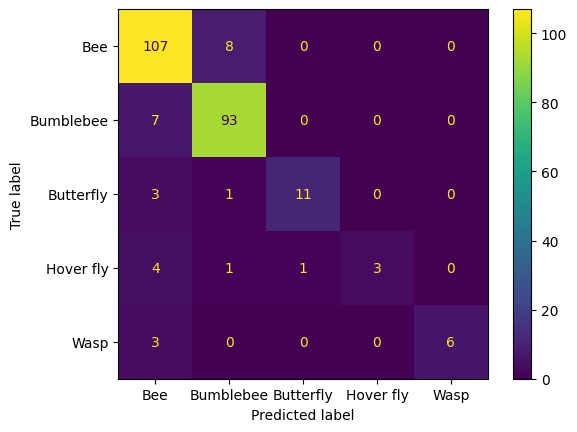

Testing random state  12
Accuracy: 0.8870967741935484
Precision: 0.8923011060335452
Recall: 0.8870967741935484
F1 Score: 0.8749977025935338
              precision    recall  f1-score   support

         Bee       0.87      0.92      0.89       115
   Bumblebee       0.90      0.95      0.92       100
   Butterfly       0.92      0.73      0.81        15
   Hover fly       1.00      0.11      0.20         9
        Wasp       1.00      0.78      0.88         9

    accuracy                           0.89       248
   macro avg       0.94      0.70      0.74       248
weighted avg       0.89      0.89      0.87       248



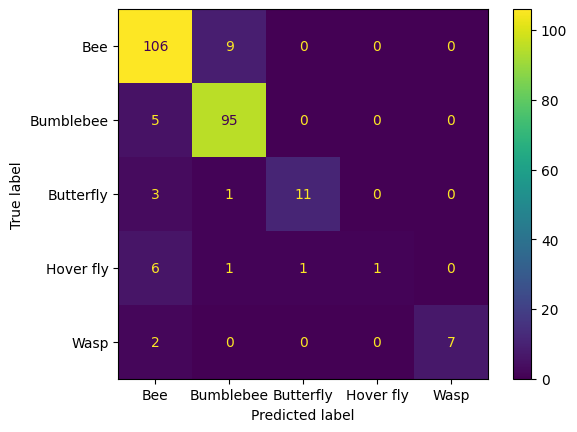

Testing random state  13
Accuracy: 0.8951612903225806
Precision: 0.9004569955843512
Recall: 0.8951612903225806
F1 Score: 0.8868232225538124
              precision    recall  f1-score   support

         Bee       0.87      0.95      0.90       115
   Bumblebee       0.92      0.93      0.93       100
   Butterfly       0.92      0.73      0.81        15
   Hover fly       1.00      0.22      0.36         9
        Wasp       1.00      0.78      0.88         9

    accuracy                           0.90       248
   macro avg       0.94      0.72      0.78       248
weighted avg       0.90      0.90      0.89       248



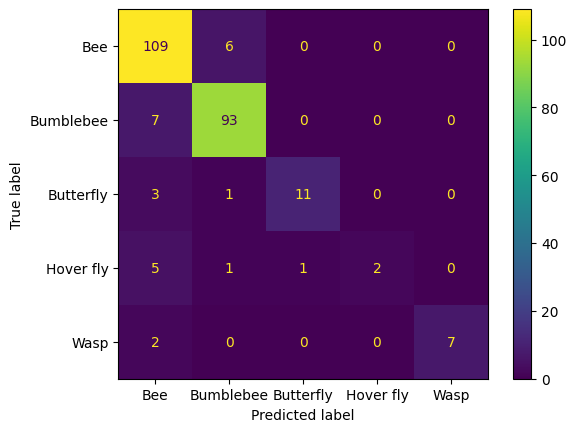

Testing random state  14
Accuracy: 0.8830645161290323
Precision: 0.8886270184706456
Recall: 0.8830645161290323
F1 Score: 0.8743517796695008
              precision    recall  f1-score   support

         Bee       0.86      0.92      0.89       115
   Bumblebee       0.90      0.94      0.92       100
   Butterfly       0.92      0.73      0.81        15
   Hover fly       1.00      0.22      0.36         9
        Wasp       1.00      0.67      0.80         9

    accuracy                           0.88       248
   macro avg       0.93      0.70      0.76       248
weighted avg       0.89      0.88      0.87       248



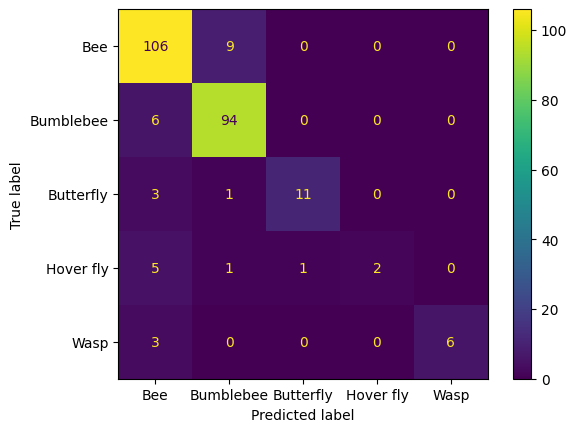

Testing random state  15
Accuracy: 0.875
Precision: 0.8815140409056788
Recall: 0.875
F1 Score: 0.8659990543244873
              precision    recall  f1-score   support

         Bee       0.85      0.93      0.89       115
   Bumblebee       0.89      0.92      0.91       100
   Butterfly       0.91      0.67      0.77        15
   Hover fly       1.00      0.22      0.36         9
        Wasp       1.00      0.67      0.80         9

    accuracy                           0.88       248
   macro avg       0.93      0.68      0.75       248
weighted avg       0.88      0.88      0.87       248



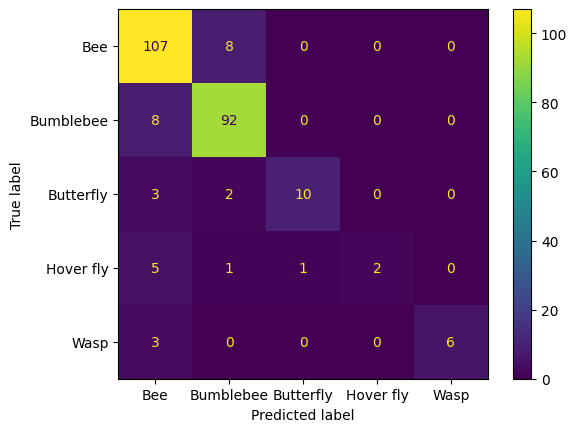

Testing random state  16
Accuracy: 0.9032258064516129
Precision: 0.9010021347248577
Recall: 0.9032258064516129
F1 Score: 0.8984740215316871
              precision    recall  f1-score   support

         Bee       0.89      0.93      0.91       115
   Bumblebee       0.92      0.94      0.93       100
   Butterfly       0.87      0.87      0.87        15
   Hover fly       0.75      0.33      0.46         9
        Wasp       1.00      0.78      0.88         9

    accuracy                           0.90       248
   macro avg       0.89      0.77      0.81       248
weighted avg       0.90      0.90      0.90       248



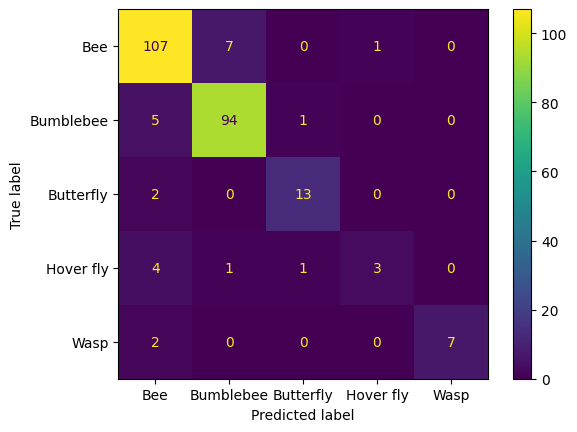

Testing random state  17
Accuracy: 0.8870967741935484
Precision: 0.8938549908703591
Recall: 0.8870967741935484
F1 Score: 0.8737856168955449
              precision    recall  f1-score   support

         Bee       0.86      0.94      0.90       115
   Bumblebee       0.91      0.96      0.93       100
   Butterfly       0.92      0.73      0.81        15
   Hover fly       1.00      0.22      0.36         9
        Wasp       1.00      0.33      0.50         9

    accuracy                           0.89       248
   macro avg       0.94      0.64      0.70       248
weighted avg       0.89      0.89      0.87       248



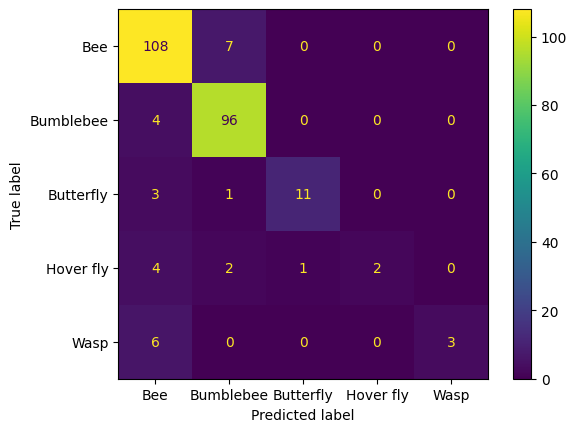

Testing random state  18
Accuracy: 0.8911290322580645
Precision: 0.8954915828323644
Recall: 0.8911290322580645
F1 Score: 0.8855895134286565
              precision    recall  f1-score   support

         Bee       0.87      0.93      0.90       115
   Bumblebee       0.90      0.93      0.92       100
   Butterfly       0.92      0.73      0.81        15
   Hover fly       1.00      0.33      0.50         9
        Wasp       1.00      0.78      0.88         9

    accuracy                           0.89       248
   macro avg       0.94      0.74      0.80       248
weighted avg       0.90      0.89      0.89       248



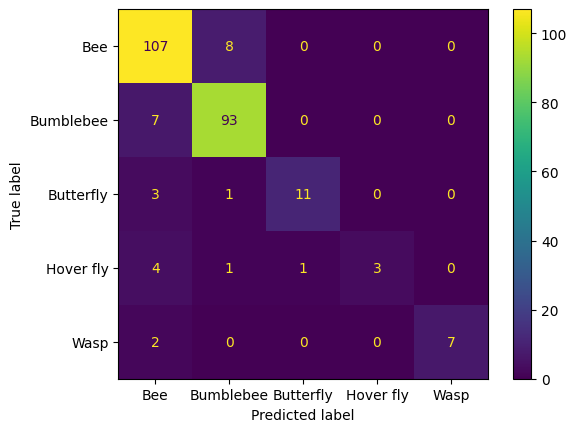

Testing random state  19
Accuracy: 0.8870967741935484
Precision: 0.8918754026064121
Recall: 0.8870967741935484
F1 Score: 0.877371365883885
              precision    recall  f1-score   support

         Bee       0.87      0.94      0.90       115
   Bumblebee       0.90      0.94      0.92       100
   Butterfly       0.90      0.60      0.72        15
   Hover fly       1.00      0.22      0.36         9
        Wasp       1.00      0.78      0.88         9

    accuracy                           0.89       248
   macro avg       0.93      0.70      0.76       248
weighted avg       0.89      0.89      0.88       248



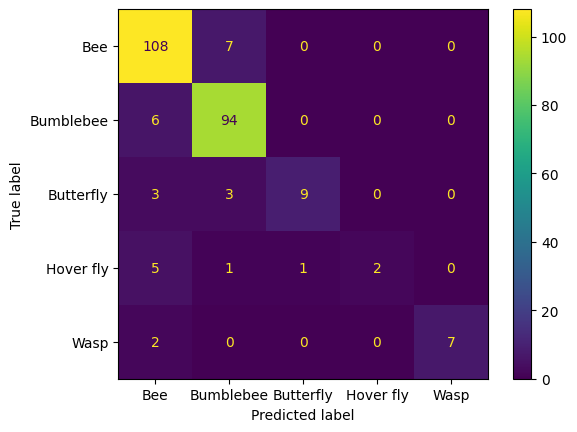

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [59]:
scores = []
for i in range(10,20):
    print('Testing random state ', i)
    cv2 = StratifiedKFold(n_splits=4, random_state=i, shuffle=True)
    check_splits(X, y, cv2)
    accuracy = evaluate_classifier(voting_pipe, X, y, cv=cv2)
    scores.append(accuracy)
print(f"Mean accuracy: {np.mean(scores):.4f}")

### StackingClassifier

In [131]:
cv.verbose = -1
models['et'].named_steps['adasyn'].get_params()

{'n_jobs': -1,
 'n_neighbors': 4,
 'random_state': 10,
 'sampling_strategy': {2: 21, 3: 19, 4: 24}}

In [132]:
for model in models_list:
    print(model)

Pipeline(steps=[('dim_reductor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca', PCA(n_components=0.8),
                                                  [1, 10, 11, 12, 13, 14, 18,
                                                   20, 22, 26, 27, 28, 29, 31,
                                                   32, 33, 34, 35, 36, 37, 38,
                                                   41, 42, 43, 44, 45, 46, 47,
                                                   48, 52, ...])])),
                ('scaler', StandardScaler()),
                ('adasyn',
                 ADASYN(n_jobs=-1, n_neighbors=4, random_state=10,
                        sampling_strategy={2: 21, 3: 19, 4: 24})),
                ('model',
                 ExtraTreesClassifier(max_depth=30, max_features=None,
                                      min_samples_leaf=2,
                                      min_samples_split=0.10291991900958453,
    

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3717
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 48
[LightGBM] [Info] Start training from score -1.013713
[LightGBM] [Info] Start training from score -1.150572
[LightGBM] [Info] Start training from score -2.100764
[LightGBM] [Info] Start training from score -2.377018
[LightGBM] [Info] Start training from score -2.249184
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

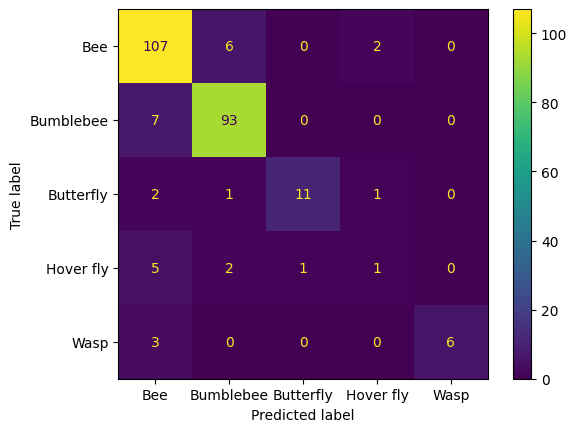

In [142]:
# Meta-model (can be any other classifier)
models2 = models.copy()
models2['et'].named_steps['adasyn'].n_neighbors = models2['et'].named_steps['adasyn'].n_neighbors - 1
models2['et'].named_steps['adasyn'].n_neighbors
meta_model = LGBMClassifier()
meta_model_search_space = {
    'final_estimator__num_leaves': hp.choice('final_estimator__num_leaves', [10, 20, 30, 40, 50]),
    'final_estimator__max_depth': hp.choice('final_estimator__max_depth', [5, 10, 15, 20, 30, 40]),
    'final_estimator__learning_rate': hp.loguniform('final_estimator__learning_rate', np.log(0.01), np.log(0.2)),
    'final_estimator__min_child_samples': hp.choice('final_estimator__min_child_samples', [5, 10, 20, 30]),
    'final_estimator__subsample': hp.uniform('final_estimator__subsample', 0.5, 1),
    'final_estimator__colsample_bytree': hp.uniform('final_estimator__colsample_bytree', 0.5, 1),
}

# This ensures that the search space now correctly targets parameters of the final_estimator

# Create the stacking classifier
stack_clf = StackingClassifier(
    estimators=[(name, model) for name, model in models2.items()],
    final_estimator=meta_model,
    n_jobs=1
)
stack_pipe = imbPipeline([
    ('model', stack_clf)
])
#best_params_stack = optimize_classifier(X, stack_pipe, meta_model_search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(stack_pipe, X, y, n_jobs=1)


# Identify dragonfly

In [110]:
def evaluate_anomaly_detection(model, X, y_true):
    """
    Fit and evaluate an anomaly detection model.
    y_true should contain 1 for normal and -1 for anomalies (the dragonfly).
    """
    model.fit(X)
    y_pred = model.predict(X)  # Predictions: 1 for normal, -1 for anomaly
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
y_anomaly = np.ones(len(X), dtype=int)  # All other points are normal
y_anomaly[dragonfly_data.index] = -1   # Mark the dragonfly data as an anomaly


# Final Predictions

In [ ]:
anomalies = iso_forest.predict(X)
final_predictions = meta_model.predict(X)
final_predictions[anomalies == -1] = 'Dragonfly'
evaluate_predictions(meta_model, y, final_predictions)